In [1]:
#Generate plotting csv for LDPC
import pandas as pd
import os
'''
def extract_row_as_new_row_from_csv_files(csv_files, row_number):
    # Initialize empty DataFrames to store column names and values
    column_names_values_df = pd.DataFrame(columns=['Column Name', 'Value'])
    # Loop through each CSV file
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
        # Extract the specified row
        selected_row = df.iloc[row_number]
        
        # Split the row into column names and values
        columns = selected_row.index
        values = selected_row.values
        
        # Append column names and values to the DataFrame
        for column, value in zip(columns, values):
            column_names_values_df = column_names_values_df.append({'Column Name': column, 'Value': value}, ignore_index=True)
    return column_names_values_df
'''
def extract_row_as_new_row_from_csv_files(csv_files, row_number):
    # Initialize empty lists to store column names and values
    column_names = []
    values = []
    # Loop through each CSV file
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
        # Extract the specified row
        selected_row = df.iloc[row_number]
        
        # Split the row into column names and values
        columns = selected_row.index
        row_values = selected_row.values
        
        # Extend lists with column names and values
        column_names.extend(columns)
        values.extend(row_values)
        
    # Create DataFrame from lists
    column_names_values_df = pd.DataFrame({'Column Name': column_names, 'Value': values})
    
    return column_names_values_df
def calculate_metrics(df, metrics):
    # Initialize a list to store the metric information
    metric_info = []
    # Iterate over each metric
    for metric_name, metric_columns in metrics:
        # Extract column names for the current metric
        column1, column2 = metric_columns

        # Get the values corresponding to the two columns for each row
        values1 = df.loc[df['Column Name'] == column1, 'Value'].tolist()
        values2 = df.loc[df['Column Name'] == column2, 'Value'].tolist()
        graph_xlabel = f"{metric_name}={column1}/{column2}"

        # Calculate the metric for each pair of values
        for value1, value2 in zip(values1, values2):
            # Calculate the metric
            if value2 != 0:  # To avoid division by zero
                metric_value = value1 / value2
            else:
                metric_value = float('nan')  # Handling division by zero
            
            # Append metric information to the list
            metric_info.append({
                'Metrics': metric_name,
                'Name_1': column1,
                'Event_1': value1,
                'Name_2': column2,
                'Event_2': value2,
                'Event_1/Event_2': metric_value,
                'Graph_Xlabel': graph_xlabel
            })
    
    # Convert the list of metric information into a DataFrame
    metric_df = pd.DataFrame(metric_info)
    return metric_df

# Example usage:
row_number = 5  # Specify the row number to extract (For LDPC , 6th combination - 1,7,462)

# Get list of CSV files in the directory
n1_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/bundle14.csv'],
            ]

g2_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/bundle14.csv'],
            ]

g3_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/bundle14.csv'],
            ]

#MPKI, TLB Miss, Miss(Exclude TLB), Stalls, IPC, Rate_Per_Instruction
kpi_metrics = [[
    ('L1_I-cache_MPKI', ['L1I_CACHE_REFILL', 'INST_RETIRED']),#11
    ('I-side_page_table_MPKI', ['ITLB_WALK', 'INST_RETIRED']),#11
    ('L2_cache_MPKI', ['L2D_CACHE_REFILL', 'INST_RETIRED']),#12
    ('Branch_MPKI', ['BR_MIS_PRED_RETIRED', 'INST_RETIRED']),#12
    ('D-side_page_table_MPKI', ['DTLB_WALK', 'INST_RETIRED']),#12
    ('L1_D-cache_MPKI', ['L1D_CACHE_REFILL', 'INST_RETIRED']),#11
    ('LLC_cache_MPKI', ['LL_CACHE_MISS_RD', 'INST_RETIRED'])],#11
    [
    ('L1_data_TLB_read_miss_rate', ['L1D_TLB_REFILL_RD', 'L1D_TLB_RD']),#10
    ('L2_TLB_miss_rate', ['L2D_TLB_REFILL', 'L2D_TLB']),#0
    ('L2_TLB_write_miss_rate', ['L2D_TLB_REFILL_WR', 'L2D_TLB_WR']),#1
    ('L2_TLB_read_miss_rate', ['L2D_TLB_REFILL_RD', 'L2D_TLB_RD']),#1
    ('L1_data_TLB_miss_rate', ['L1D_TLB_REFILL', 'L1D_TLB']),#0
    ('L1_instruction_TLB_miss_rate', ['L1I_TLB_REFILL', 'L1I_TLB']),#7
    ('L1_data_TLB_write_miss_rate', ['L1D_TLB_REFILL_WR', 'L1D_TLB_WR'])],#10
    [
    ('L1_D-cache_read_miss_rate', ['L1D_CACHE_REFILL_RD', 'L1D_CACHE_RD']),#13
    ('L1_D-cache_write_miss_rate', ['L1D_CACHE_REFILL_WR', 'L1D_CACHE_WR']),#13
    ('L1_D-cache_miss_rate', ['L1D_CACHE_REFILL', 'L1D_CACHE']),#6
    ('L1_I-cache_miss_rate', ['L1I_CACHE_REFILL', 'L1I_CACHE']),#5
    ('L2_cache_miss_rate', ['L2D_CACHE_REFILL', 'L2D_CACHE']),#6
    ('L1_D-cache_rate_of_cache_misses_in_L1_and_L2', ['L1D_CACHE_REFILL_OUTER', 'L1D_CACHE_REFILL'])],#13
    [
    ('Front_end_stall_rate', ['STALL_FRONTEND', 'CPU_CYCLES']),#4
    ('Back_end_stall_rate', ['STALL_BACKEND', 'CPU_CYCLES'])],#4
    [
    ('Speculatively_executed_IPC', ['INST_SPEC', 'CPU_CYCLES']),#8
    ('Architecturally_executed_IPC', ['INST_RETIRED', 'CPU_CYCLES'])],#8
    [
    ('VFP_instruction_rate_per_instructions', ['VFP_SPEC', 'INST_SPEC']),#14
    ('DMB_rate_per_instructions', ['DMB_SPEC', 'INST_SPEC']),#14
    ('DP_instruction_rate_per_instructions', ['DP_SPEC', 'INST_SPEC']),#14
    ('ISB_rate_per_instructions', ['ISB_SPEC', 'INST_SPEC']),#14
    ('CRYPTO_instruction_rate_per_instructions', ['CRYPTO_SPEC', 'INST_SPEC']),#14
    ('PC_WRITE_instruction_rate_per_instructions', ['PC_WRITE_SPEC', 'INST_SPEC']),#8
    ('SIMD_instruction_rate_per_instructions', ['ASE_SPEC', 'INST_SPEC']),#8
    ('BR_IMMED_instruction_rate_per_instructions', ['BR_IMMED_SPEC', 'INST_SPEC']),#9
    ('ST_instruction_rate_per_instructions', ['ST_SPEC', 'INST_SPEC']),#8
    ('BR_RETURN_instruction_rate_per_instructions', ['BR_RETURN_SPEC', 'INST_SPEC']),#9
    ('DSB_rate_per_instructions', ['DSB_SPEC', 'INST_SPEC']),#9
    ('LD_instruction_rate_per_instructions', ['LD_SPEC', 'INST_SPEC']),#9
    ('BR_INDIRECT_instruction_rate_per_instructions', ['BR_INDIRECT_SPEC', 'INST_SPEC']),#9
    ('Exception_rate_per_instructions', ['EXC_TAKEN', 'INST_RETIRED'])]#8
]

n1_kpi_metrics_df = pd.DataFrame()
g2_kpi_metrics_df = pd.DataFrame()
g3_kpi_metrics_df = pd.DataFrame()

for i, (set_of_csvs, metrics) in enumerate(zip(n1_csv_files, kpi_metrics)):
    n1_result_df = extract_row_as_new_row_from_csv_files(n1_csv_files[i], row_number)
    n1_metrics_df = calculate_metrics(n1_result_df, kpi_metrics[i])
    n1_kpi_metrics_df = pd.concat([n1_kpi_metrics_df, n1_metrics_df], ignore_index=True)
    
    g2_result_df = extract_row_as_new_row_from_csv_files(g2_csv_files[i], row_number)
    g2_metrics_df = calculate_metrics(g2_result_df, kpi_metrics[i])
    g2_kpi_metrics_df = pd.concat([g2_kpi_metrics_df, g2_metrics_df], ignore_index=True)
    
    g3_result_df = extract_row_as_new_row_from_csv_files(g3_csv_files[i], row_number)
    g3_metrics_df = calculate_metrics(g3_result_df, kpi_metrics[i])
    g3_kpi_metrics_df = pd.concat([g3_kpi_metrics_df, g3_metrics_df], ignore_index=True)

# Save to CSV
n1_kpi_metrics_df.to_csv('n1_metrics.csv', index=False, na_rep='NaN')
g2_kpi_metrics_df.to_csv('g2_metrics.csv', index=False, na_rep='NaN')
g3_kpi_metrics_df.to_csv('g3_metrics.csv', index=False, na_rep='NaN')

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/2813095990.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

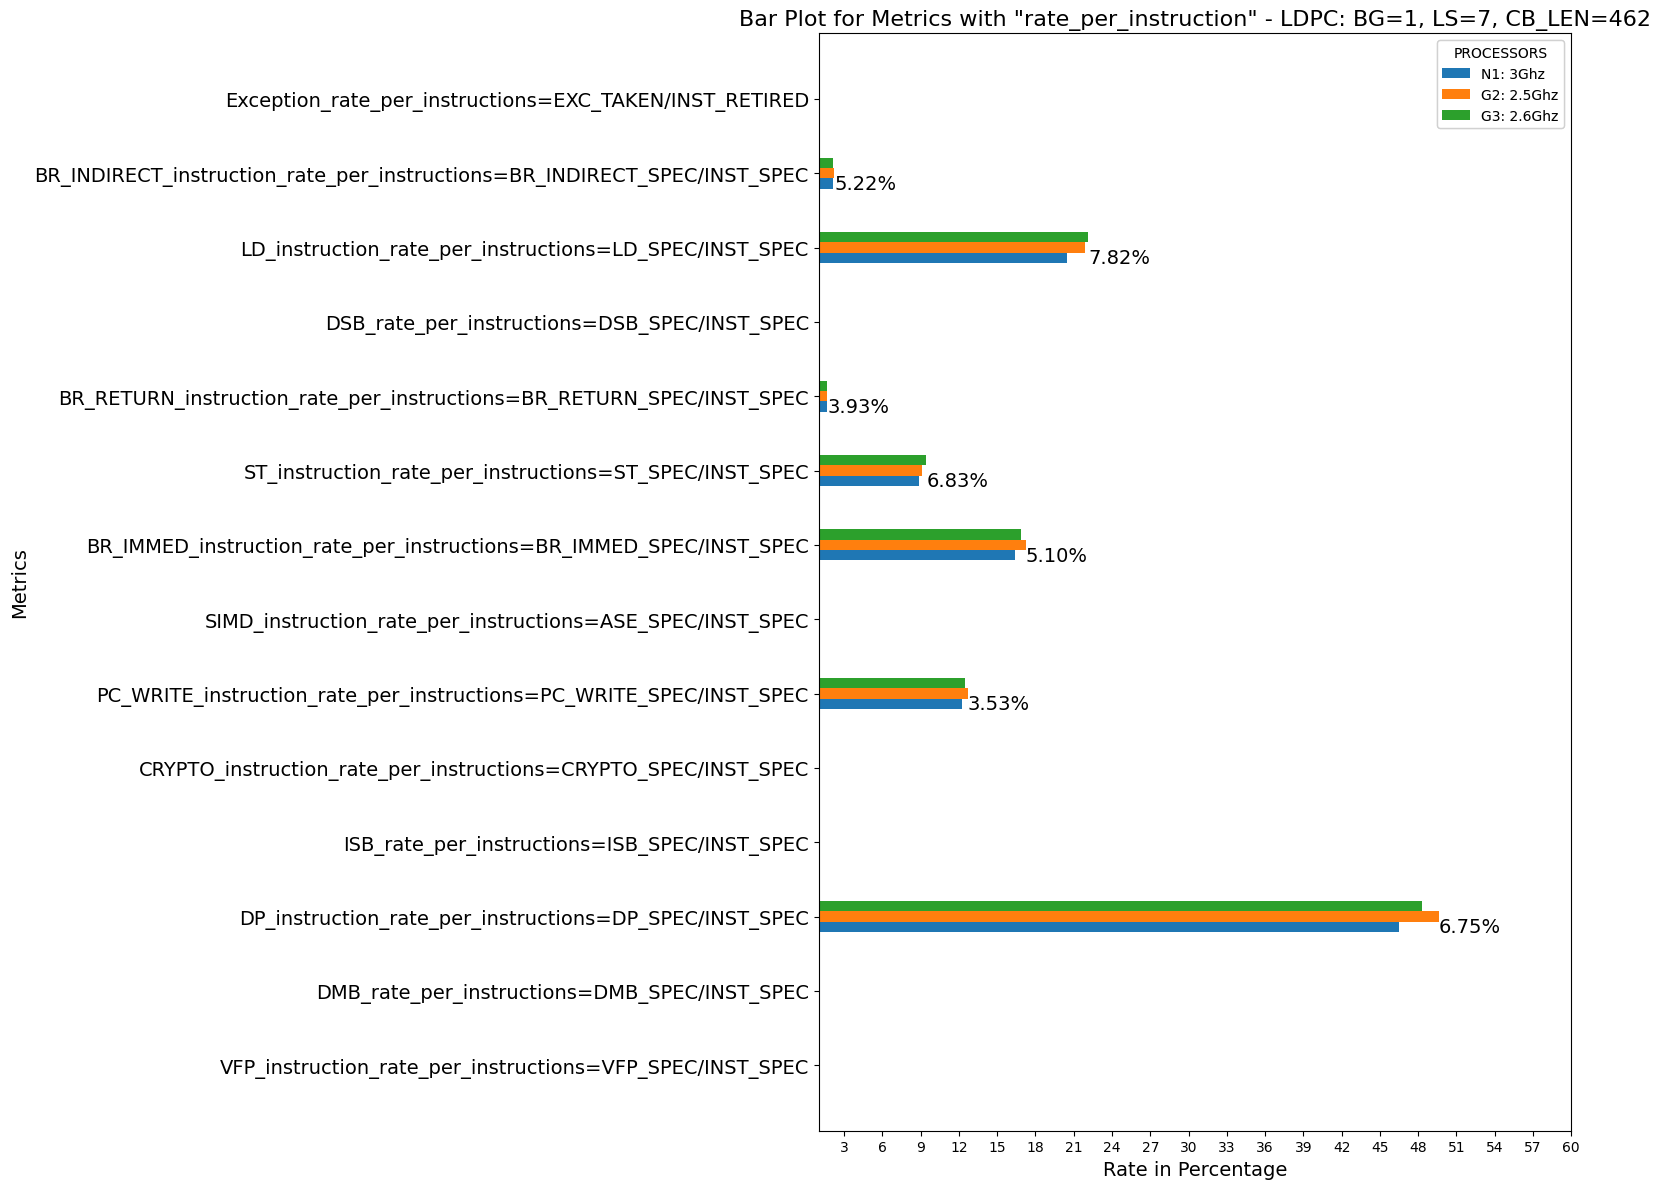

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/2813095990.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 1000


<Figure size 640x480 with 0 Axes>

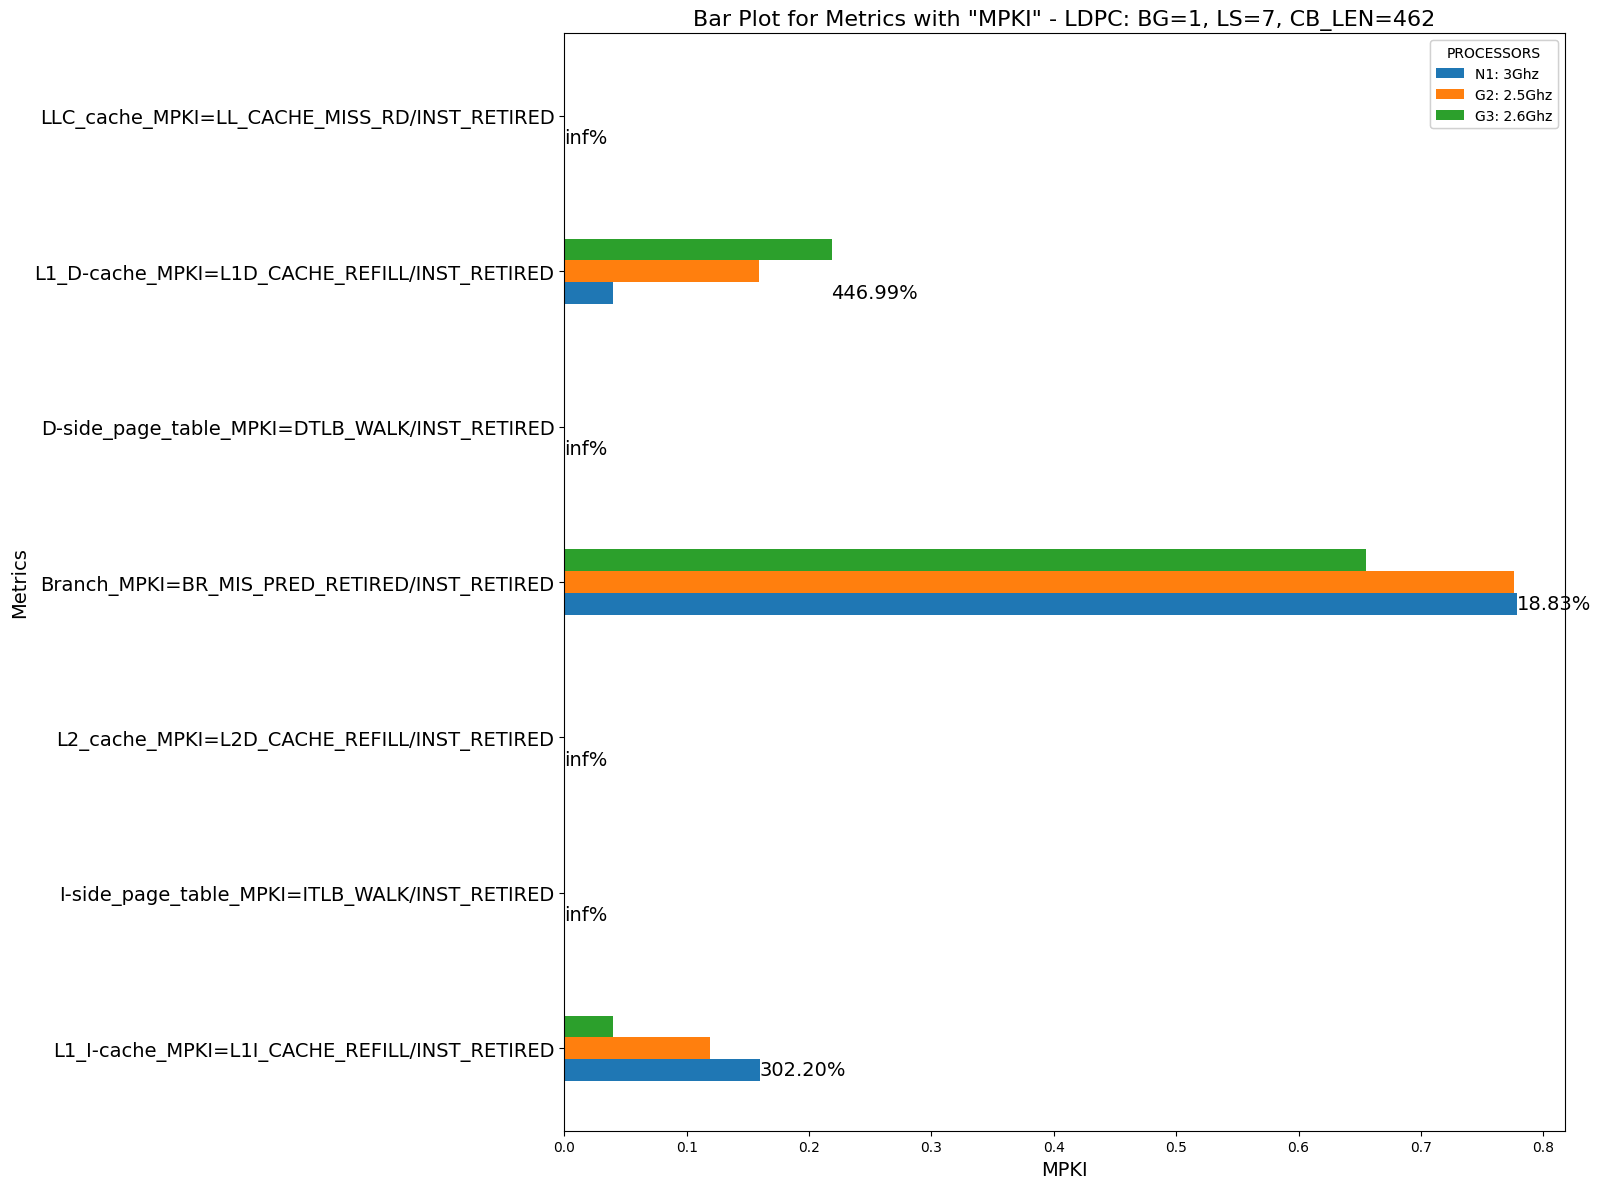

<Figure size 640x480 with 0 Axes>

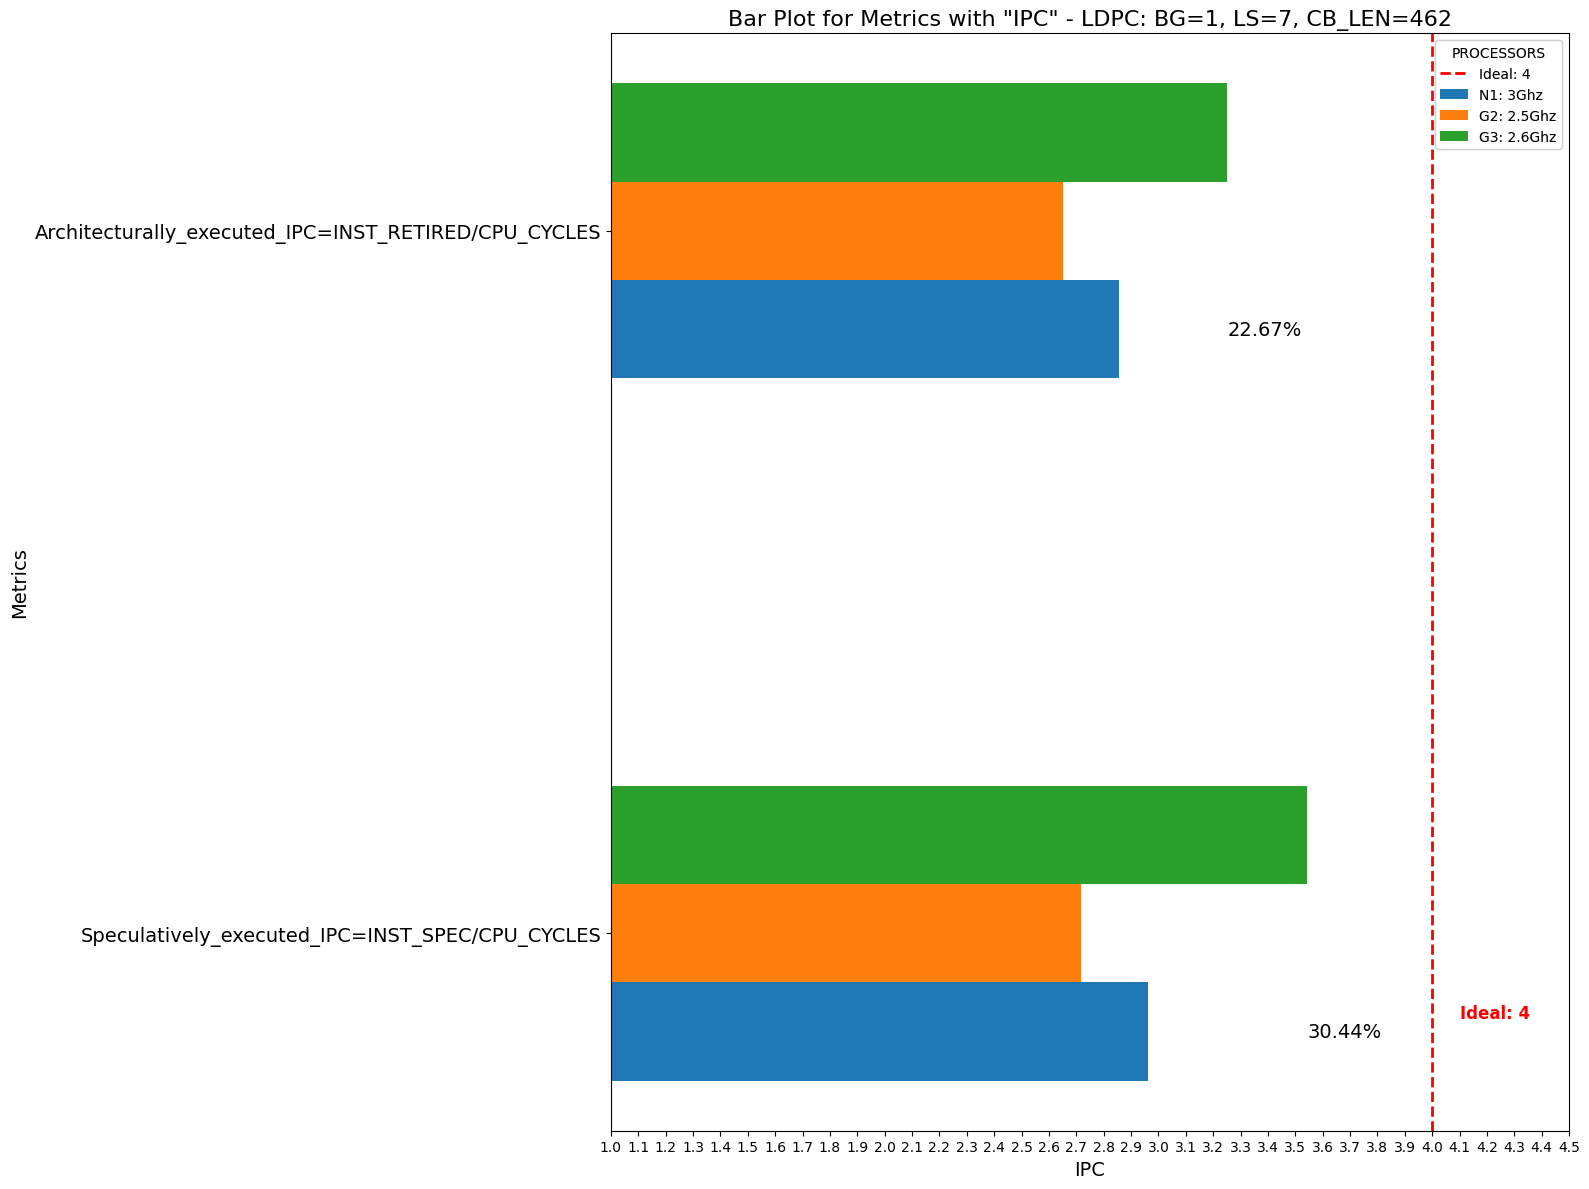

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/2813095990.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

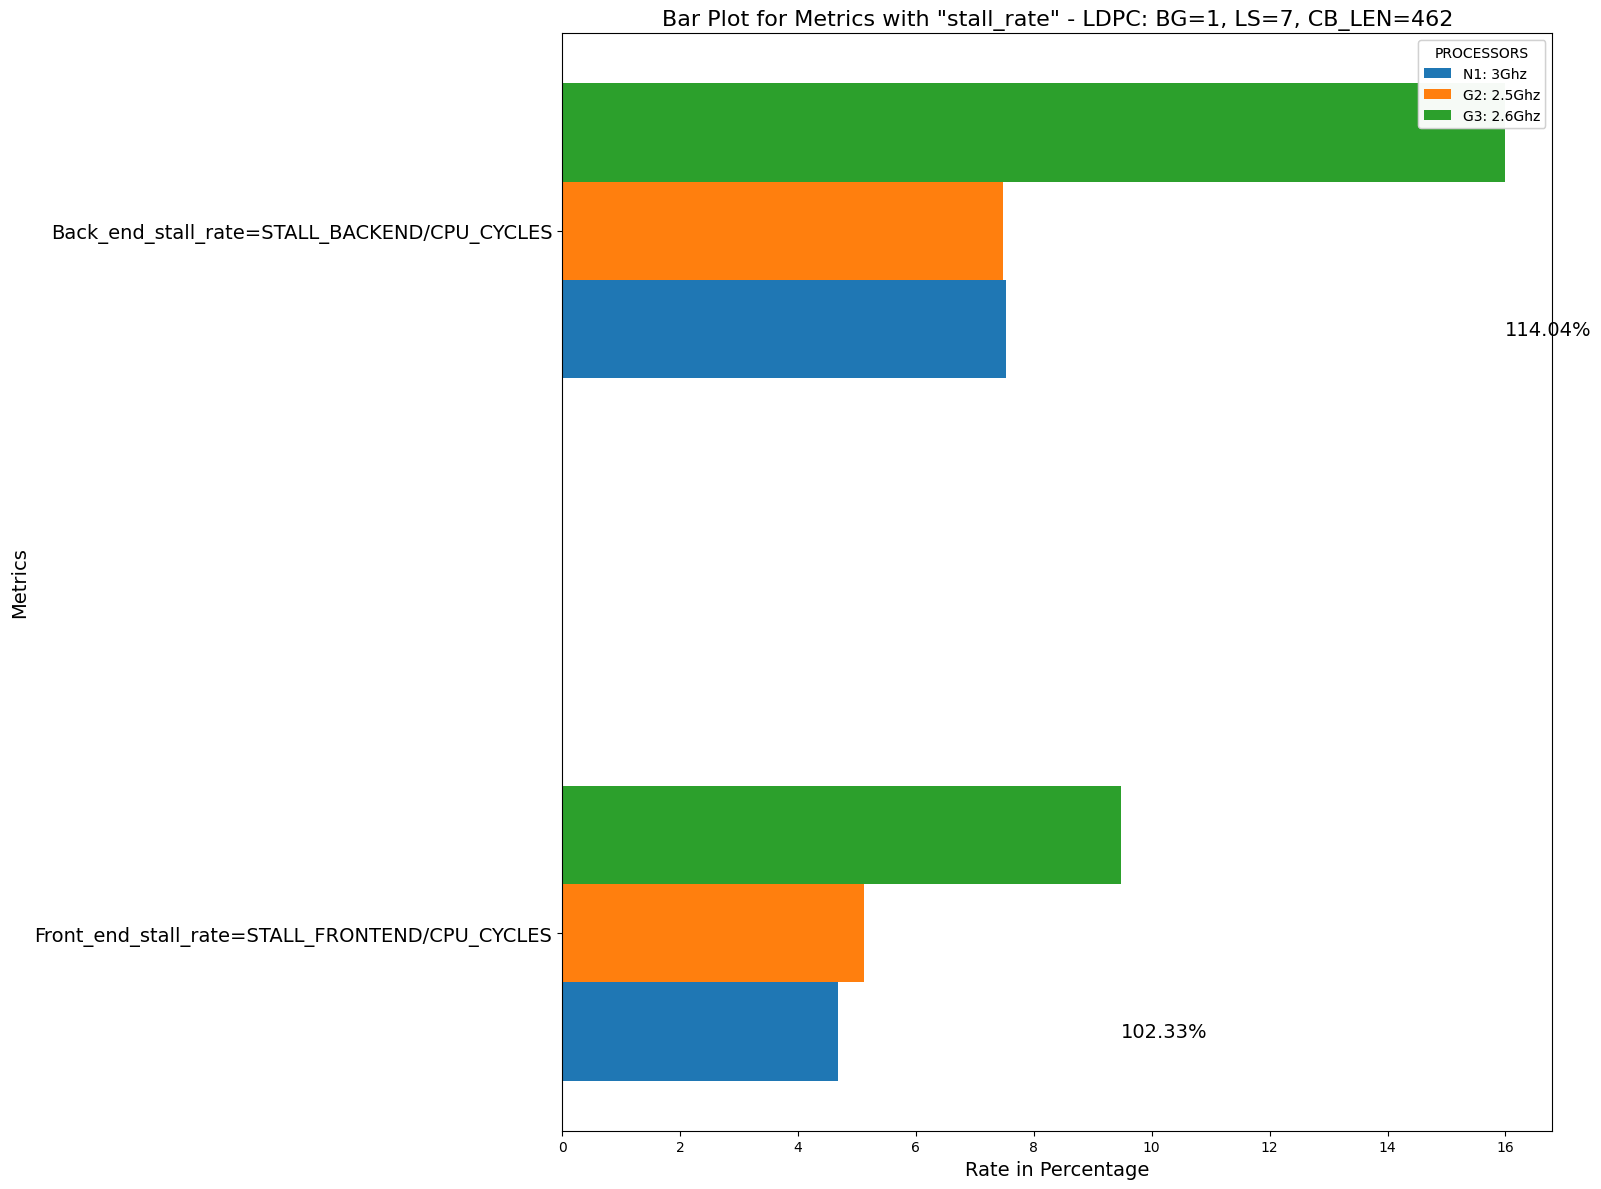

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/2813095990.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/2813095990.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

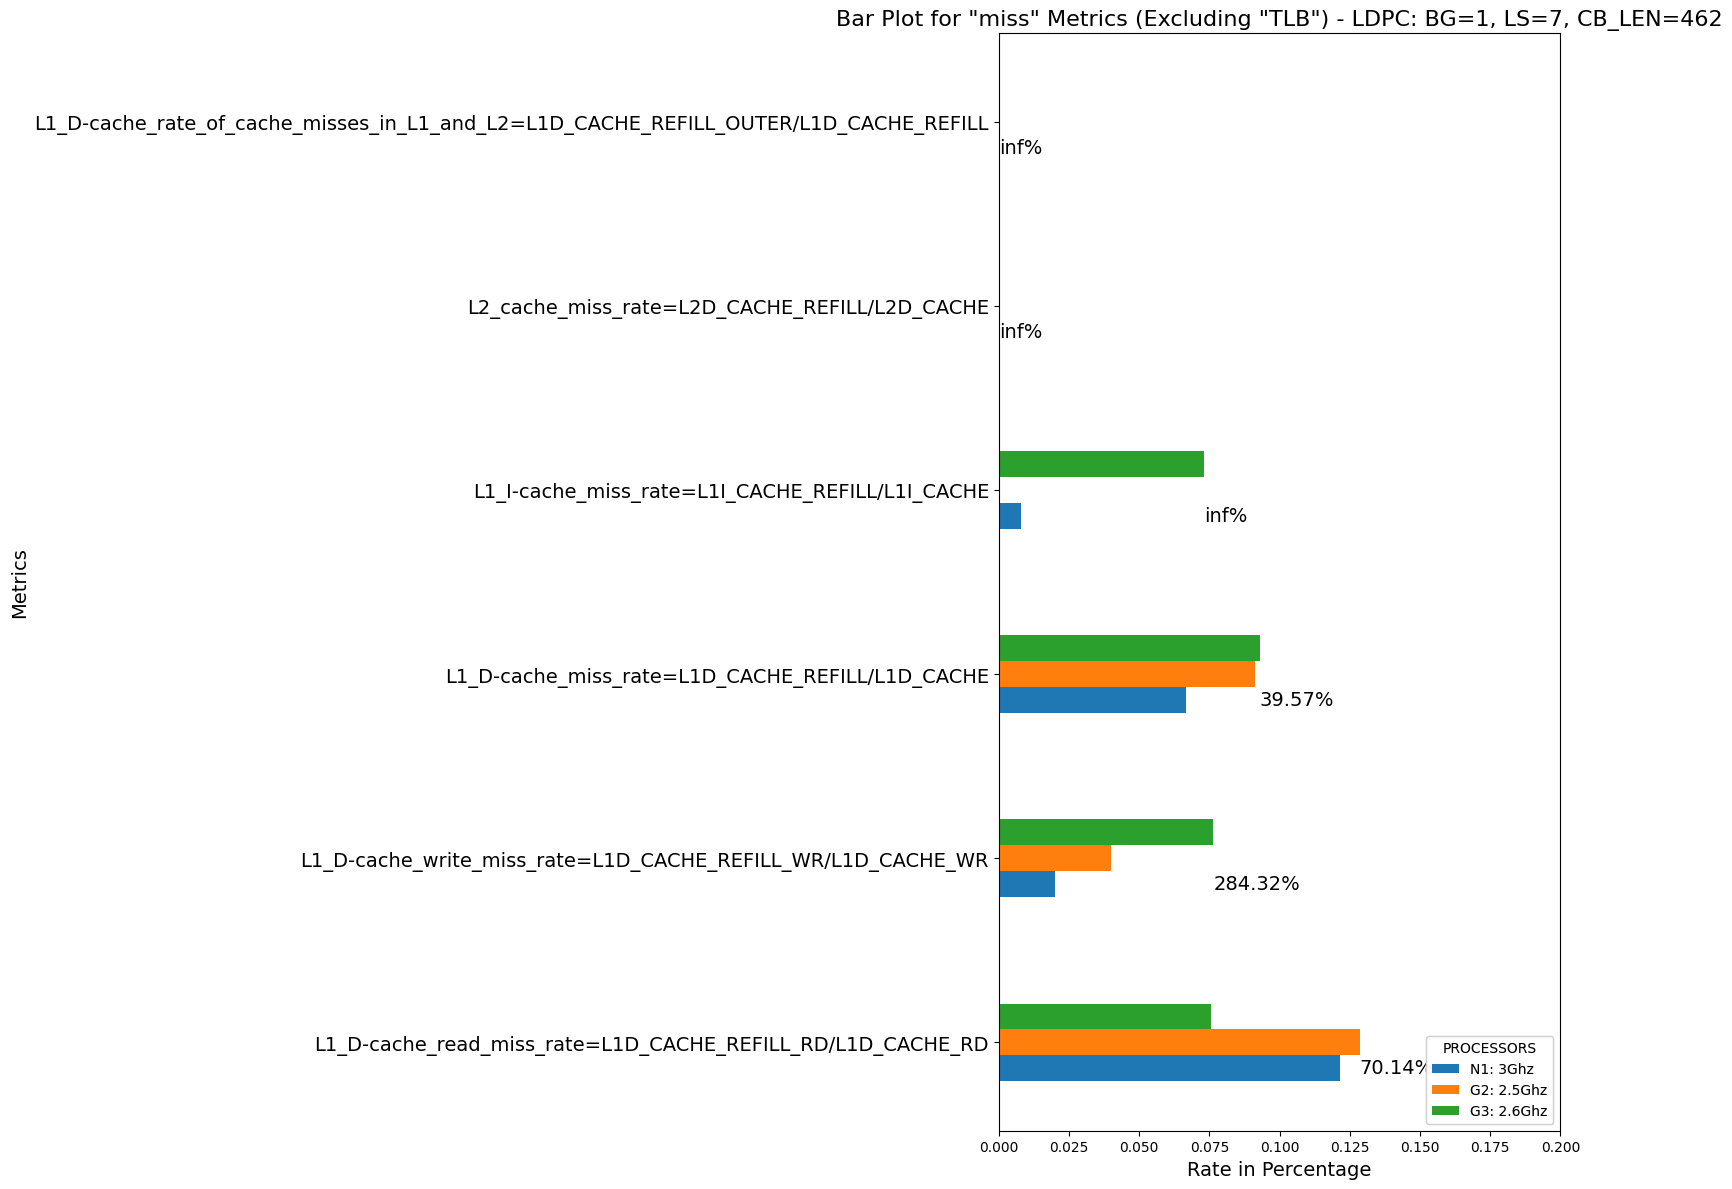

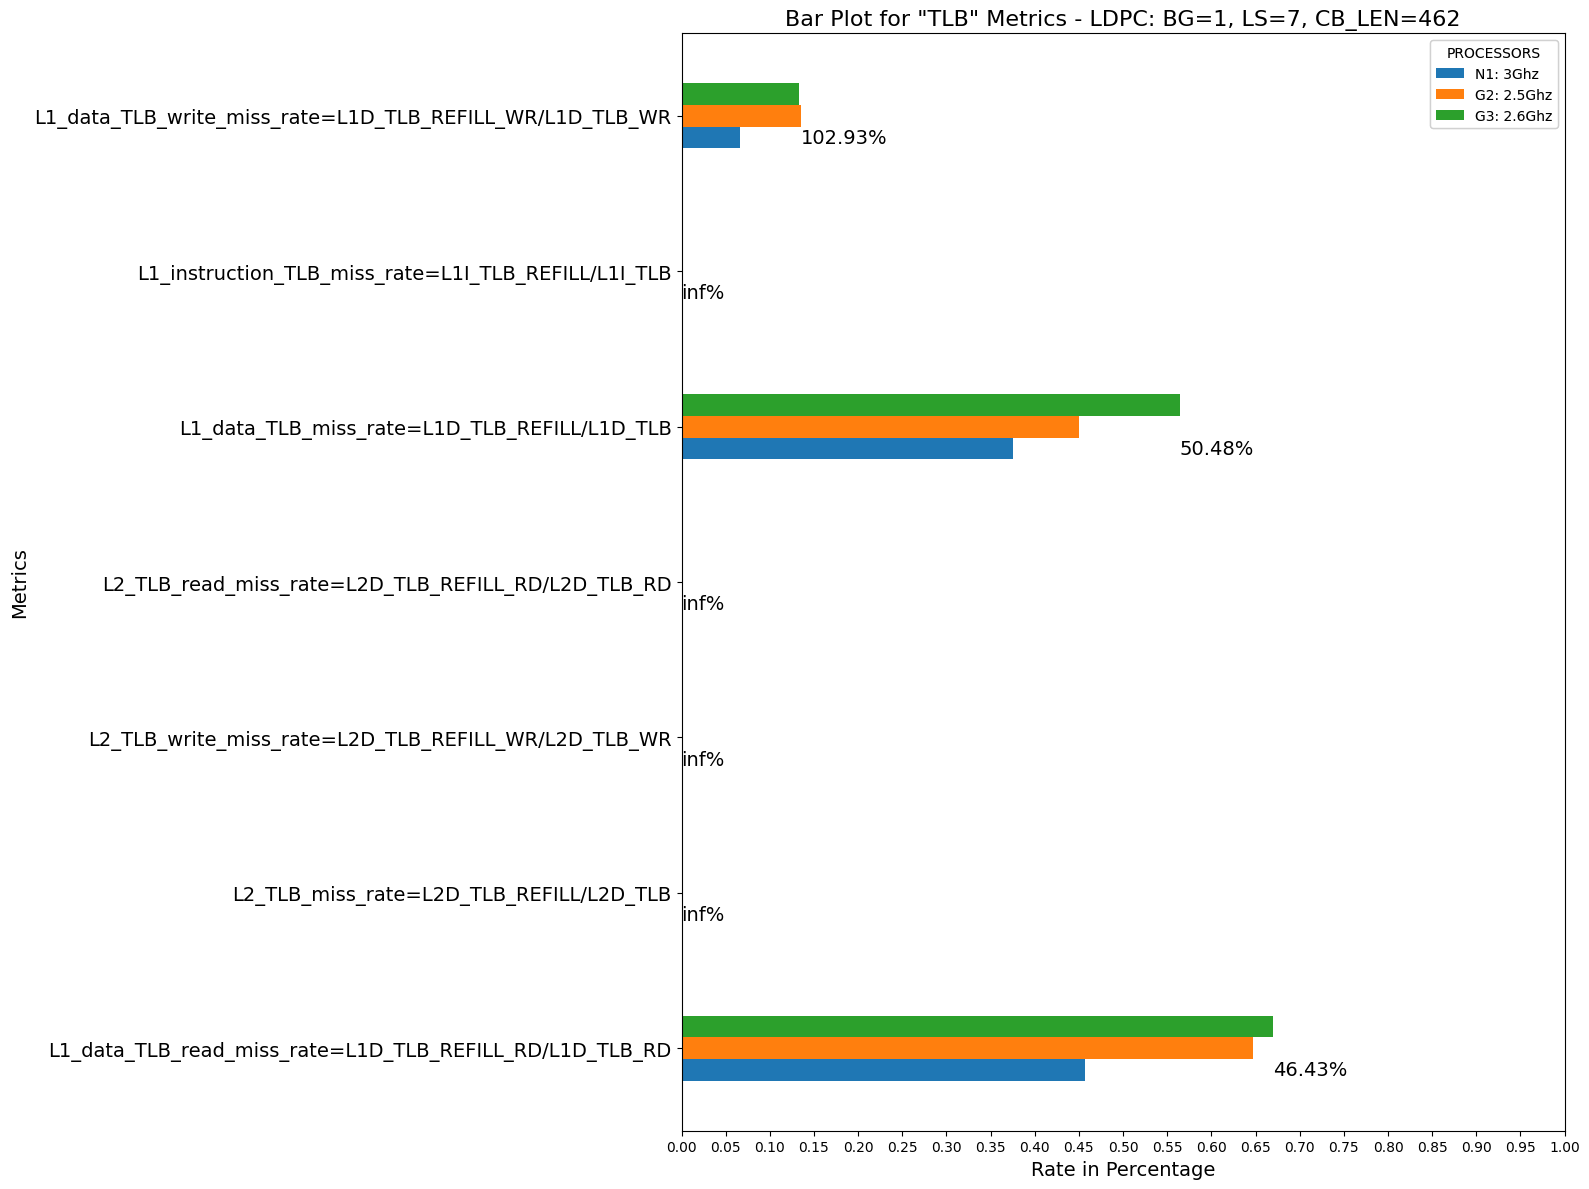

In [2]:
## Plotting KPI for LDPC
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Hardcoded here, will be given as inputs in cmdline later
csv_files = ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/n1_metrics.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/g2_metrics.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/g3_metrics.csv']
data = []
for file in csv_files:
    df = pd.read_csv(file)
    data.append(df)
    
#Calculate percentage difference between max and min bars in a cluster. 
def calculate_percentage_difference(max_vals, min_vals):
    percentage_differences = []
    for max_val, min_val in zip(max_vals, min_vals):
        if min_val == 0:
            percentage_difference = float('inf')  # Handle division by zero
        else:
            percentage_difference = ((max_val - min_val) / min_val) * 100
        percentage_differences.append(percentage_difference)
    return percentage_differences

#Include only metrics containing "miss" but not "TLB" in it as a keyword/keystring
def filter_and_plot_miss(plot_num):
    filtered_data = [df[df['Metrics'].str.contains('miss') & ~df['Metrics'].str.contains('TLB')] for df in data]

    for df in filtered_data:
        #df['Event_1/Event_2'] *= 100
        df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100

    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))

    bar_width = 0.14  # Adjust spacing

    # Array of indices for the y-coordinates of bars
    indices = np.arange(len(filtered_data[0]))
    
    #Hardcoded jor jupyter
    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']
    
    # Use ax.barh for horizontal bars & use height instead of width
    for i, df in enumerate(filtered_data):
        ax.barh(  
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
    # Lists to store max and min values of the bar cluster of every metric 
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []
    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value

        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for "miss" Metrics (Excluding "TLB") - LDPC: BG=1, LS=7, CB_LEN=462'
    ax.set_ylabel('Metrics', fontsize=14)
    ax.set_xlabel('Rate in Percentage', fontsize=14)
    ax.set_title(formatted_title,fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    # y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  

    ax.set_xlim(0, 0.2)  # Adjust xlim for horizontal chart
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.025))

    # Calculate and annotate the percentage difference based on max and min values on the plot
    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        # Annotate or display to the right side of the max value
        annotate_x = max(max_values[i], min_values[i]) + 0
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)

    ax.legend()
    custom_legend = ax.legend(loc='lower right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.tight_layout()
    plt.savefig('/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/ldpc_miss_no_tlb.pdf')
    
# Include only metrics containing "TLB" but not "context_swap"
def filter_and_plot_tlb(plot_num):
    
    filtered_data = [df[df['Metrics'].str.contains('TLB') & ~df['Metrics'].str.contains('context_swap')] for df in data]
    for df in filtered_data:
        df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Adjust spacing
    bar_width = 0.14 

    # Array of indices for the y-coordinates of bars
    indices = np.arange(len(filtered_data[0]))

    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']

    for i, df in enumerate(filtered_data):
        ax.barh(  
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
        
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []

    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value
        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for "TLB" Metrics - LDPC: BG=1, LS=7, CB_LEN=462'
    ax.set_ylabel('Metrics', fontsize=14)
    ax.set_xlabel('Rate in Percentage', fontsize=14)
    ax.set_title(formatted_title, fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    #y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  
    ax.set_xlim(0, 1)  # Adjust xlim for horizontal chart
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.05))
    
    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        annotate_x = max(max_values[i], min_values[i]) + 0
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)
    ax.legend()
    custom_legend = ax.legend(loc='upper right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.tight_layout()
    plt.savefig('/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/ldpc_tlb.pdf')
    
# Include only metrics containing "rate_per_instruction"
def filter_and_plot(key_string, plot_num):
   
    filtered_data = [df[df['Metrics'].str.contains(key_string)] for df in data]

    if key_string == 'rate_per_instruction' or key_string == 'miss' or key_string == 'read_rate|write_rate' or key_string == 'walk_rate' or key_string == 'eviction_rate' or key_string == 'stall_rate' or key_string == 'rate_over_time' or key_string == 'exclusive_store':
        for df in filtered_data:
            #df['Event_1/Event_2'] *= 100
            df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
    elif key_string == 'MPKI':
        for df in filtered_data:
            #df['Event_1/Event_2'] *= 1000
            df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 1000

    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))

    bar_width = 0.14  
    indices = np.arange(len(filtered_data[0]))
    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']

    for i, df in enumerate(filtered_data):
        ax.barh( 
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []
    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value

        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for Metrics with "{key_string}" - LDPC: BG=1, LS=7, CB_LEN=462'
    ax.set_ylabel('Metrics', fontsize=14)
    if key_string == 'MPKI':
        ax.set_xlabel('MPKI', fontsize=14)
    elif key_string == 'misses_per_context_swap' or key_string == 'miss':
        ax.set_xlabel('Number of Misses')
    elif key_string == 'IPC':
        ax.set_xlabel('IPC', fontsize=14)
    else:
        ax.set_xlabel('Rate in Percentage',fontsize=14)
    ax.set_title(formatted_title,fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    #y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  
    if key_string == 'IPC':
        ax.set_xlim(1, 4.5)  # xlim for horizontal chart

        ideal_value = 4
        ax.axvline(ideal_value, color='red', linestyle='--', label=f'Ideal: {ideal_value}', linewidth=2)
        ax.annotate(
            f'Ideal: {ideal_value}',
            xy=(ideal_value + 0.1, 0.02),  #text pos can be adjusted
            color='red',
            fontsize=12,
            fontweight='bold',
        )
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))

    if key_string == 'rate_per_instruction':
        ax.set_xlim(1, 60)  # xlim for horizontal chart
        ax.xaxis.set_major_locator(plt.MultipleLocator(3))

    if key_string == 'read_rate|write_rate':
        ax.set_xlim(1, 75)  # xlim for horizontal chart
        ax.xaxis.set_major_locator(plt.MultipleLocator(5.0))

    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        annotate_x = max(max_values[i], min_values[i]) + 0

        # Find the position to print/annotate at the center of the cluster
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)

    ax.legend()
    custom_legend = ax.legend(loc='upper right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.savefig(f'/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/ldpc_{key_string}.pdf', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

def main():
    filter_and_plot('rate_per_instruction', 1)
    filter_and_plot('MPKI', 2)
    filter_and_plot('IPC', 3)
    filter_and_plot('stall_rate', 4)
    
    filter_and_plot_miss(1)
    filter_and_plot_tlb(2)

if __name__ == '__main__':
    main()

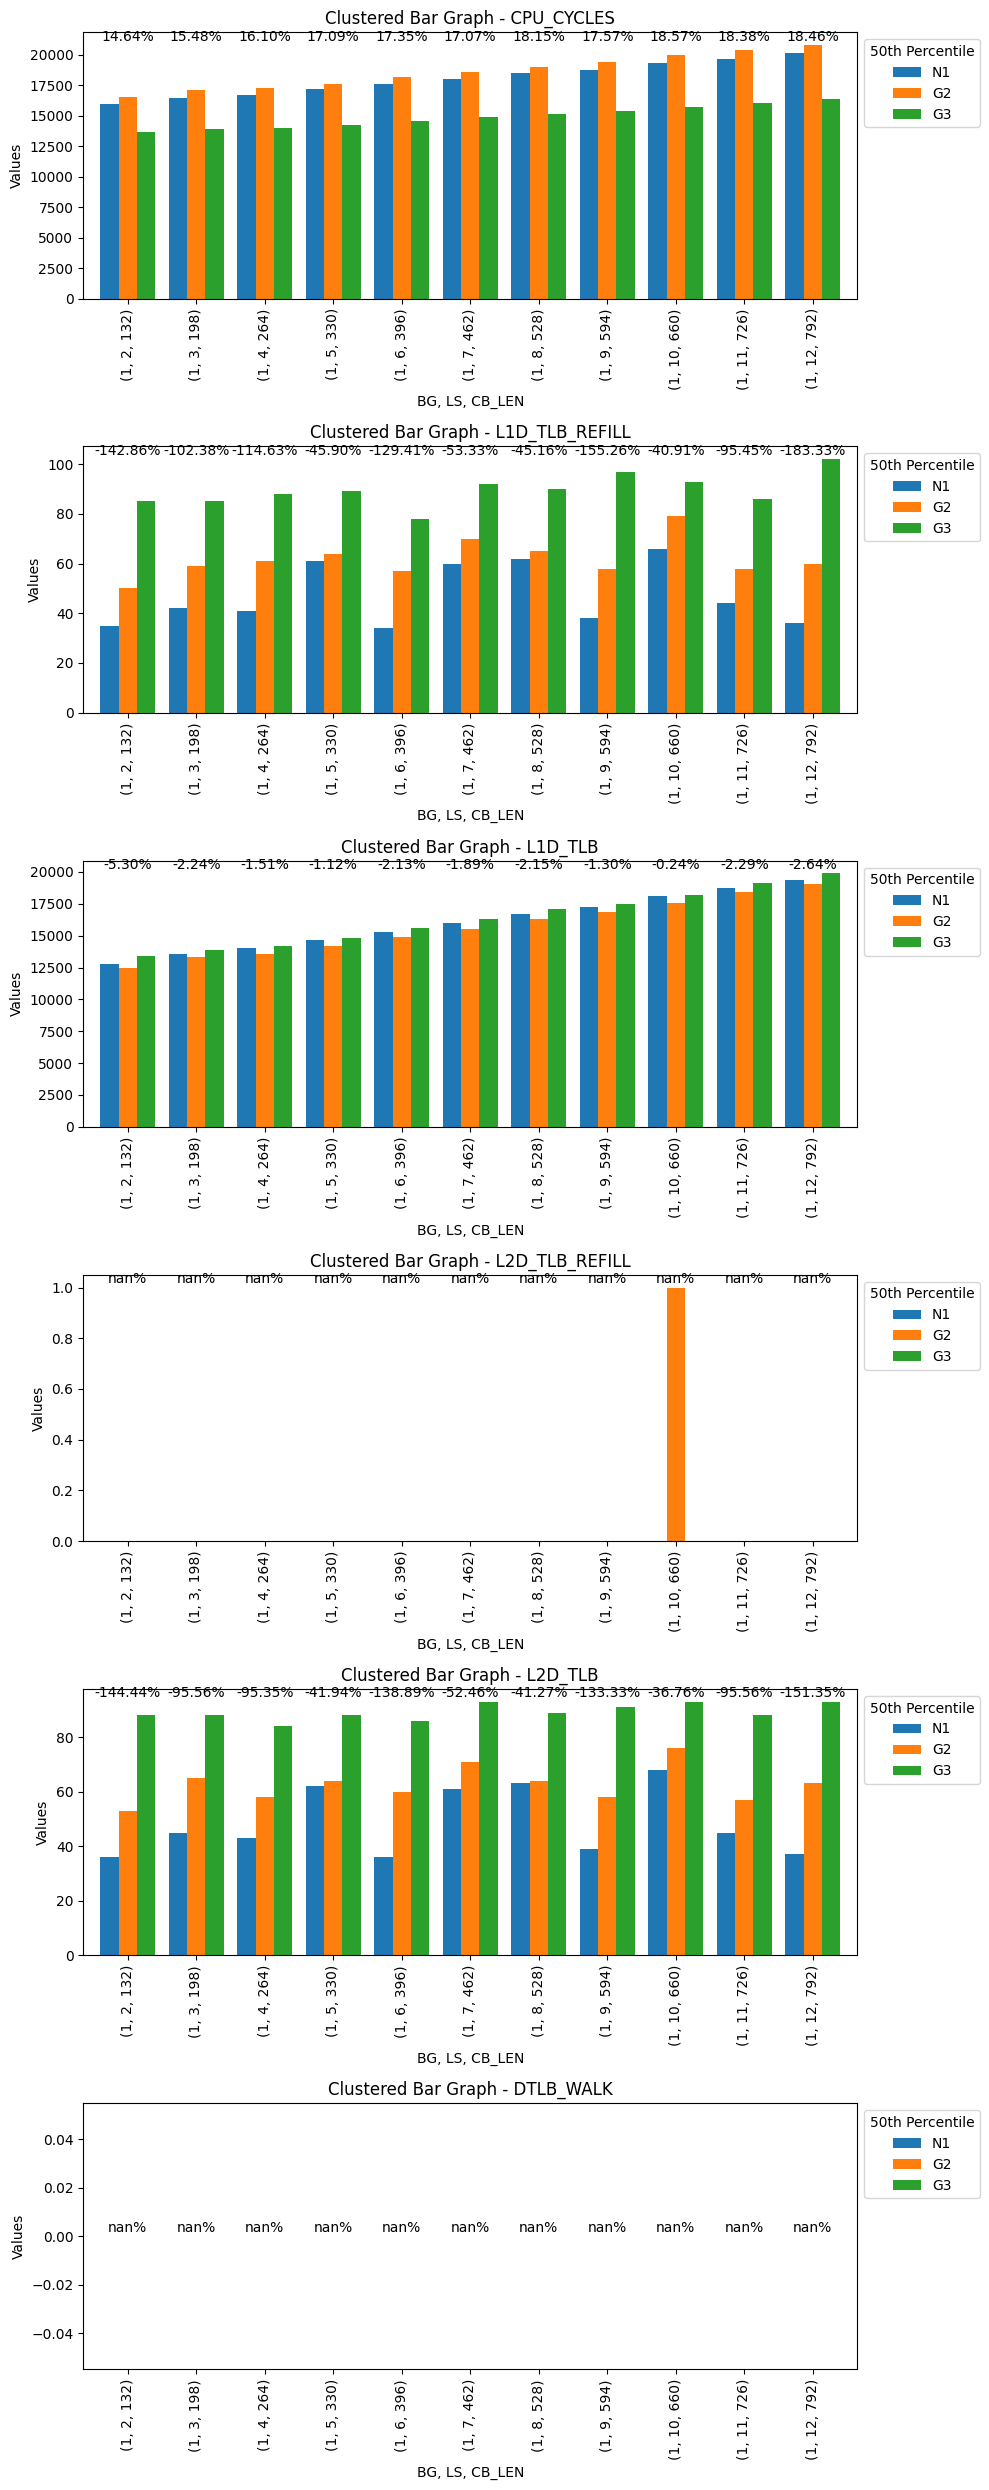

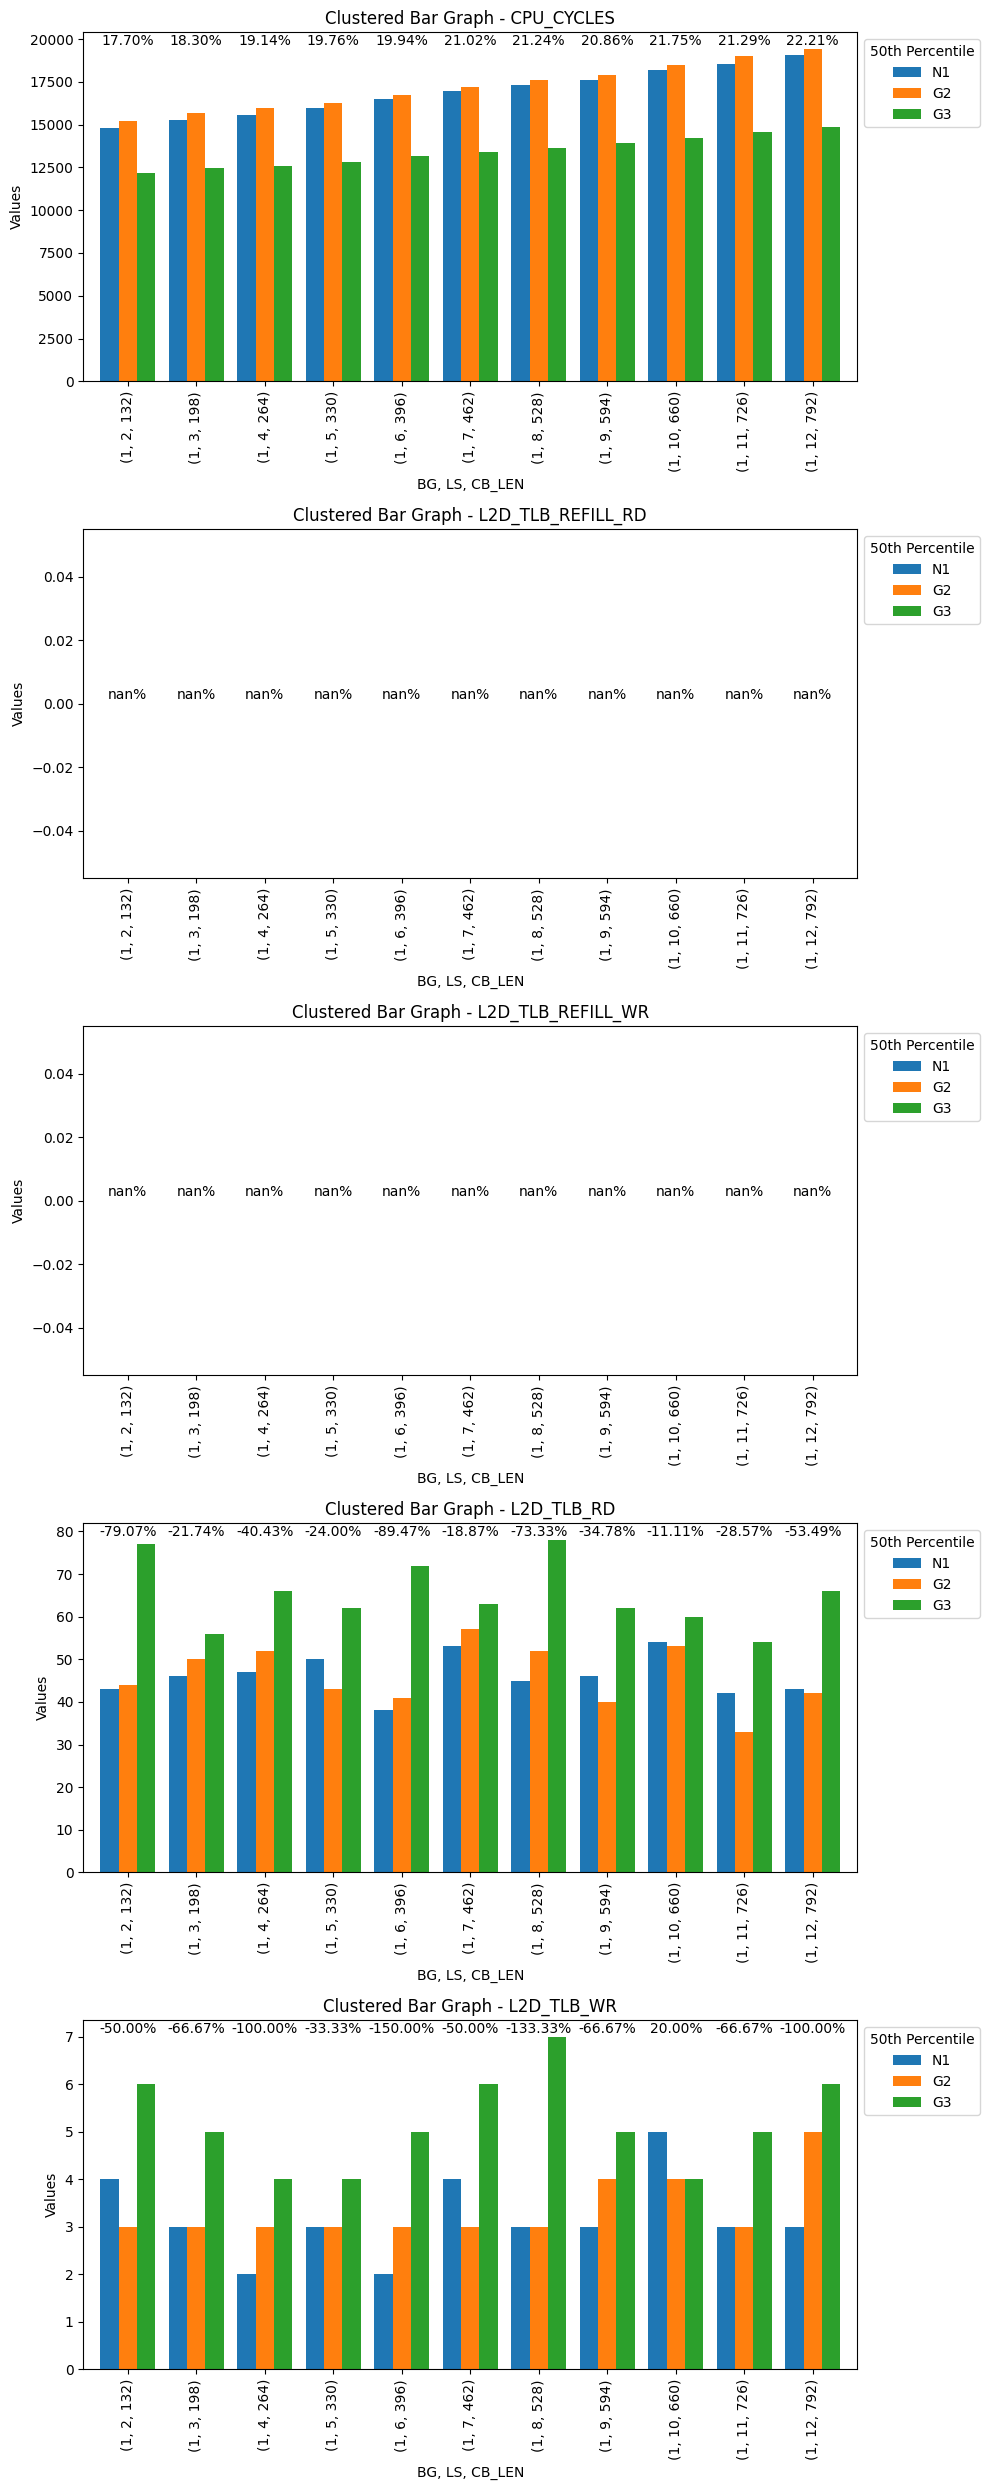

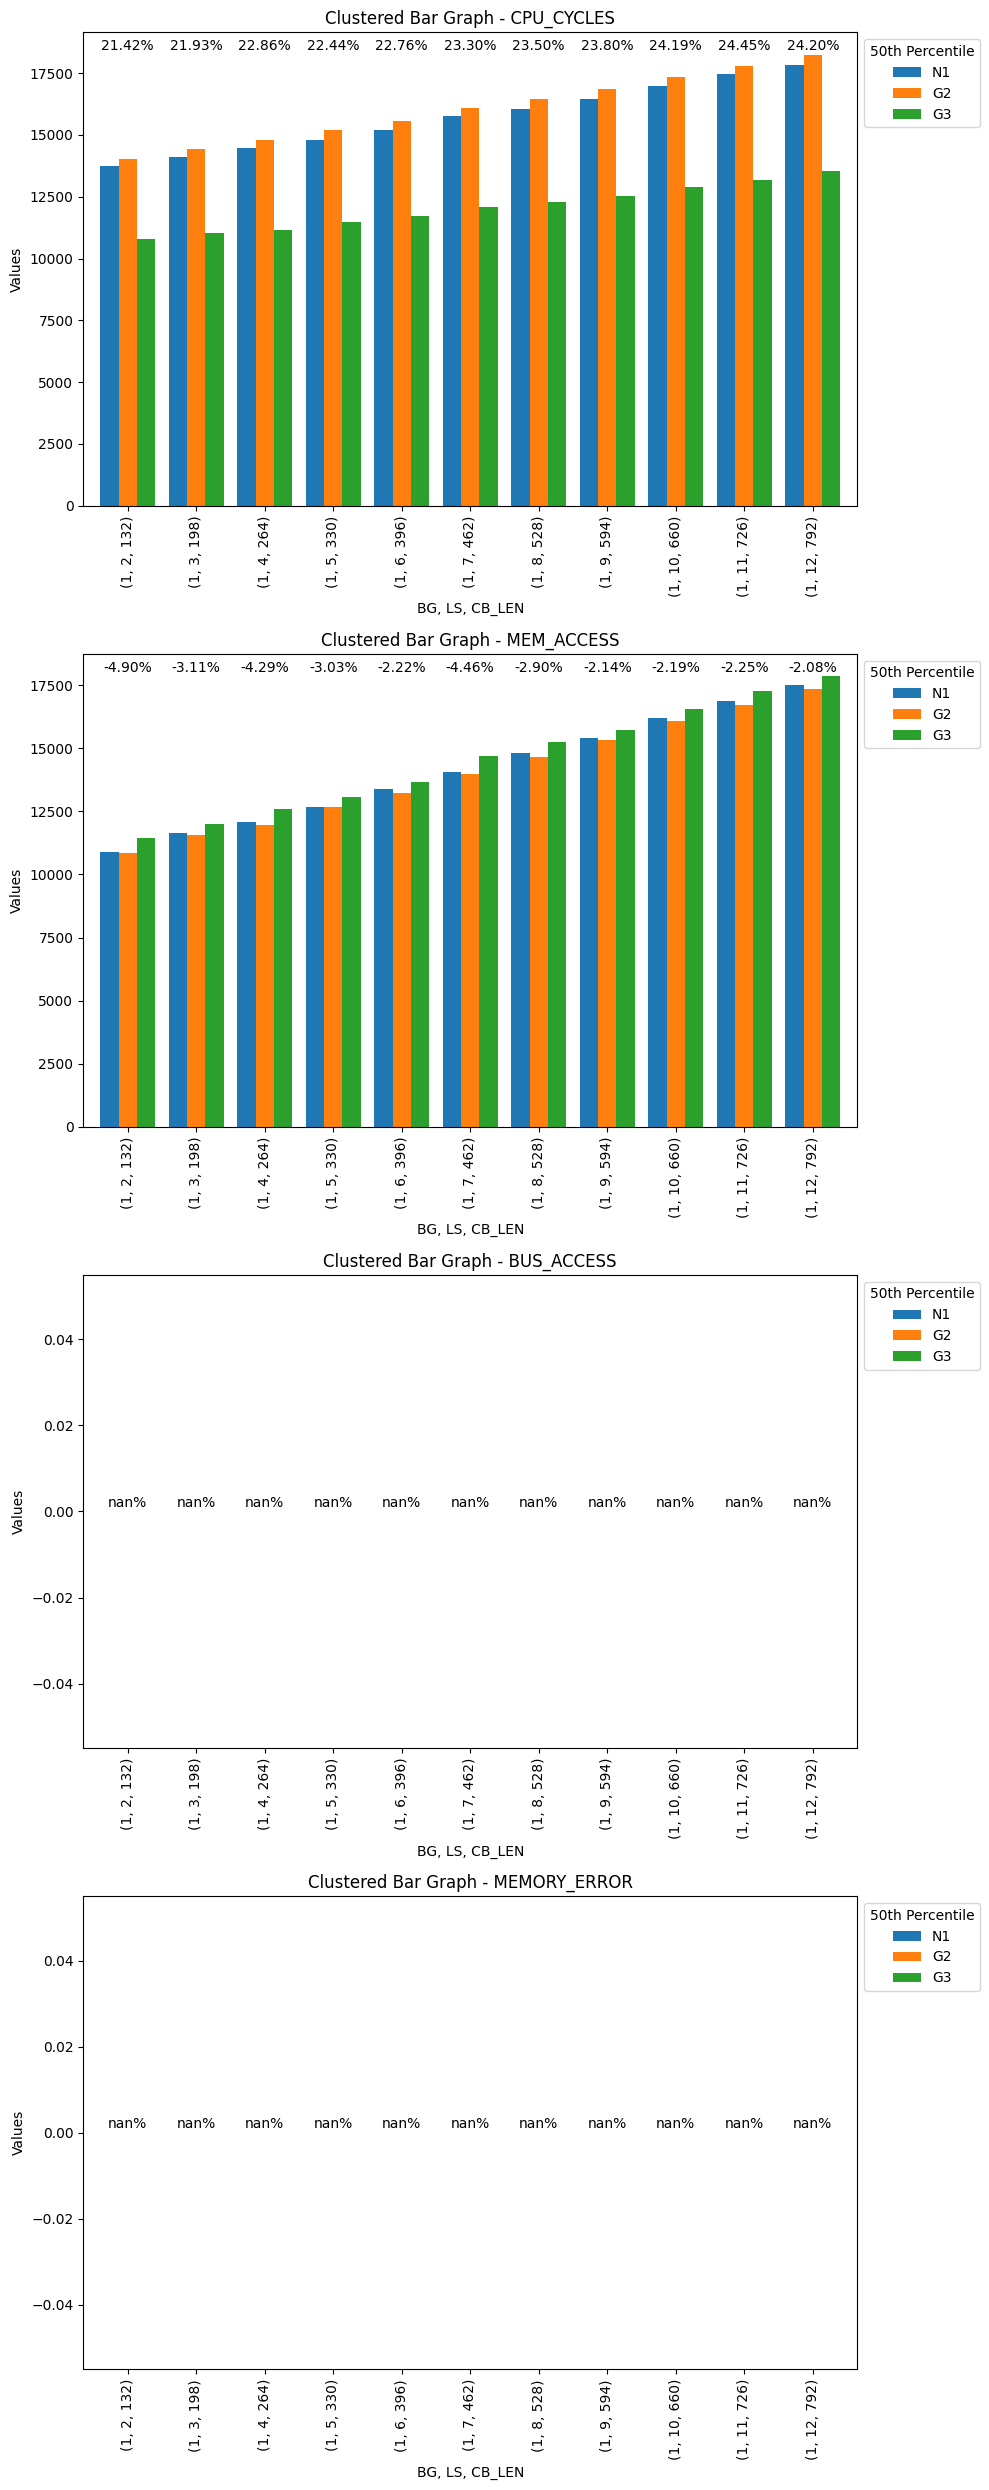

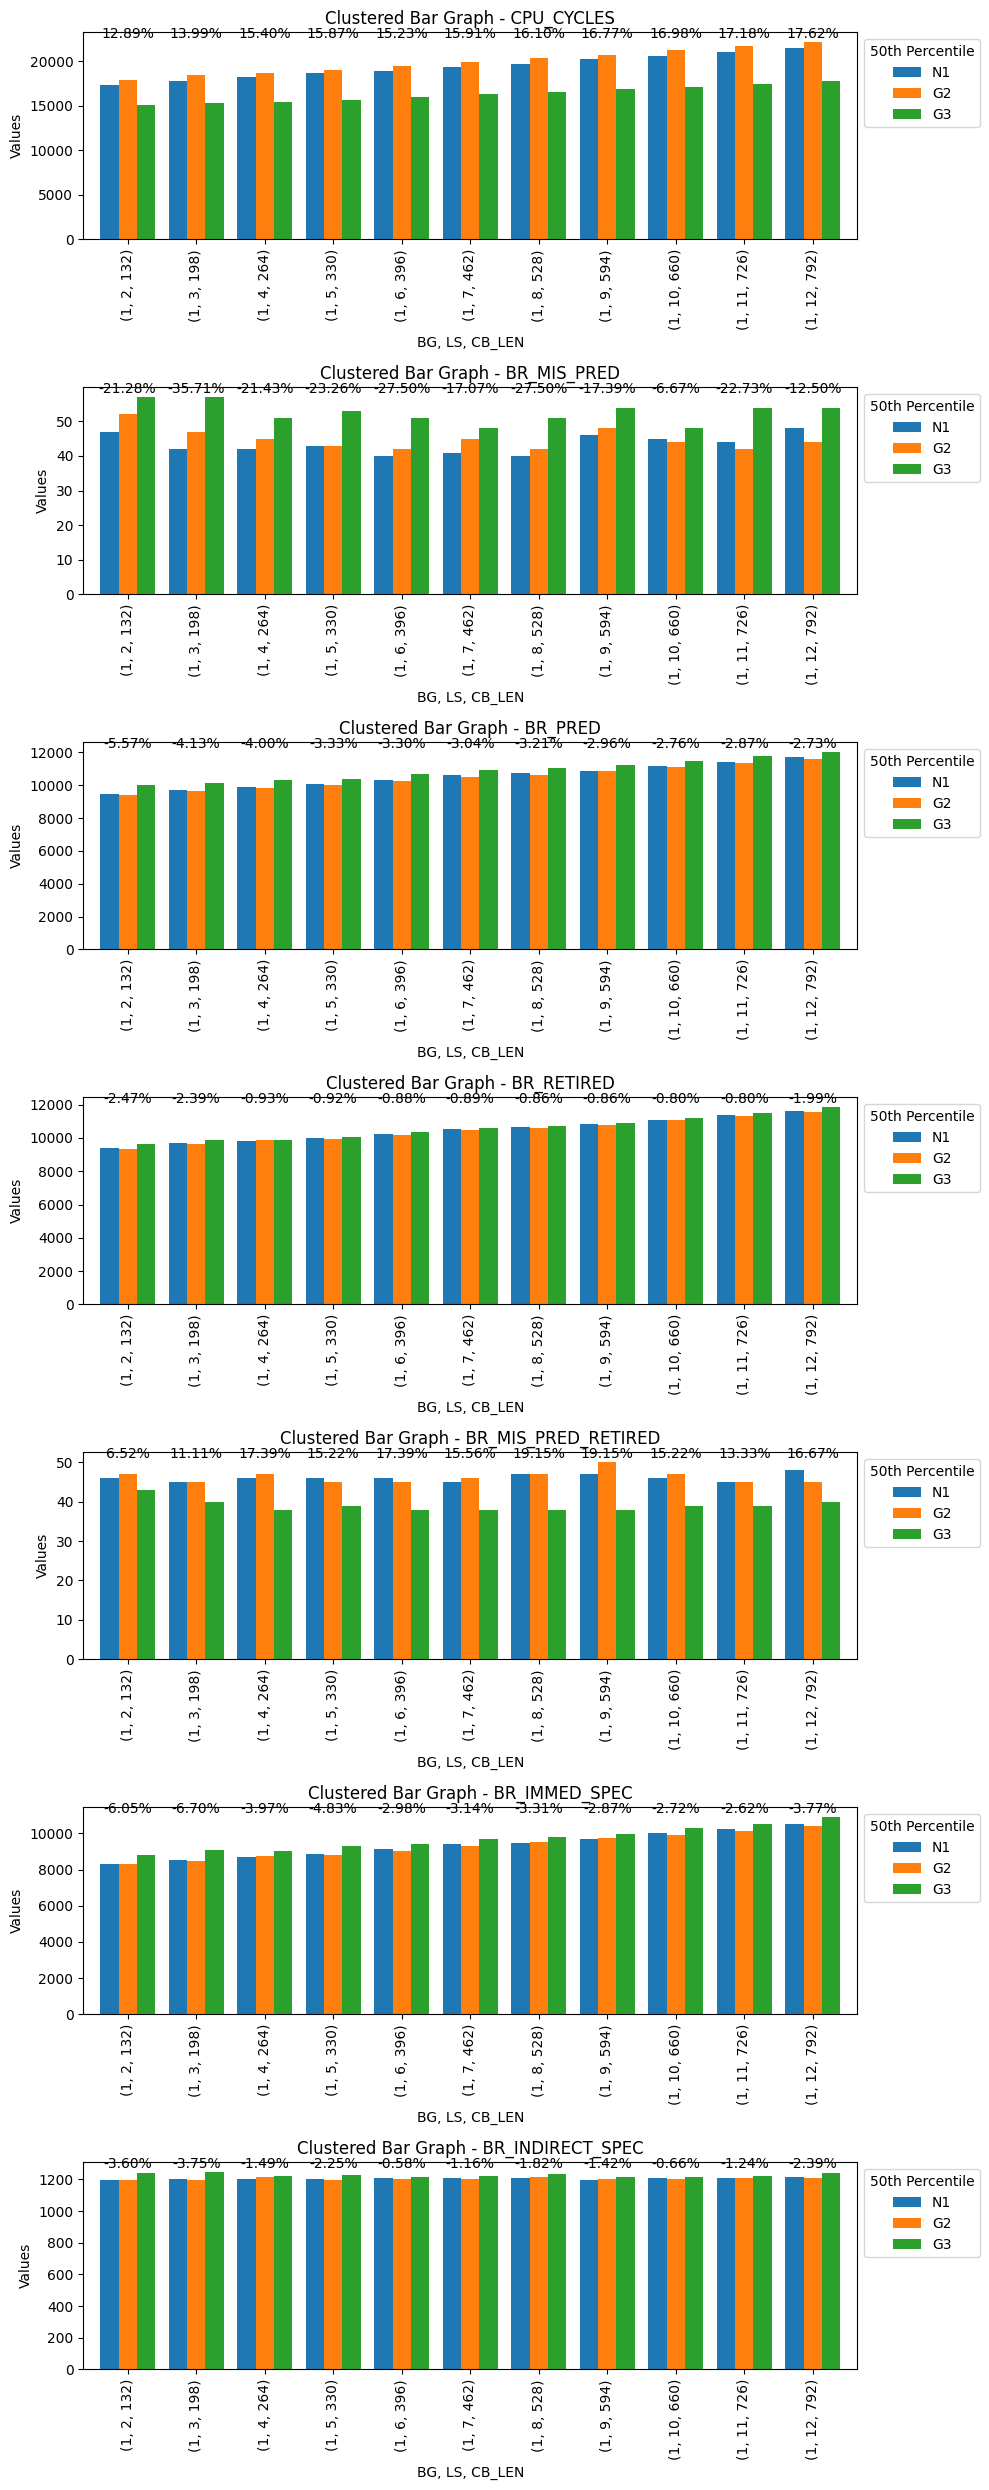

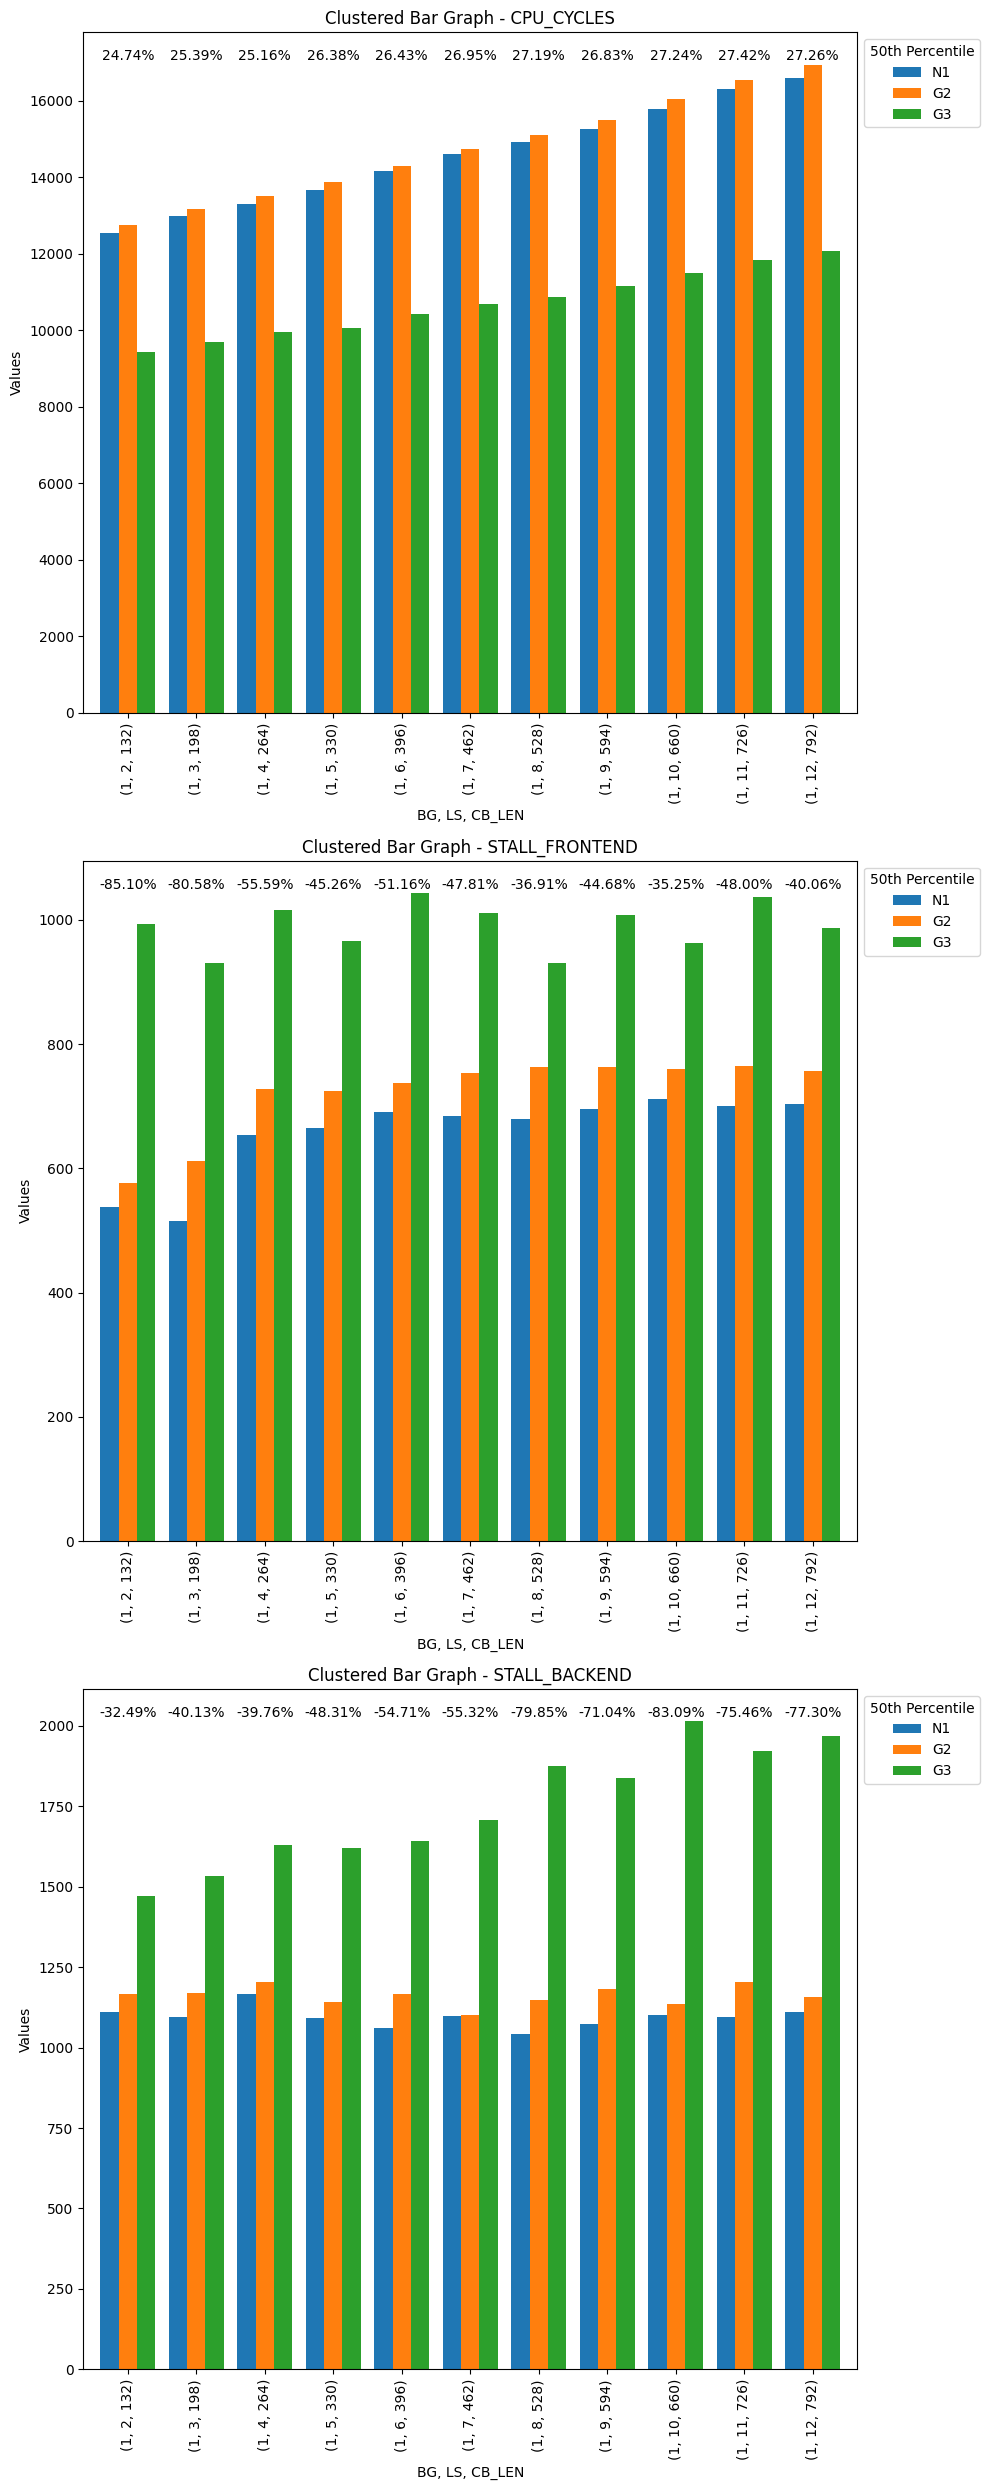

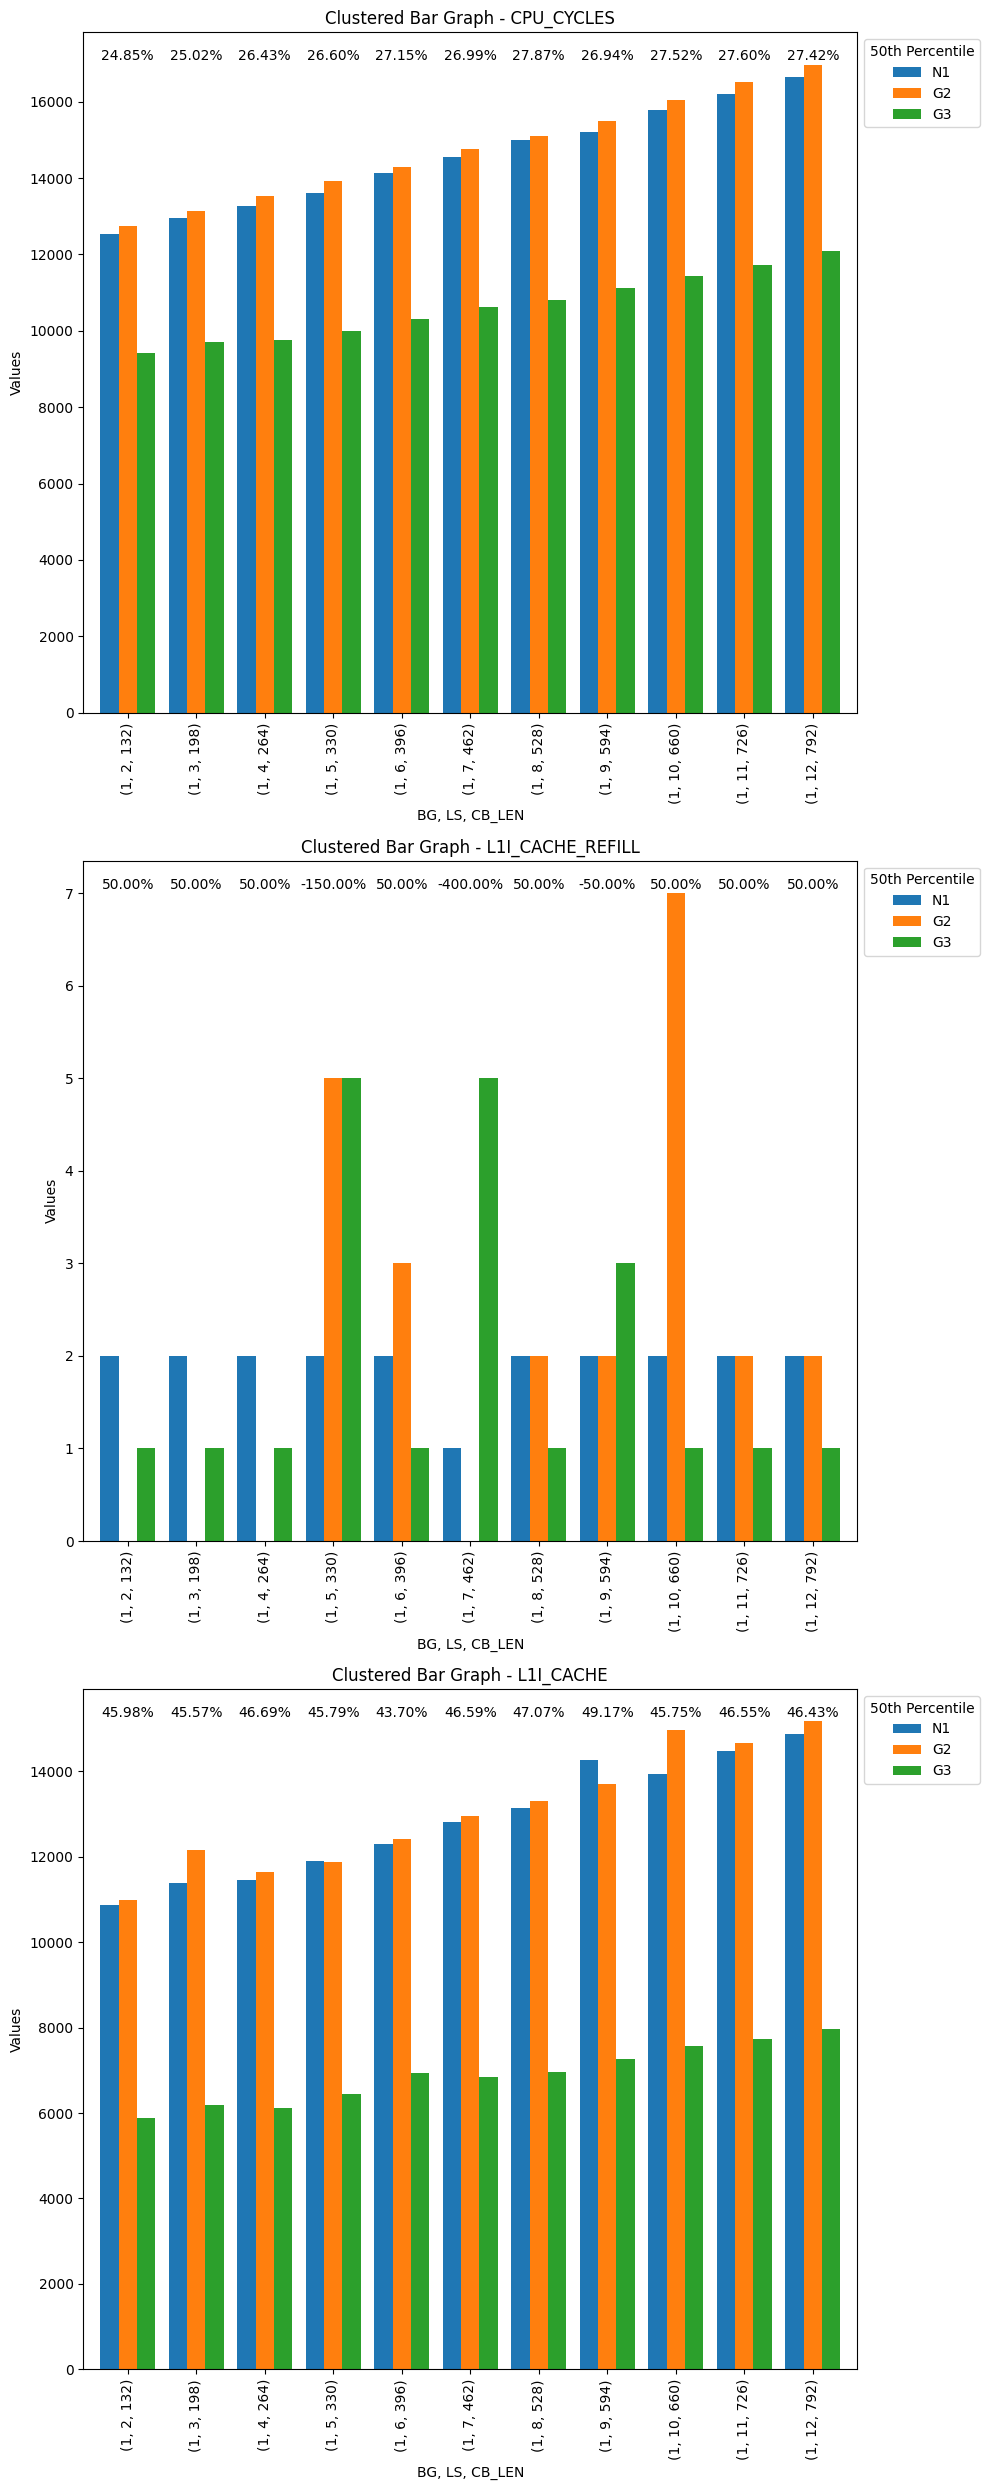

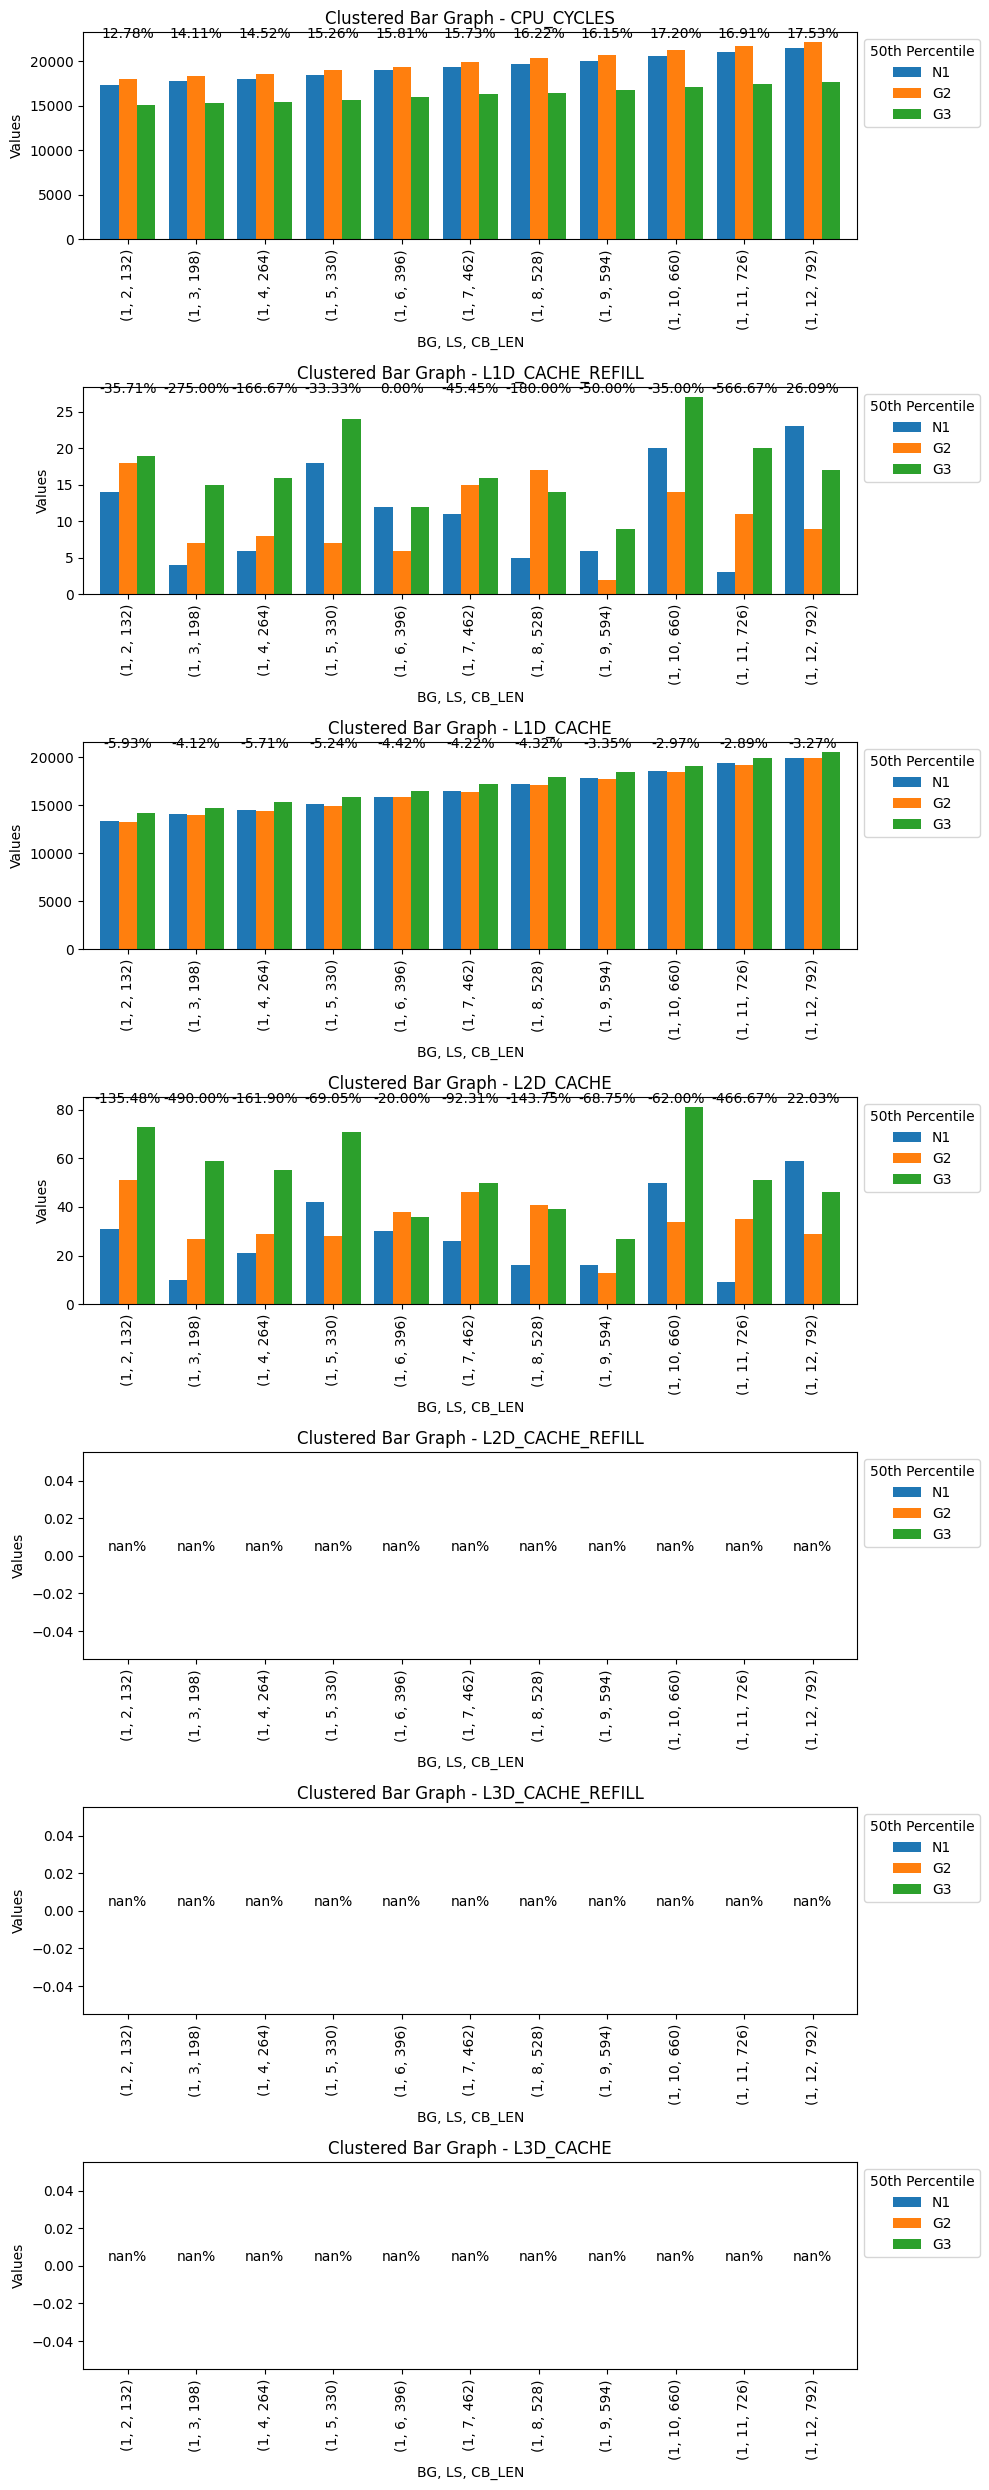

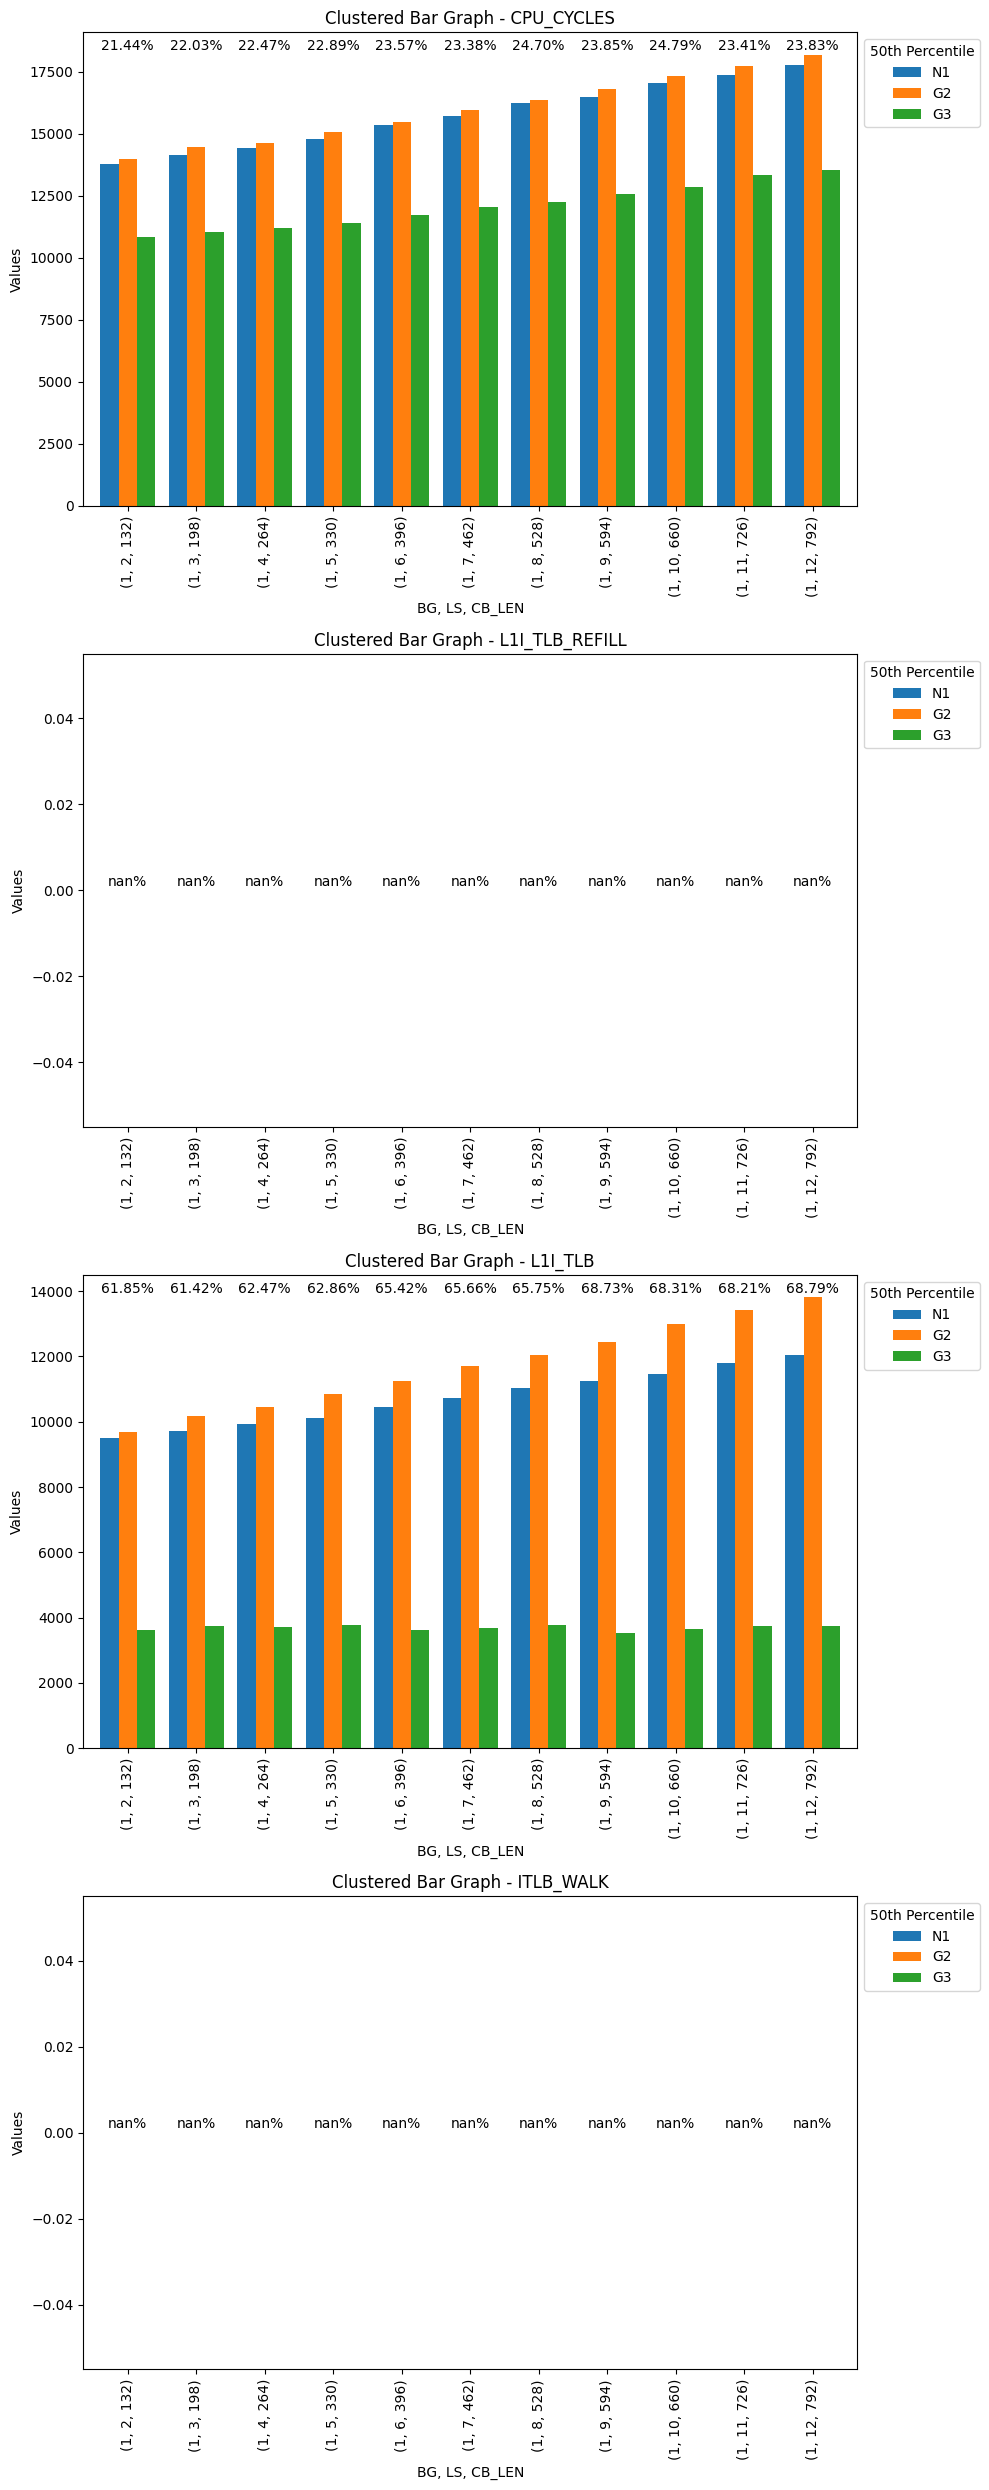

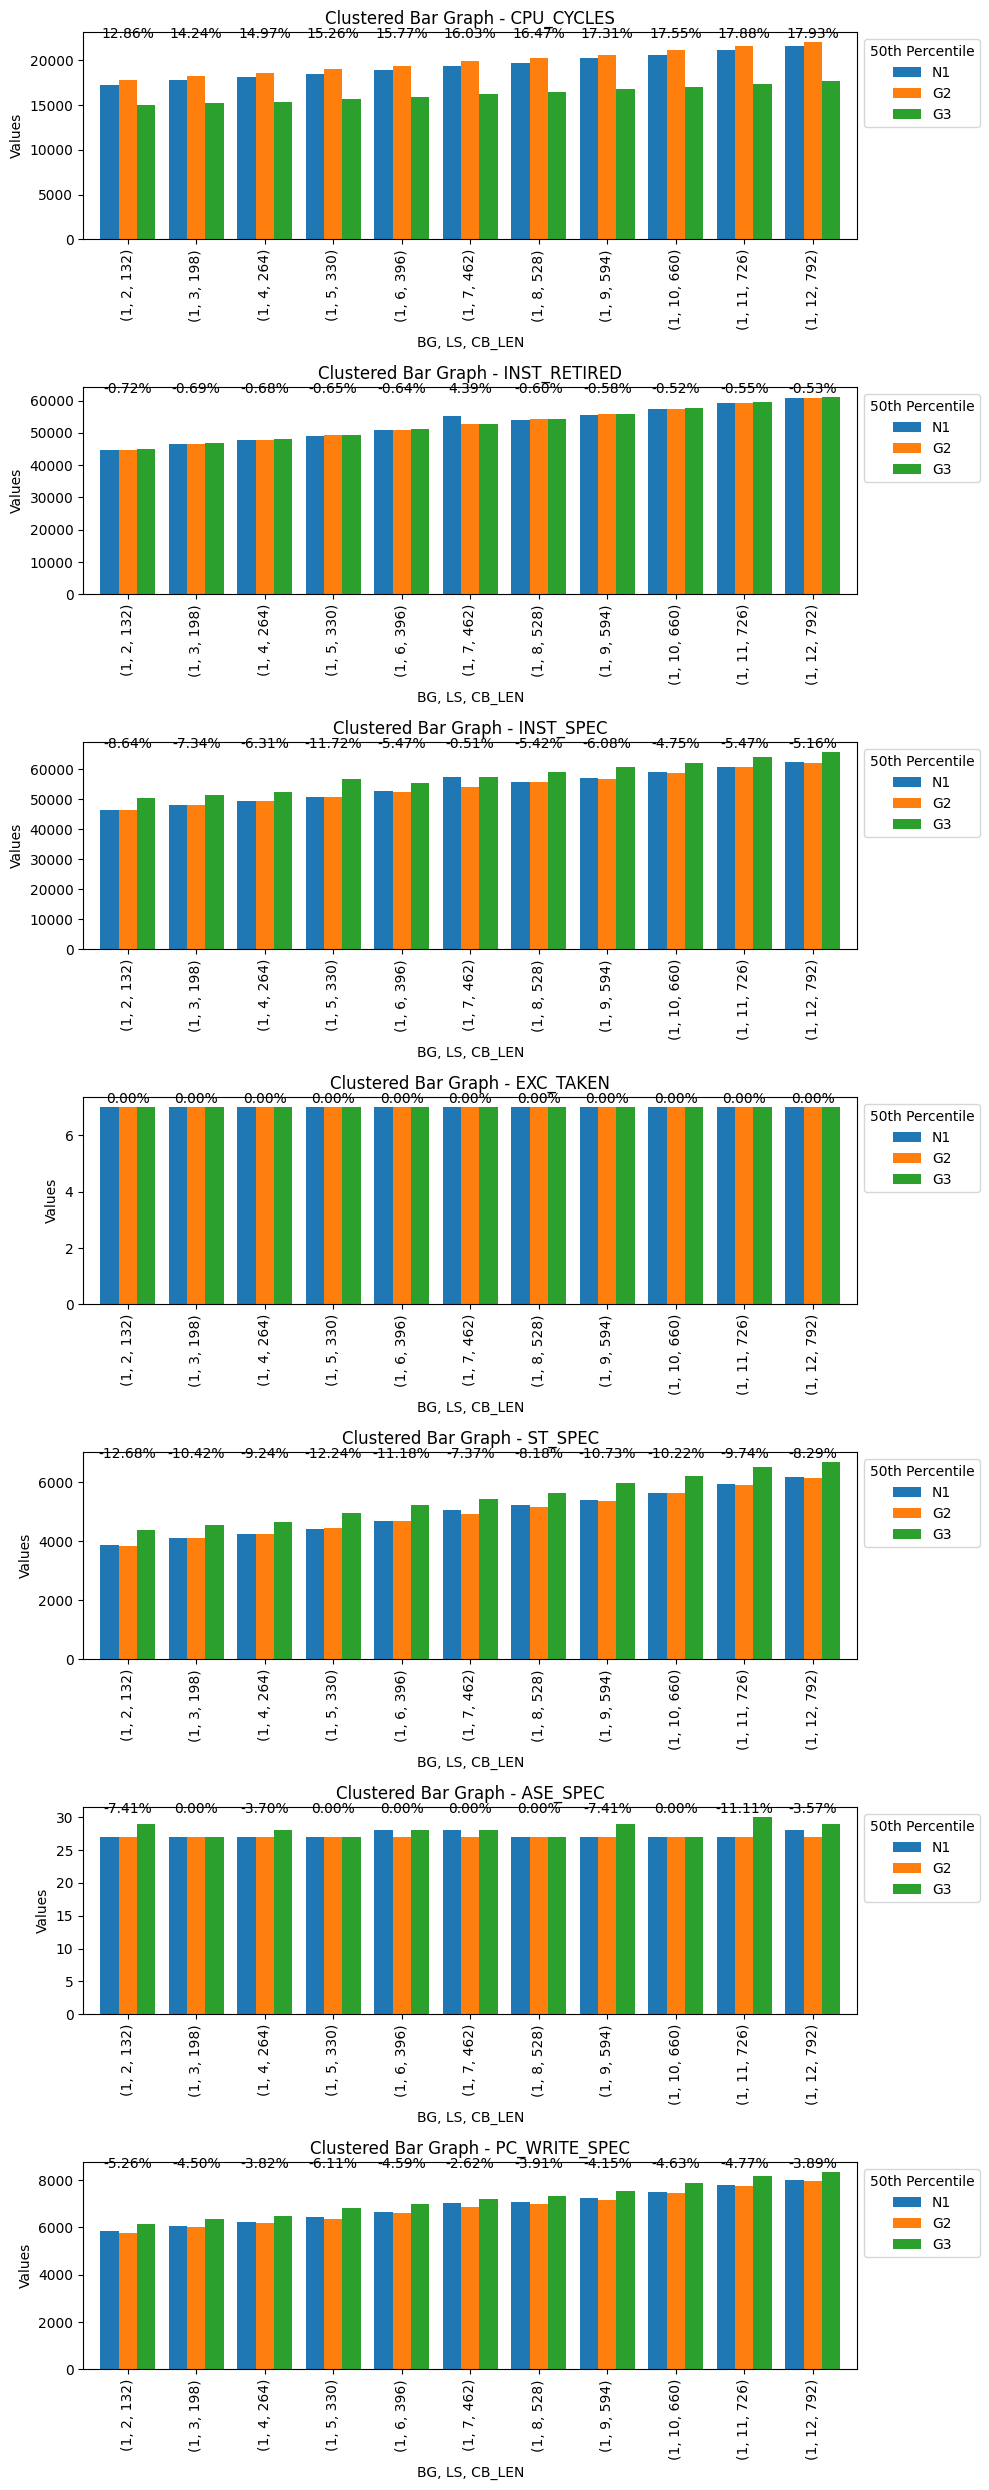

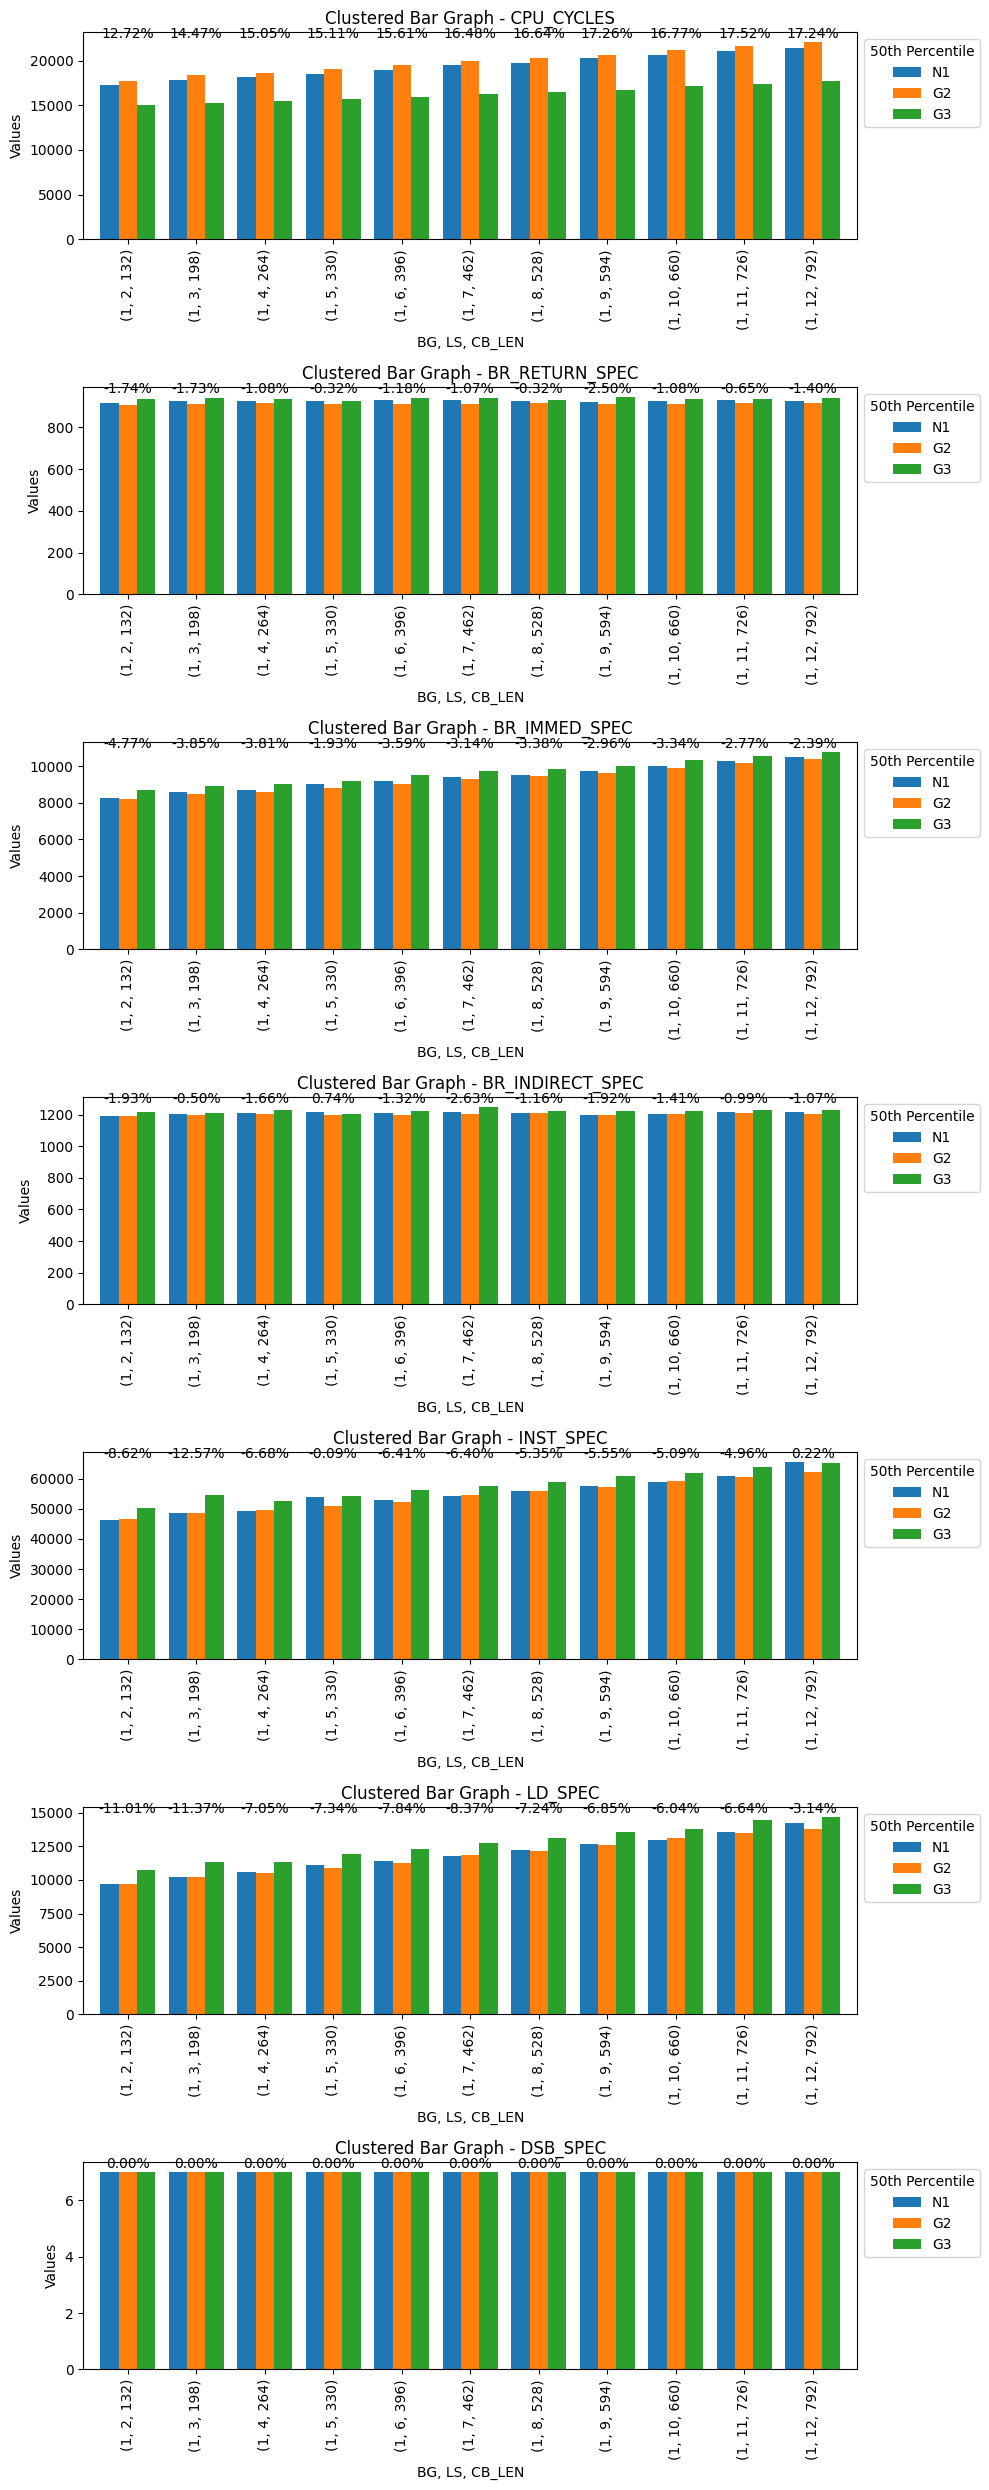

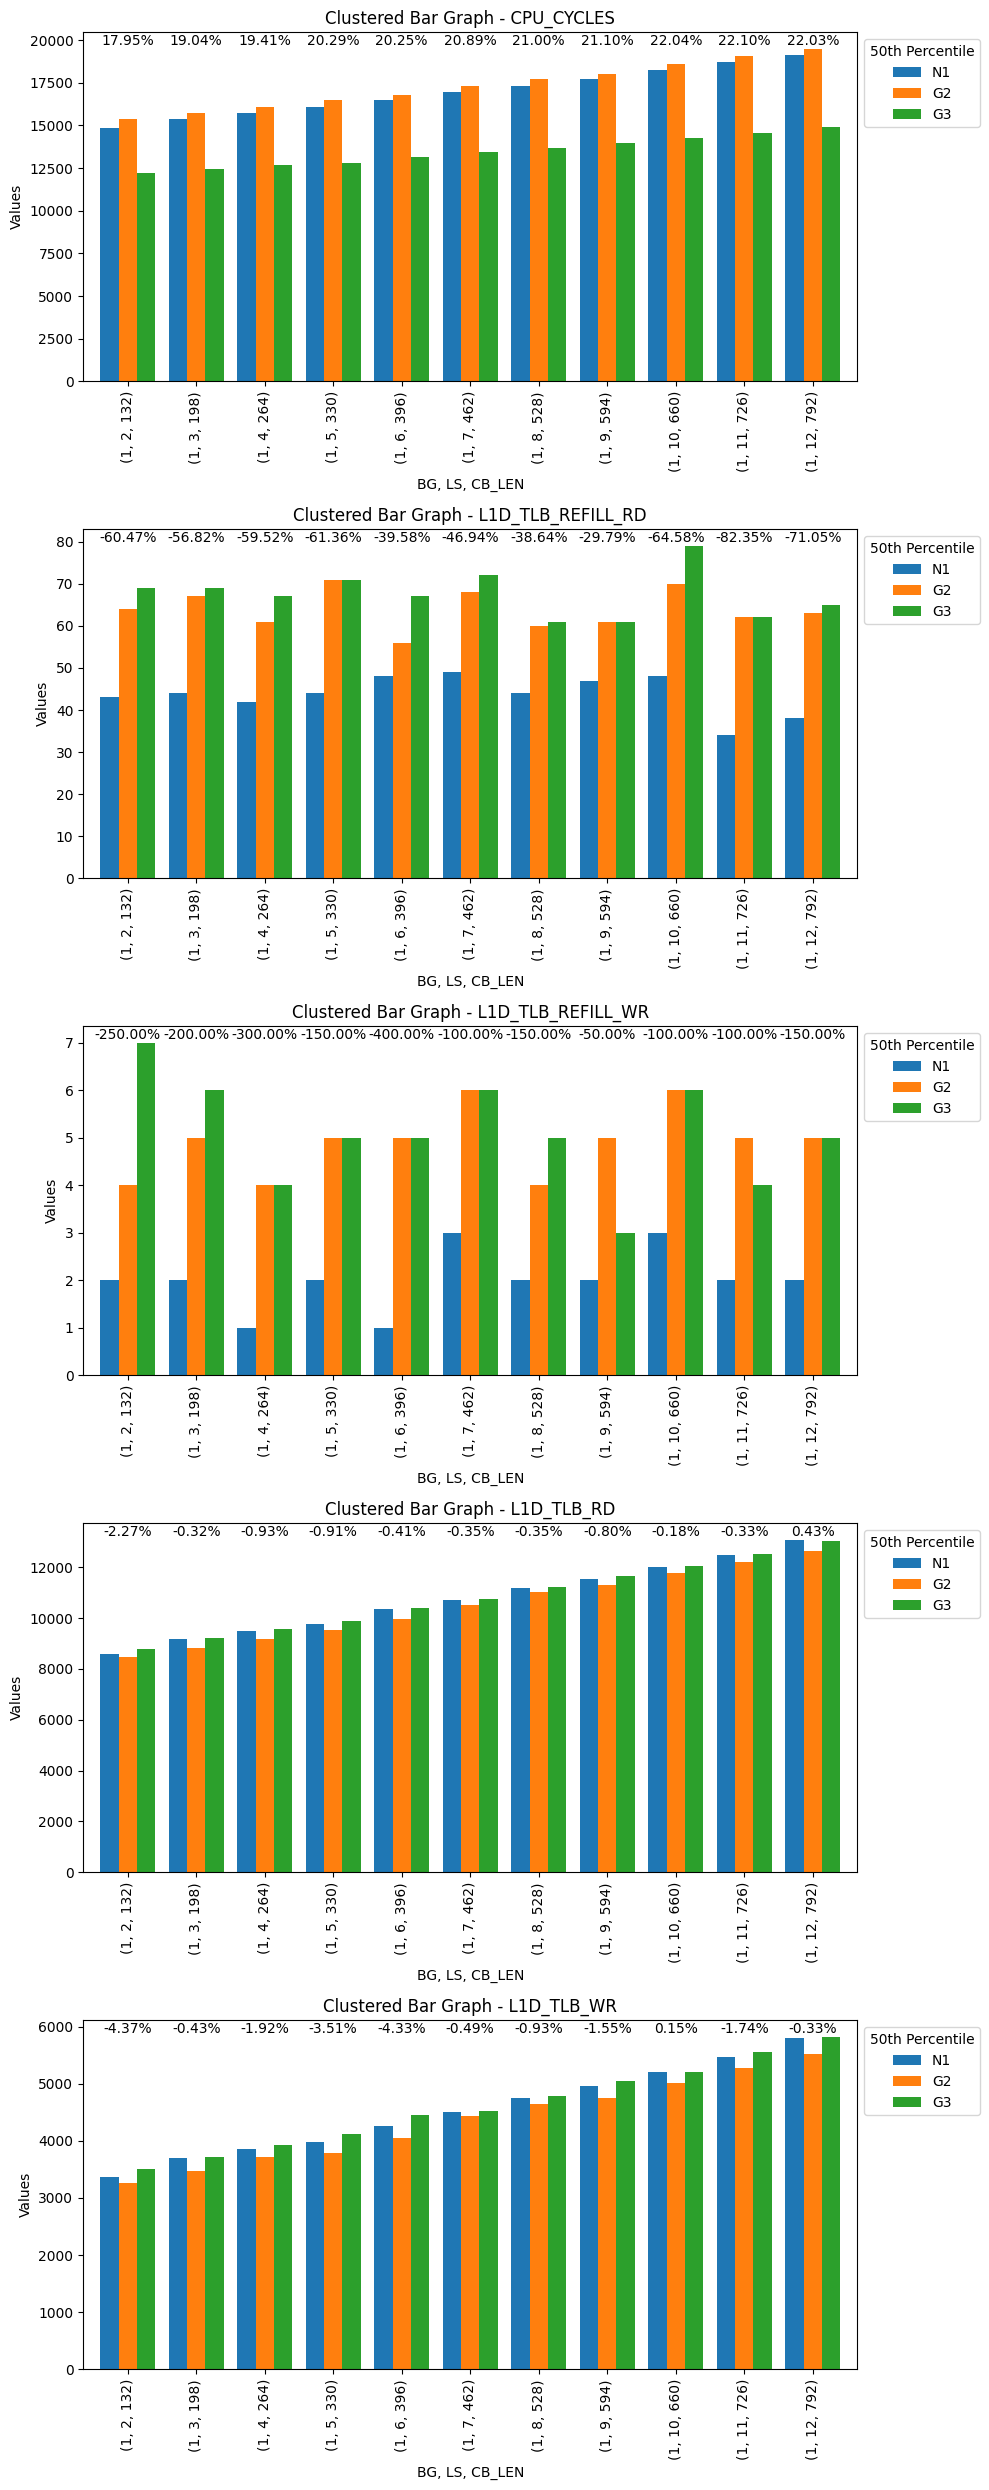

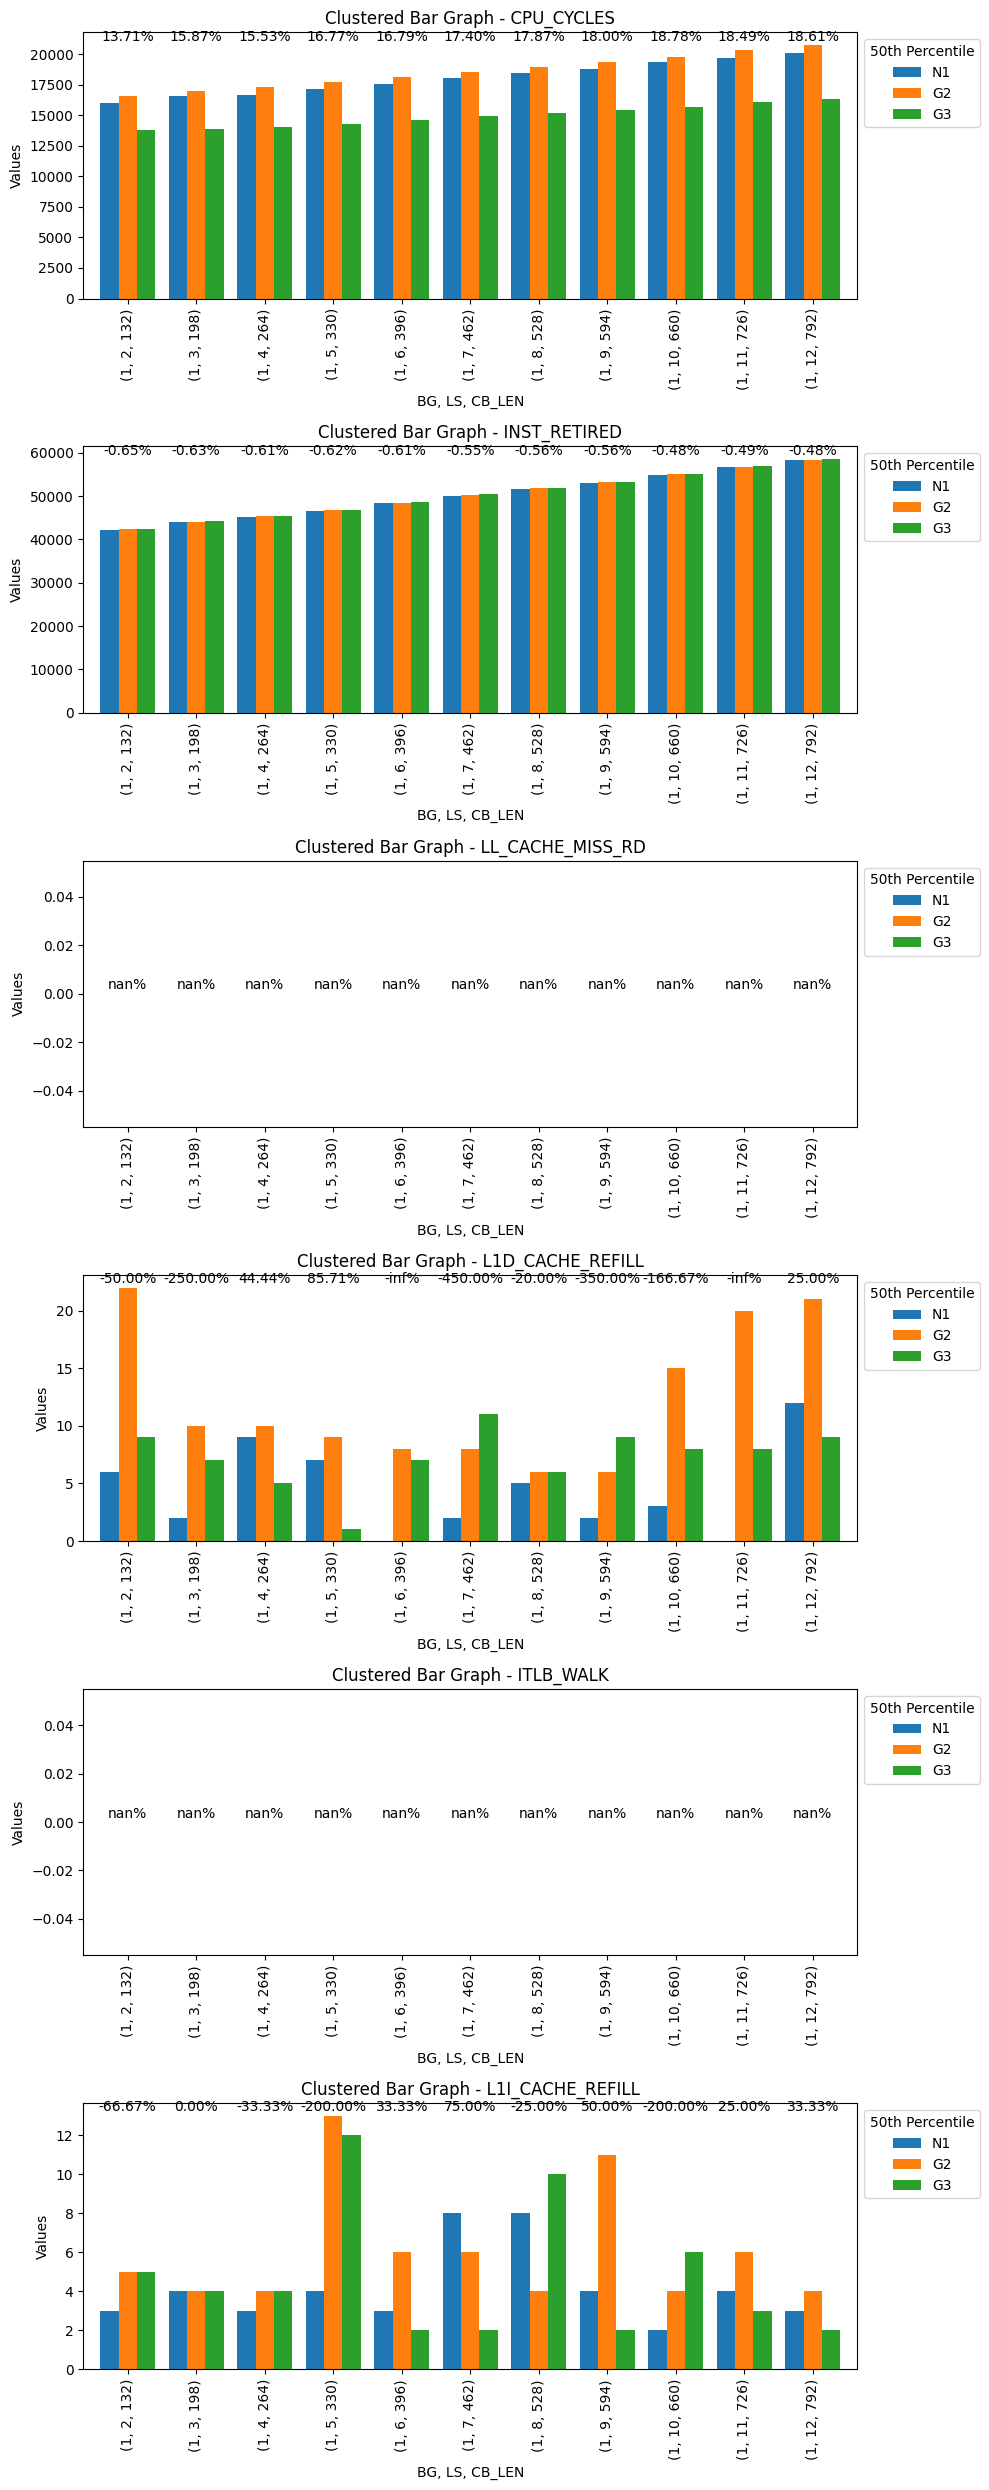

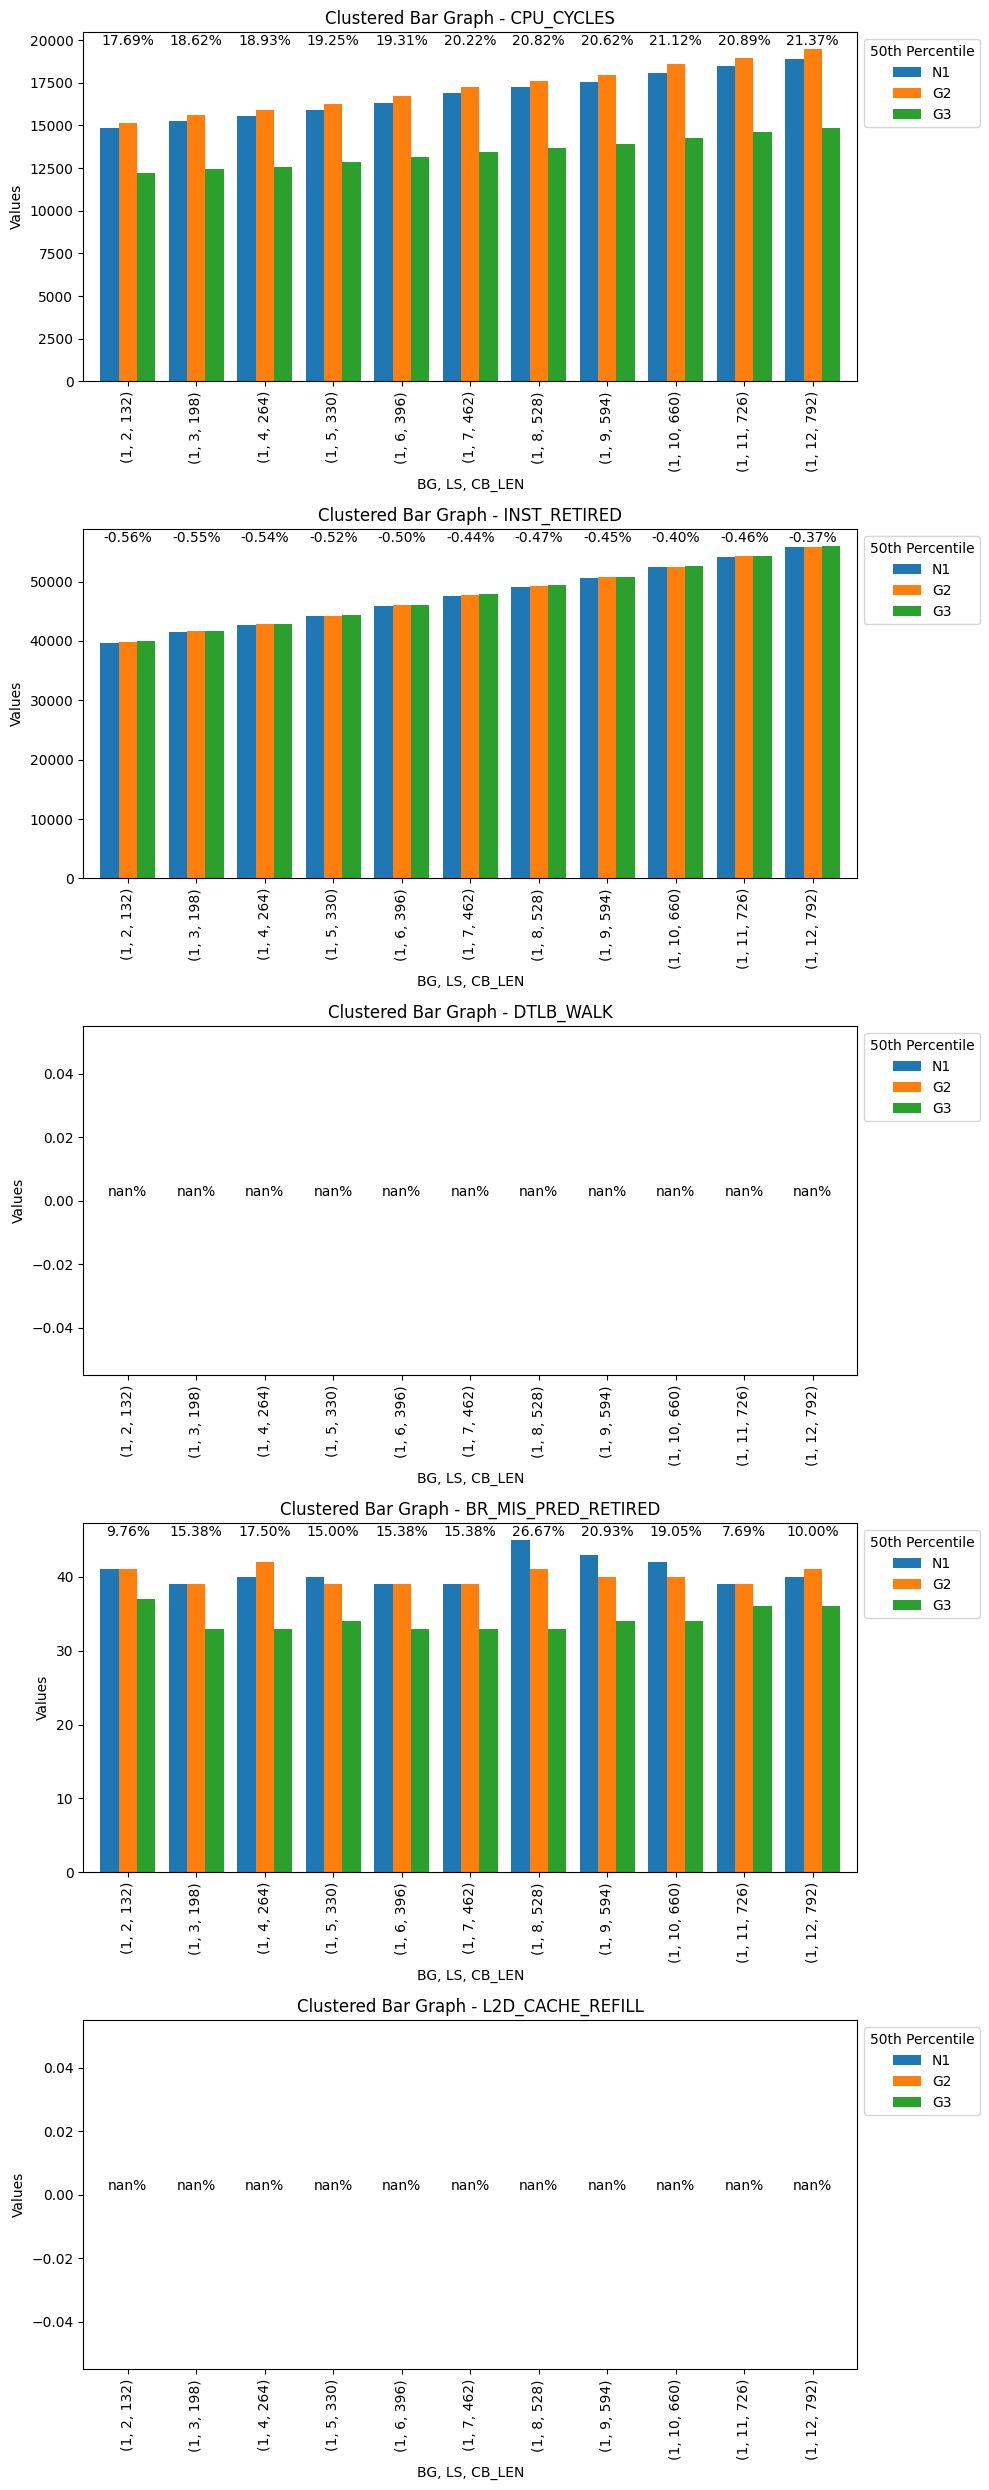

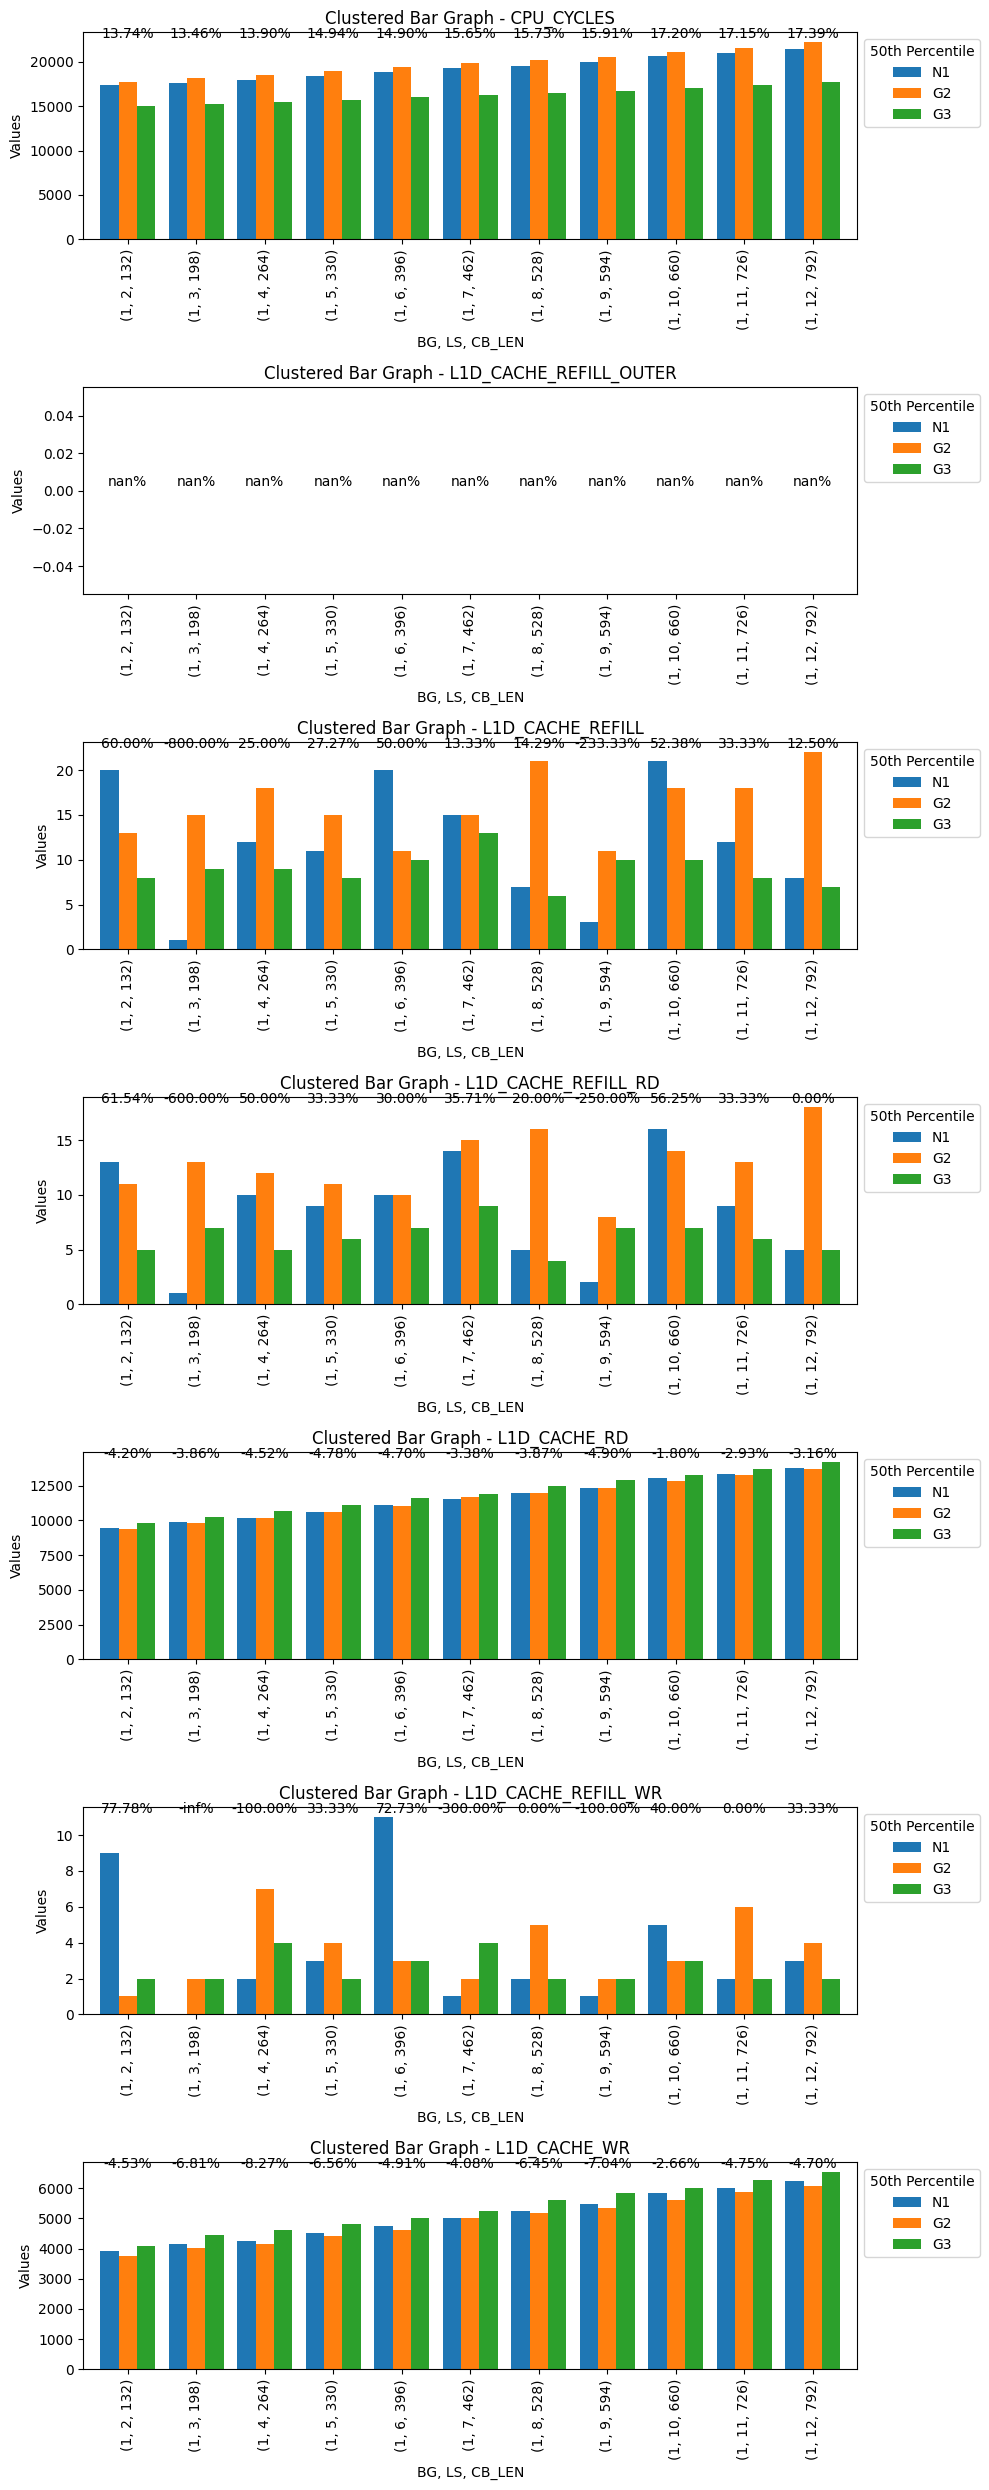

In [3]:
## LDPC Plots for 3 Processors
import pandas as pd
import matplotlib.pyplot as plt

def plot_clustered_bar(df, column, title, ax):
    """Plot a clustered bar graph for the specified column."""
    bar_plot = df.set_index(['BG', 'LS', 'CB_LEN'])[column].plot(kind='bar', ax=ax, width=0.8)
    legend_labels = ['N1', 'G2', 'G3']
    ax.legend(legend_labels, title='50th Percentile', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel('BG, LS, CB_LEN')
    ax.set_ylabel('Values')
    ax.set_title(title)
    
    n1_column = df.iloc[:, 3]
    g3_column = df.iloc[:, 5]

    percent_difference = ((n1_column - g3_column) / n1_column) * 100
    for i in range(11): # 11 because we are considering 11 rows of data
        max_height = max(bar_plot.patches, key=lambda x: x.get_height()).get_height()

        ax.annotate(f'{percent_difference[i]:.2f}%', 
            xy=(i, max_height), 
            xytext=(0, 1),  # Offset of the annotation from the top of the bar
            textcoords="offset points",
            ha='center', va='bottom', 
            fontsize=10,
            color='black')

# Define the base directory paths for each bundle type
n1_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N1/'
#n2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/N2/'
g2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G2/'
g3_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/'

# Define the base file name patterns for each bundle type
base_filename = 'bundle{}.csv'

# Initialize empty lists to store DataFrames for each bundle
n1dfs = []
#n2dfs = []
g2dfs = []
g3dfs = []
merged_dfs = []
bundles_cols = []

dfp = pd.read_csv('/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/G3/percentiles_0.csv', nrows=11)  # Assuming you want to read lines 1 to 11
dfp_subset = dfp[['BG', 'LS', 'CB_LEN']]

for bundle_num in range(15):
    # Construct the file paths for the current bundle in each directory
    n1_filename = n1_base_dir + base_filename.format(bundle_num)
    #n2_filename = n2_base_dir + base_filename.format(bundle_num)
    g2_filename = g2_base_dir + base_filename.format(bundle_num)
    g3_filename = g3_base_dir + base_filename.format(bundle_num)
    
    # Read the CSV files for the current bundle
    n1_df = pd.read_csv(n1_filename, nrows=11)  # Assuming you want to read lines 1 to 11
    #n2_df = pd.read_csv(n2_filename, nrows=11)
    g2_df = pd.read_csv(g2_filename, nrows=11)
    g3_df = pd.read_csv(g3_filename, nrows=11)
    
    # Append DataFrames to the appropriate list
    n1dfs.append(n1_df)
    #n2dfs.append(n2_df)
    g2dfs.append(g2_df)
    g3dfs.append(g3_df)
    
    n1_df.columns = n1_df.columns.str.strip()
    bundles_cols.append(n1_df.columns)
    # Concatenate DataFrames
    merged_df = pd.concat([dfp_subset, n1_df, g2_df, g3_df], axis=1)
    
    # Append the merged DataFrame to the list
    merged_dfs.append(merged_df)

# Iterate over each bundle's DataFrame
for bundle_num, merged_df in enumerate(merged_dfs):
    # Get the list of columns for the current bundle
    bundle_cols = bundles_cols[bundle_num]
   
    fig, axs = plt.subplots(len(bundle_cols), 1, figsize=(10, 25))  # Adjust the figsize as needed
    # Iterate over each column for plotting
    for i, column in enumerate(bundle_cols):
        # Plot clustered bar graph for the current column
        plot_clustered_bar(pd.concat([dfp_subset, merged_df[column]], axis=1), column, f'Clustered Bar Graph - {column}', axs[i])

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f'/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/LDPC_BUNDLES/bundle{bundle_num}.pdf')
    # Show the plot
    plt.show()

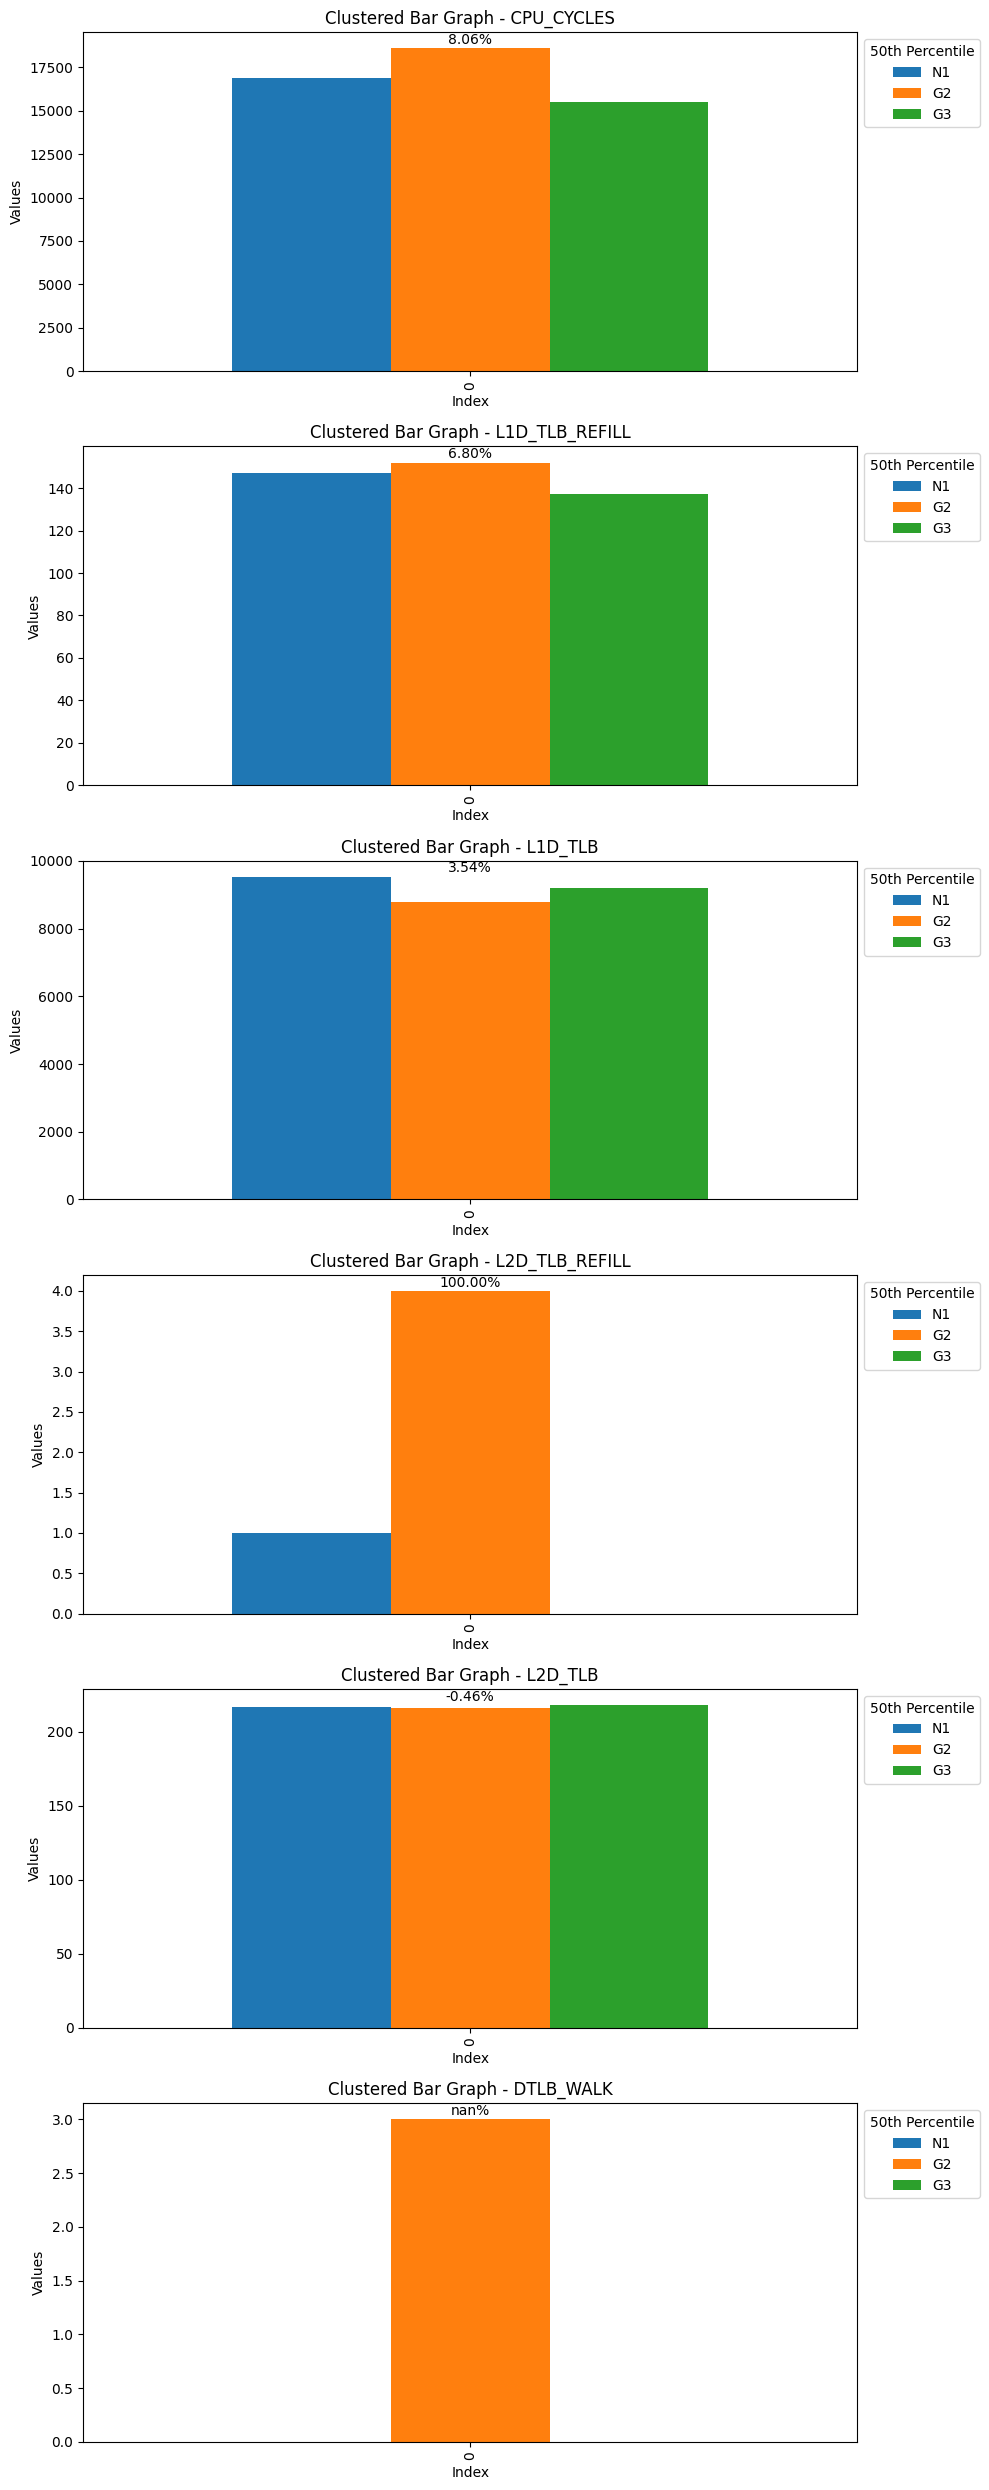

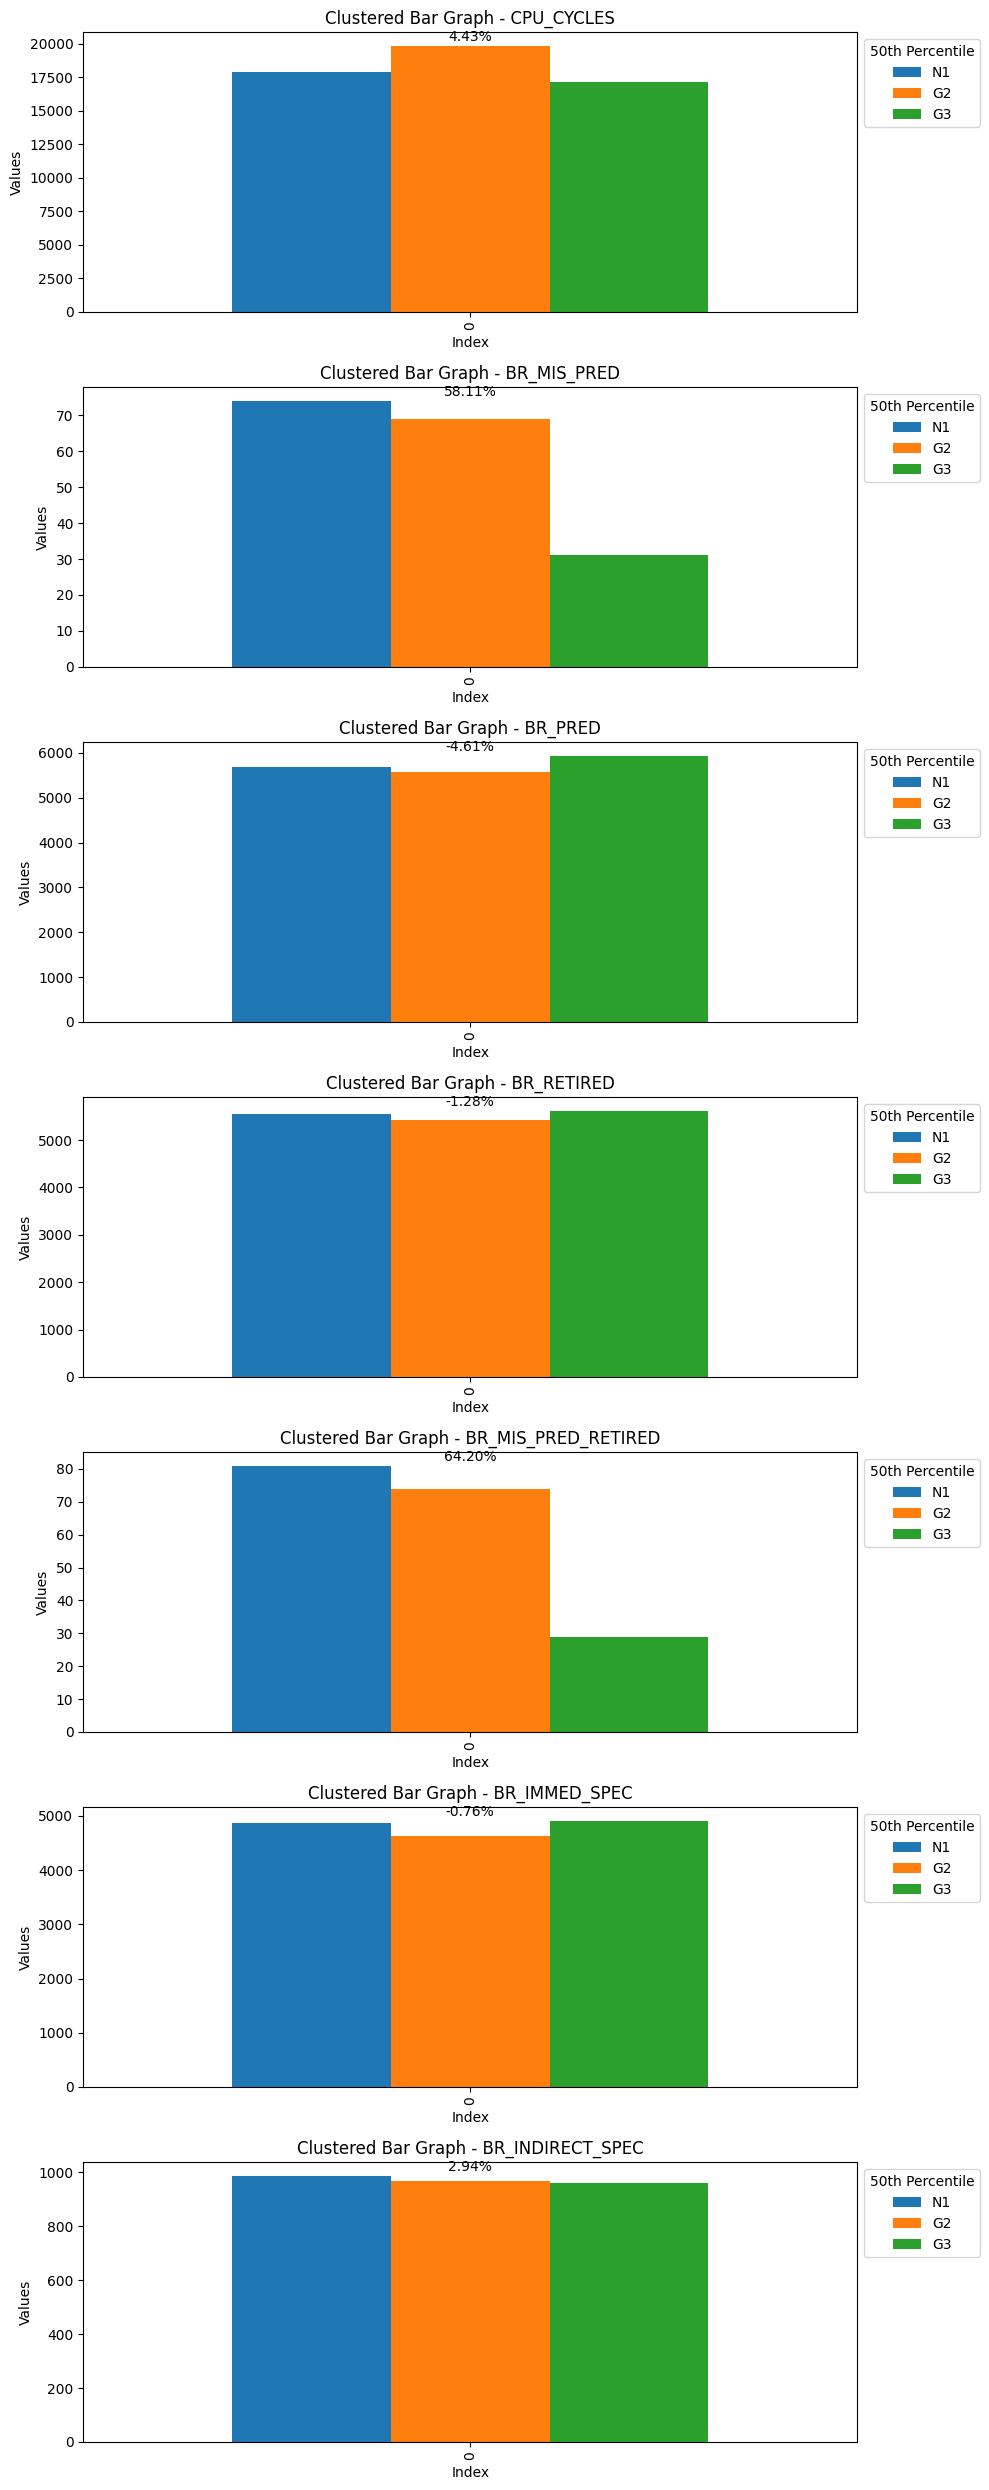

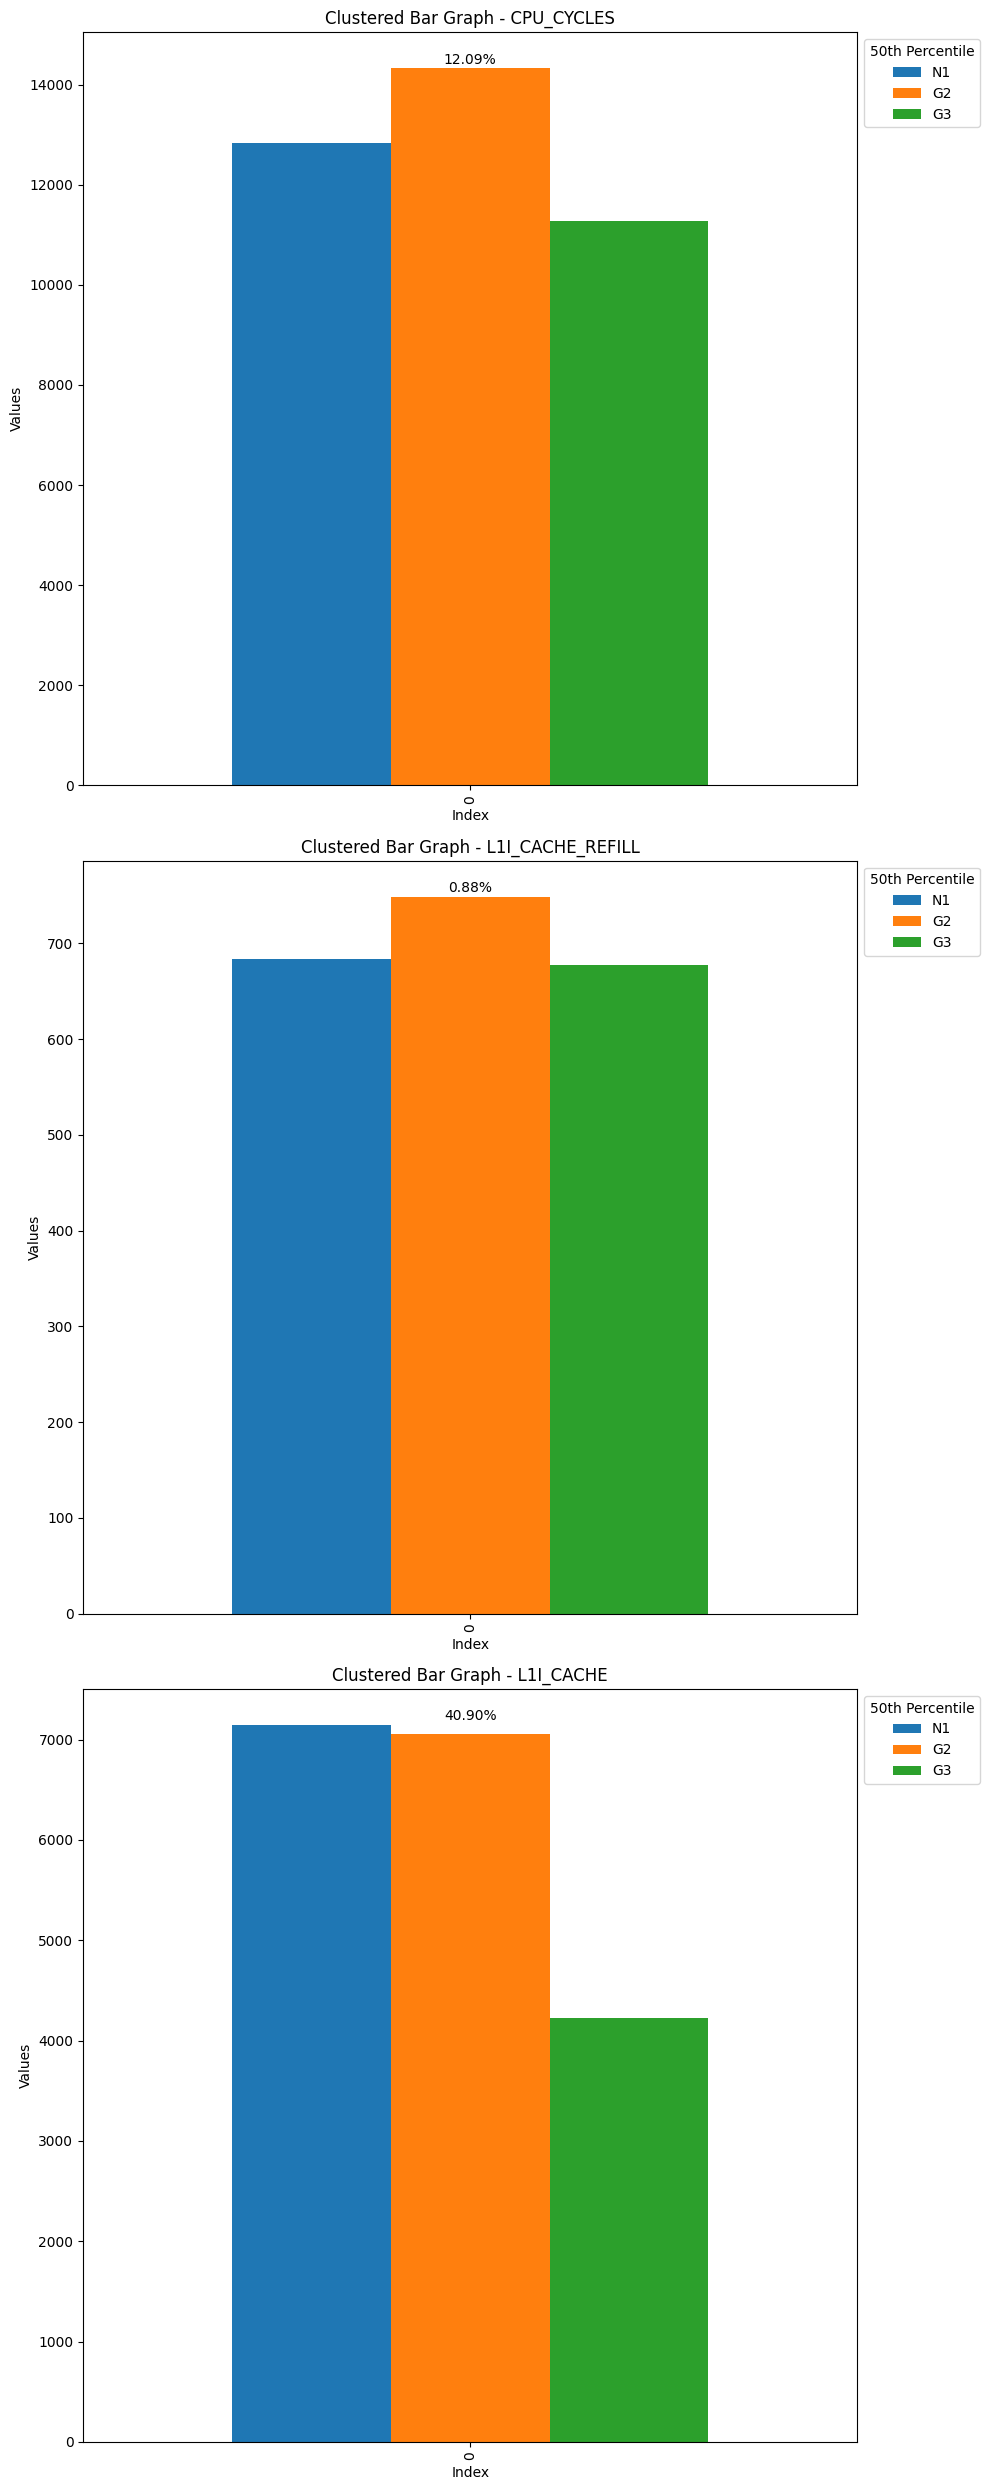

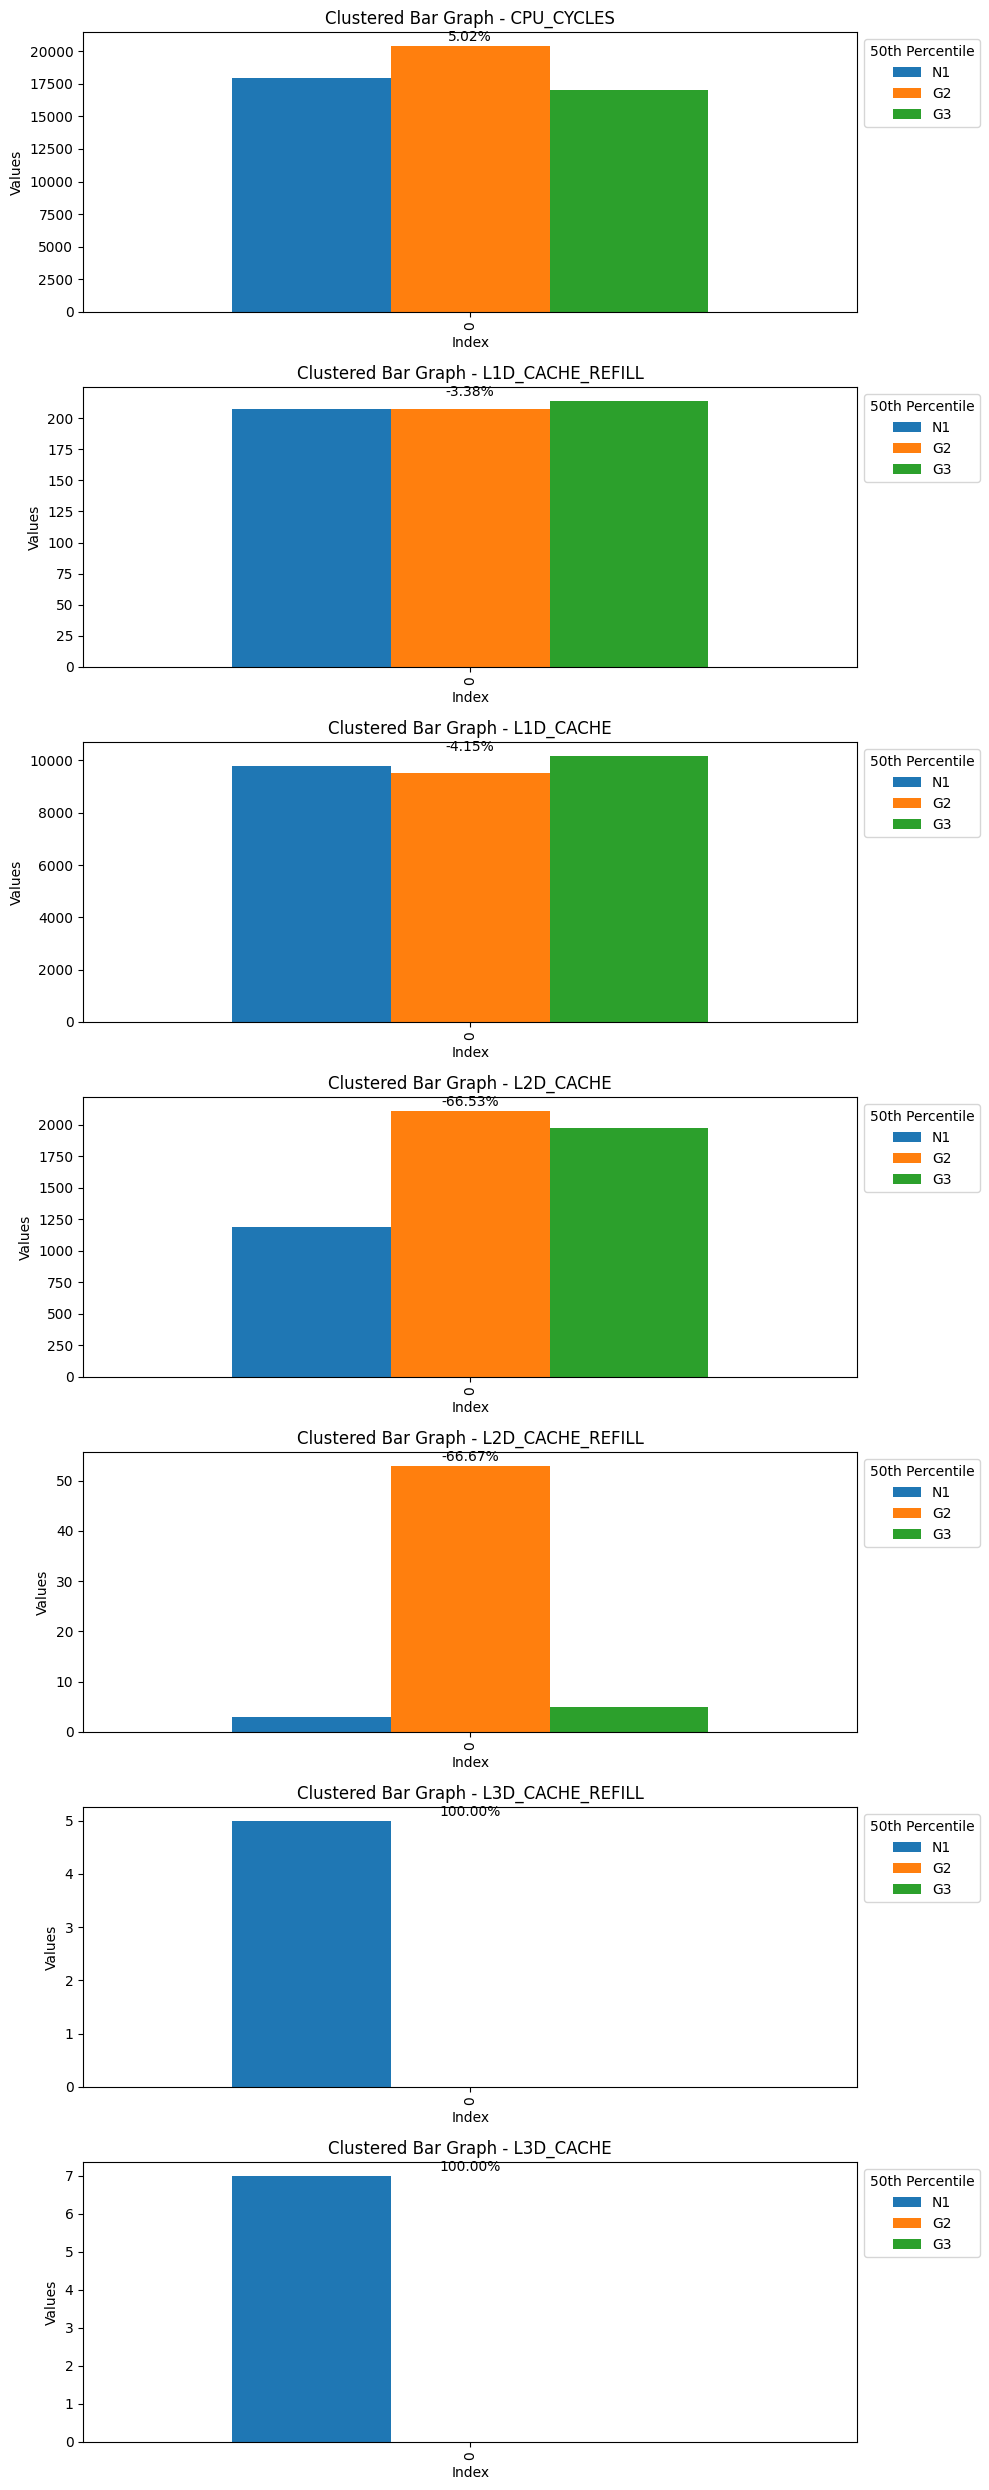

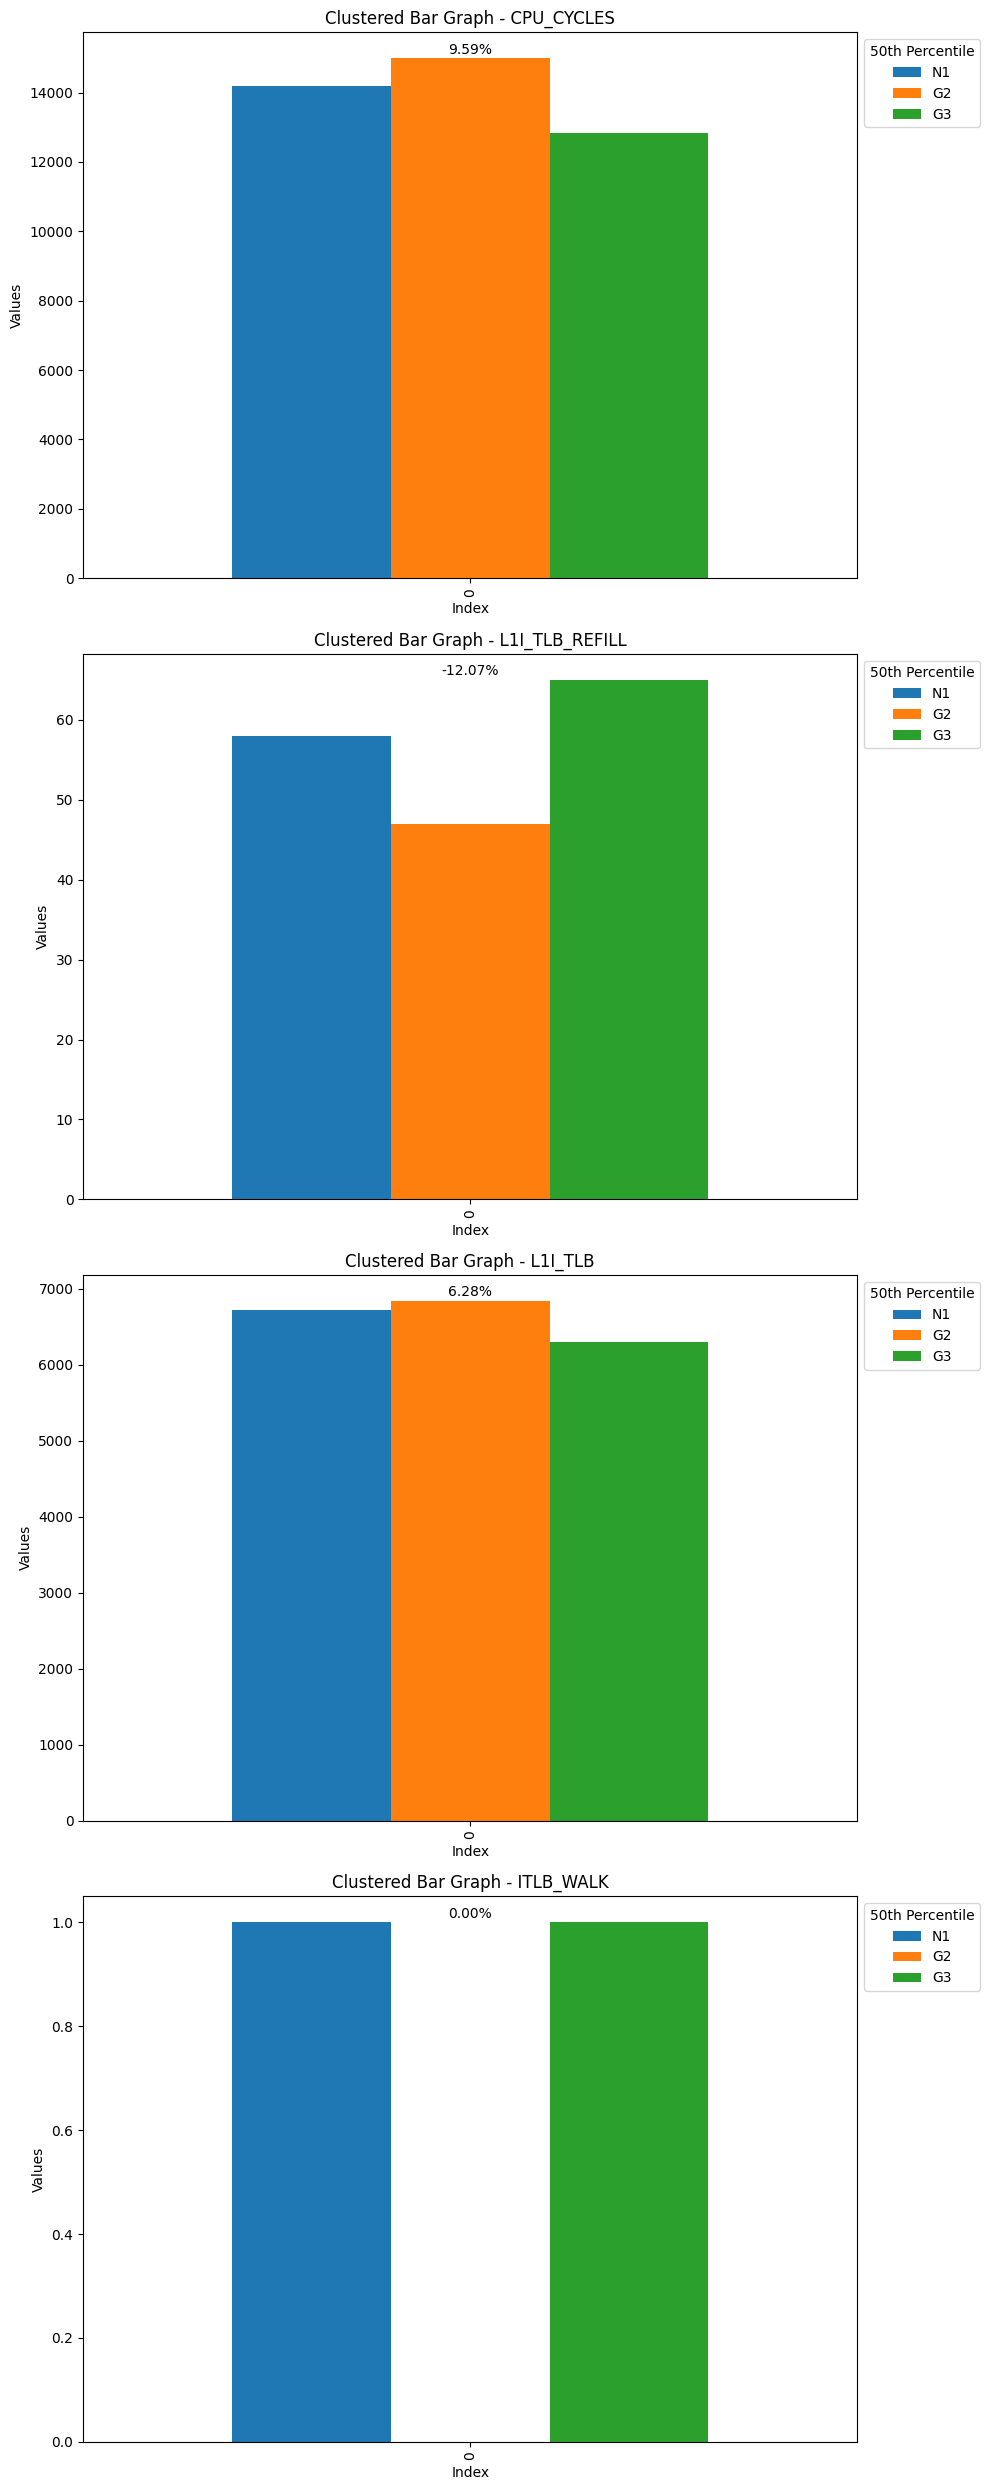

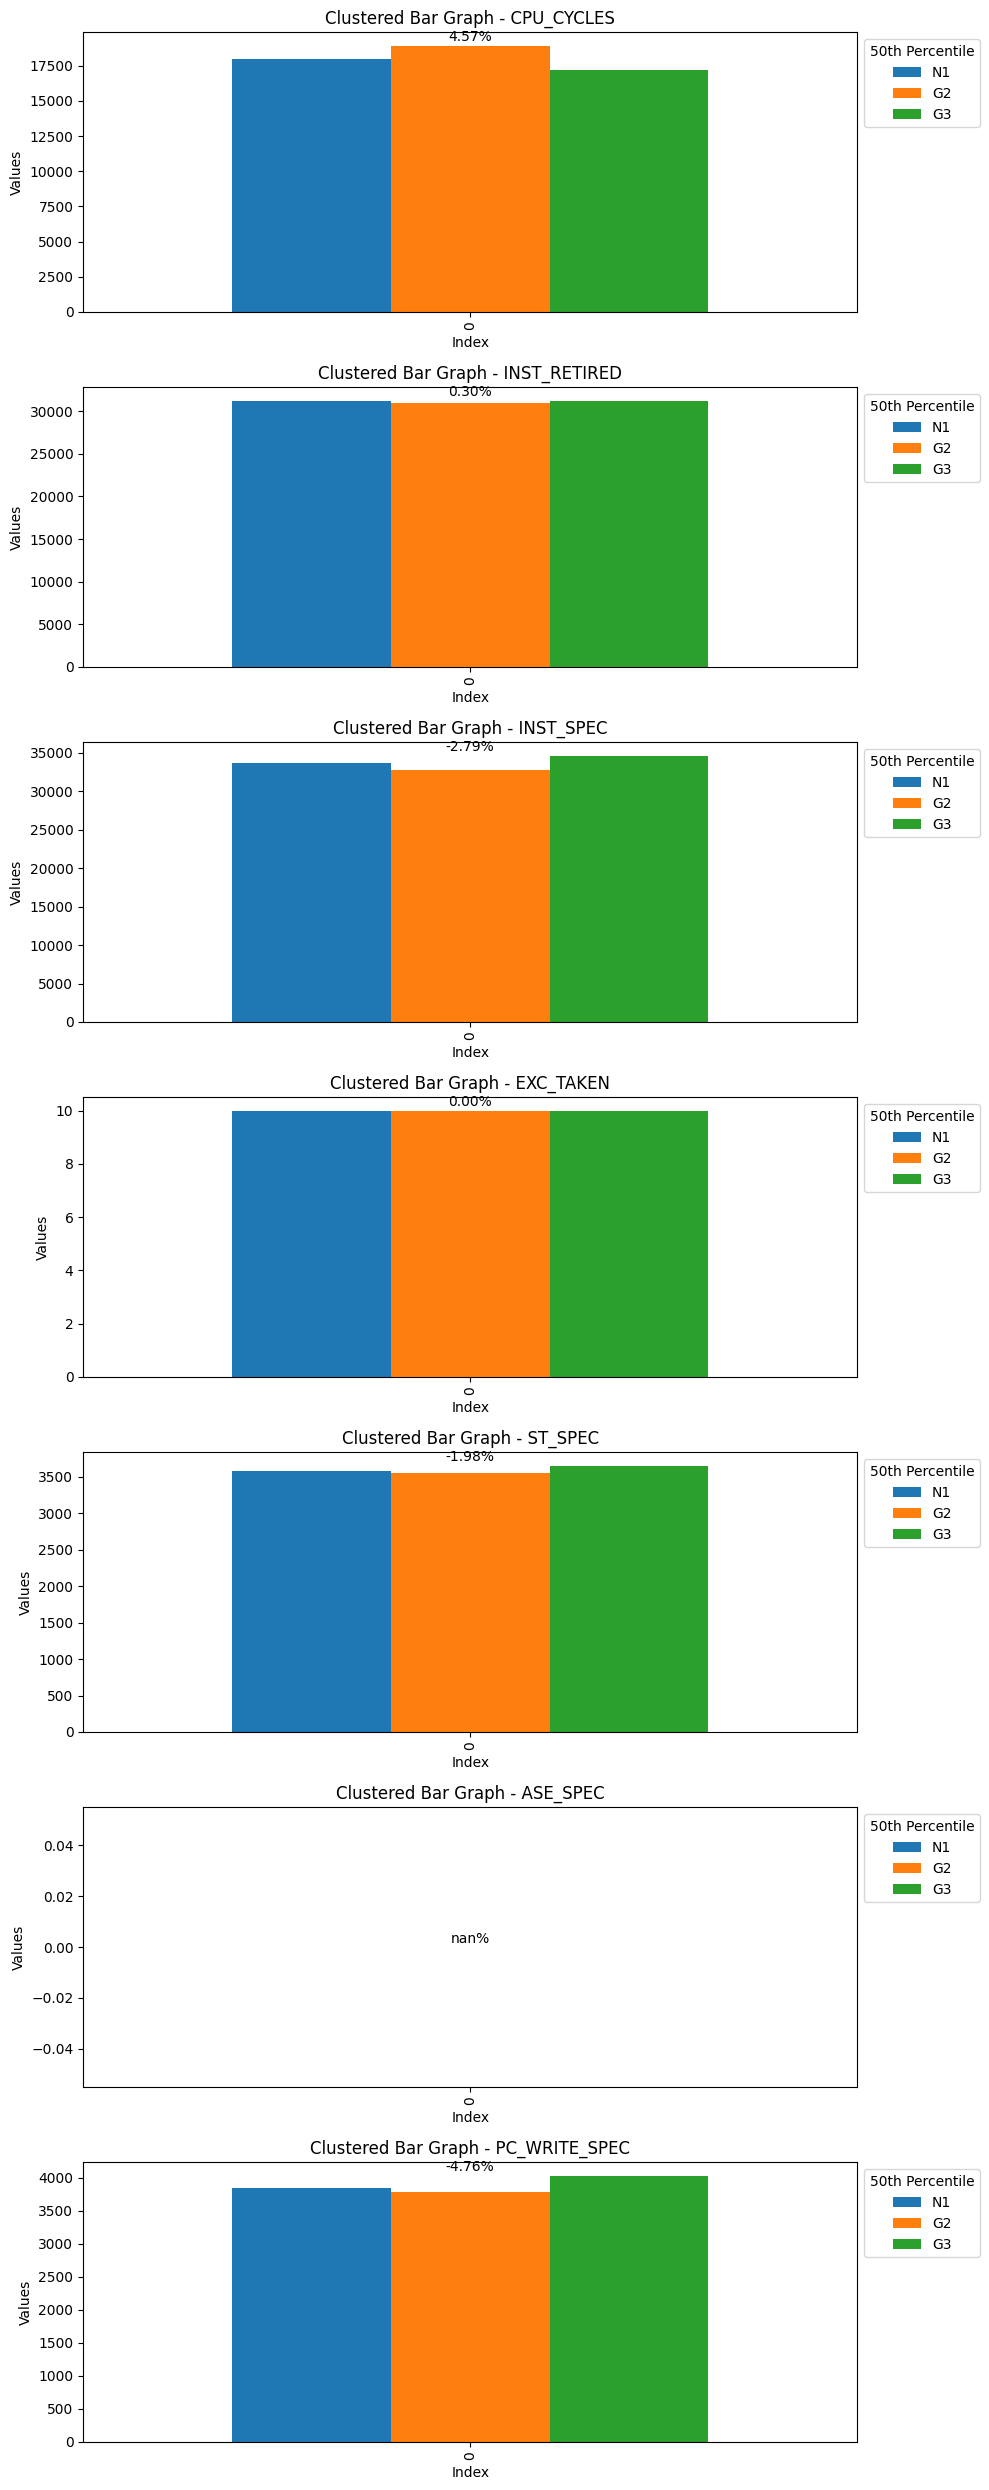

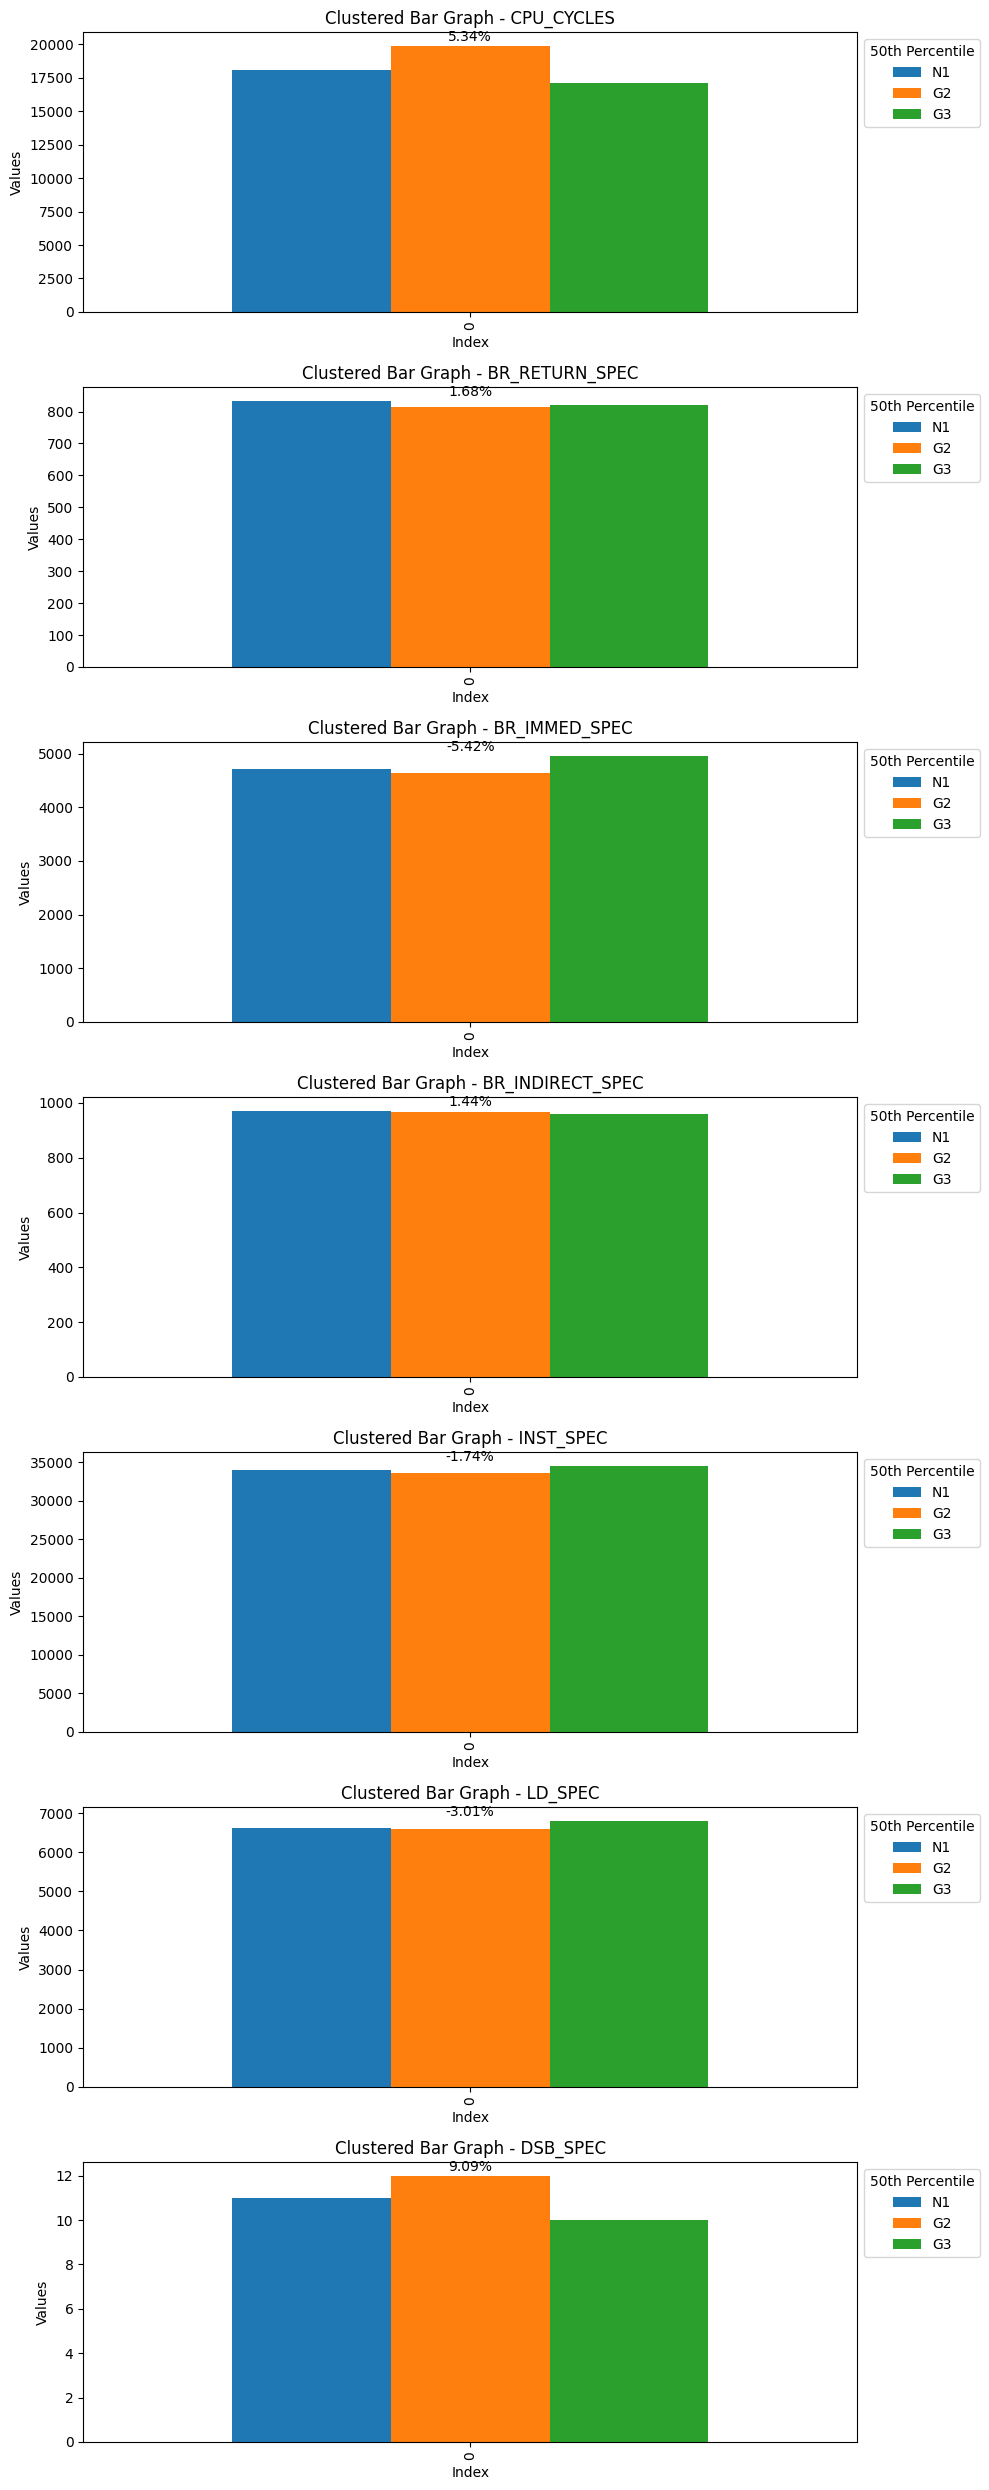

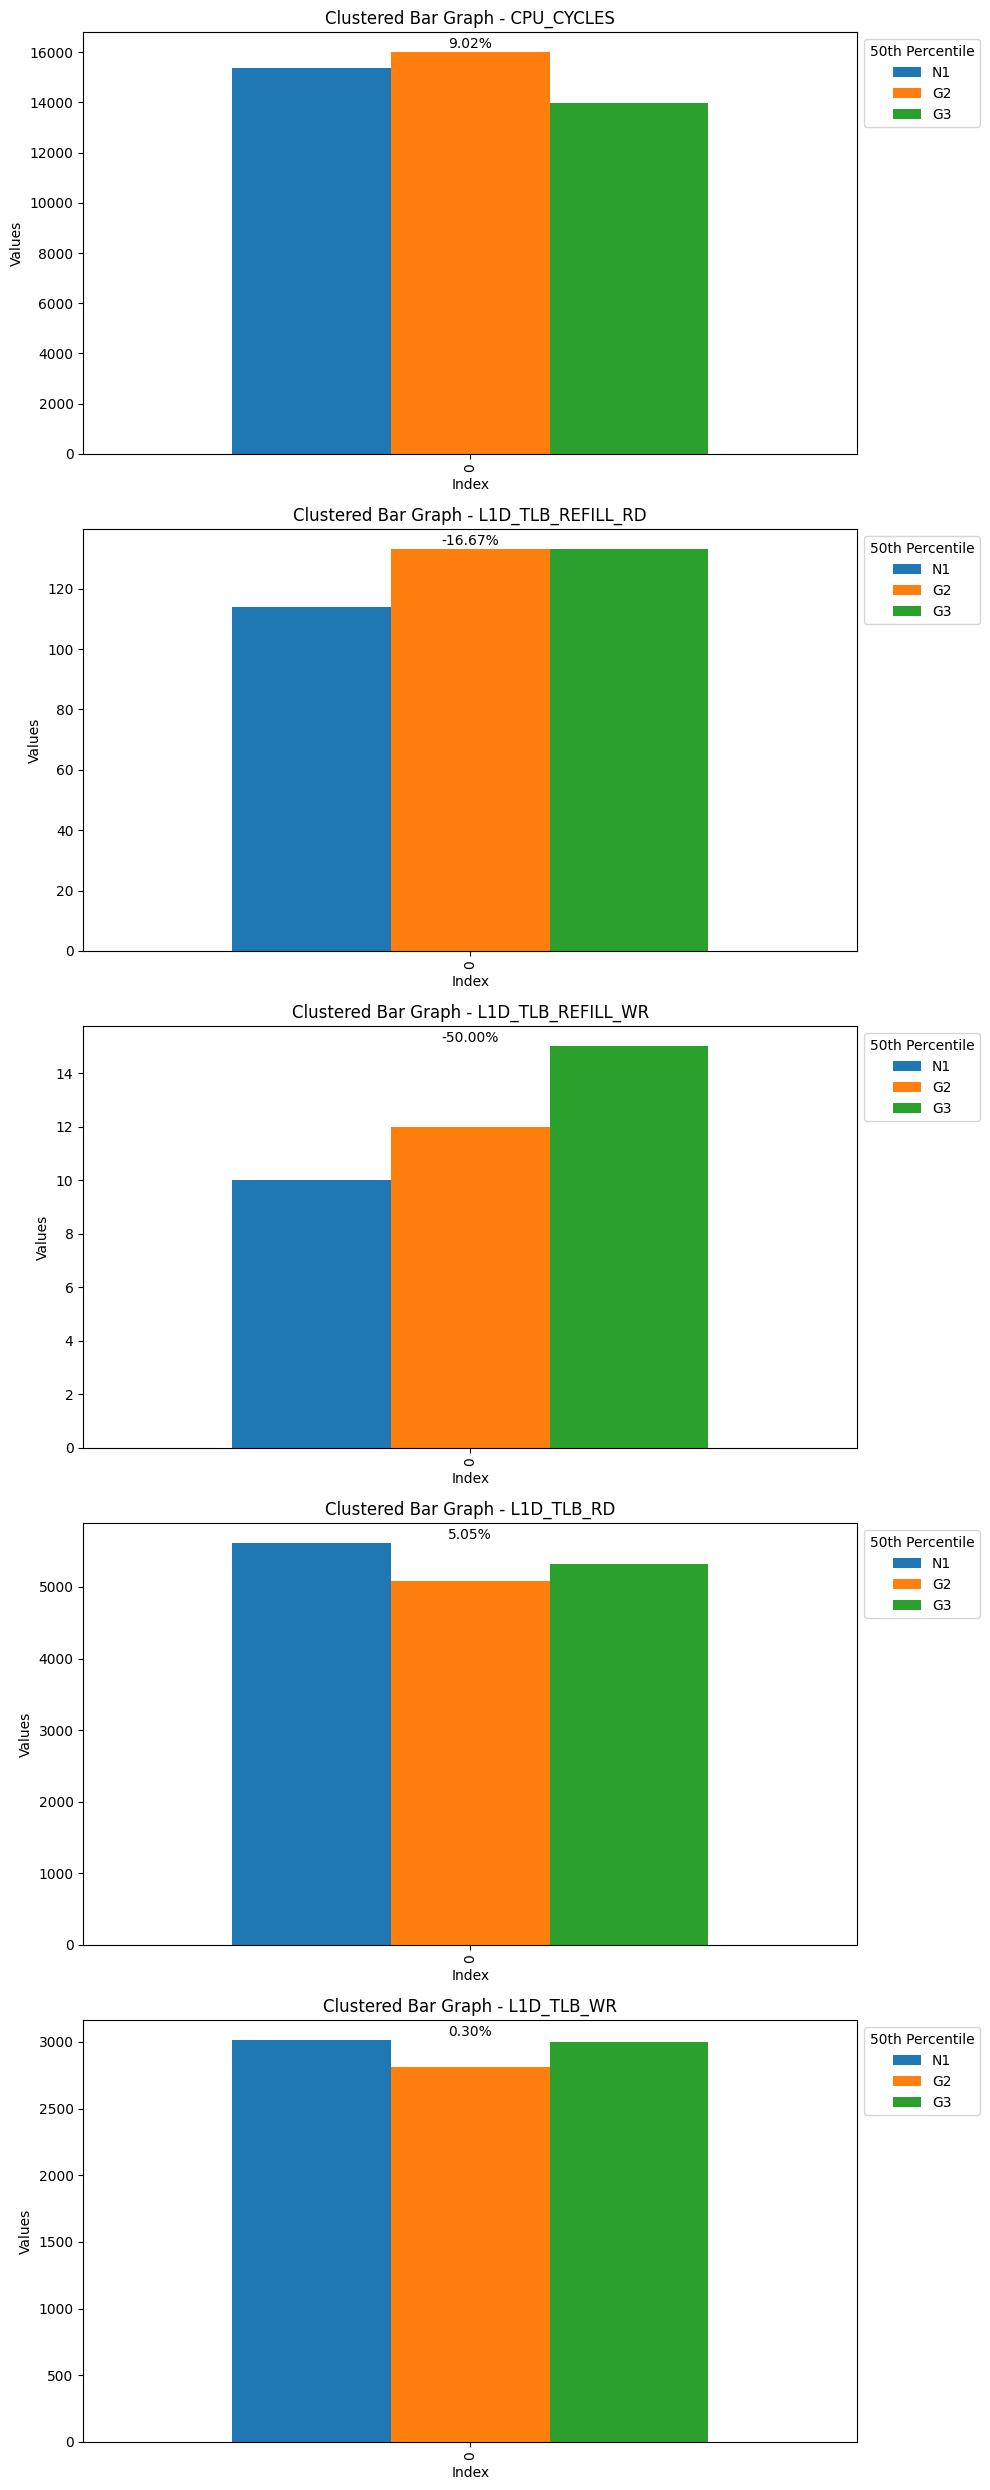

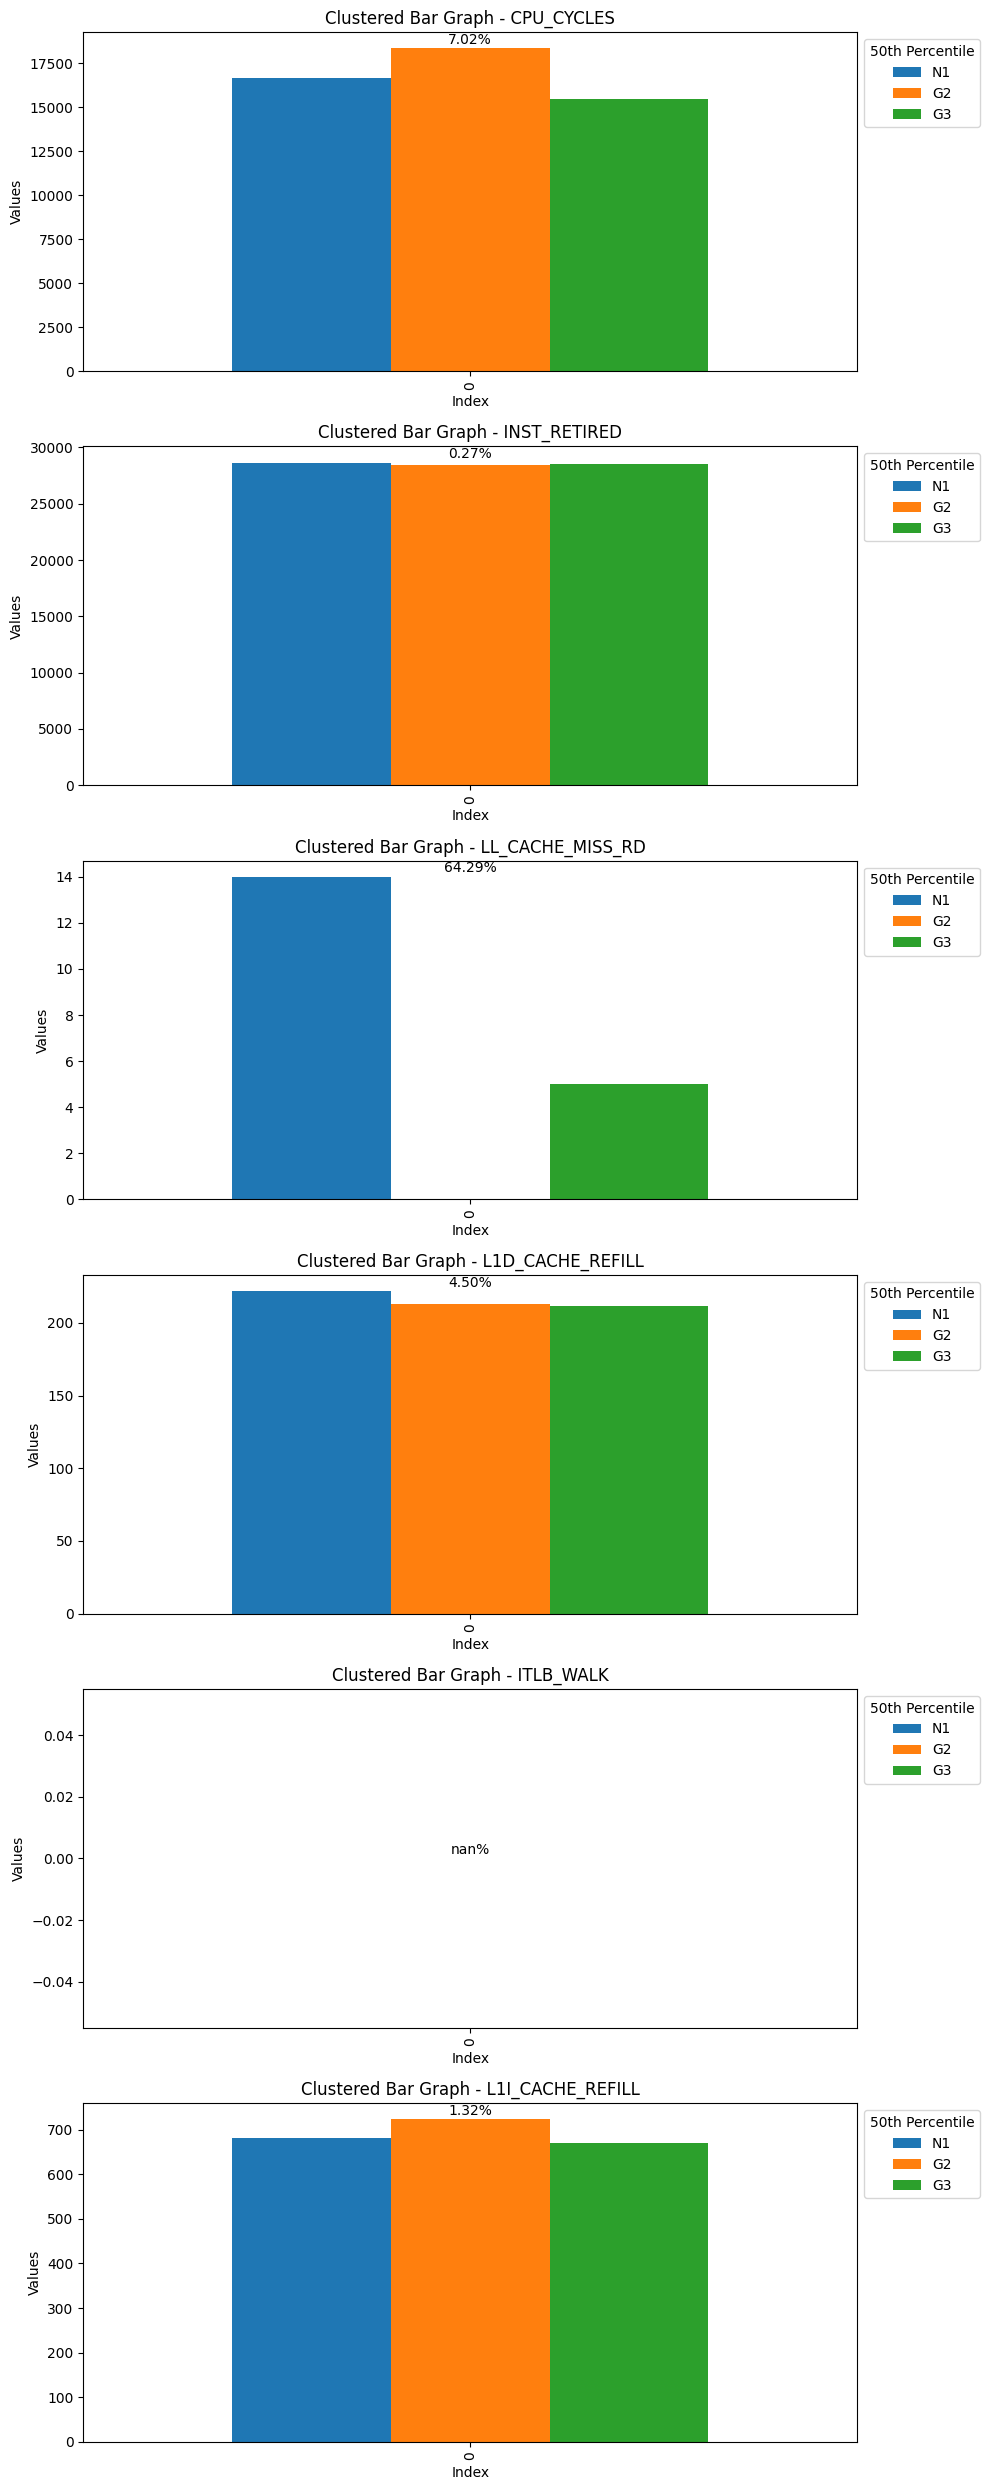

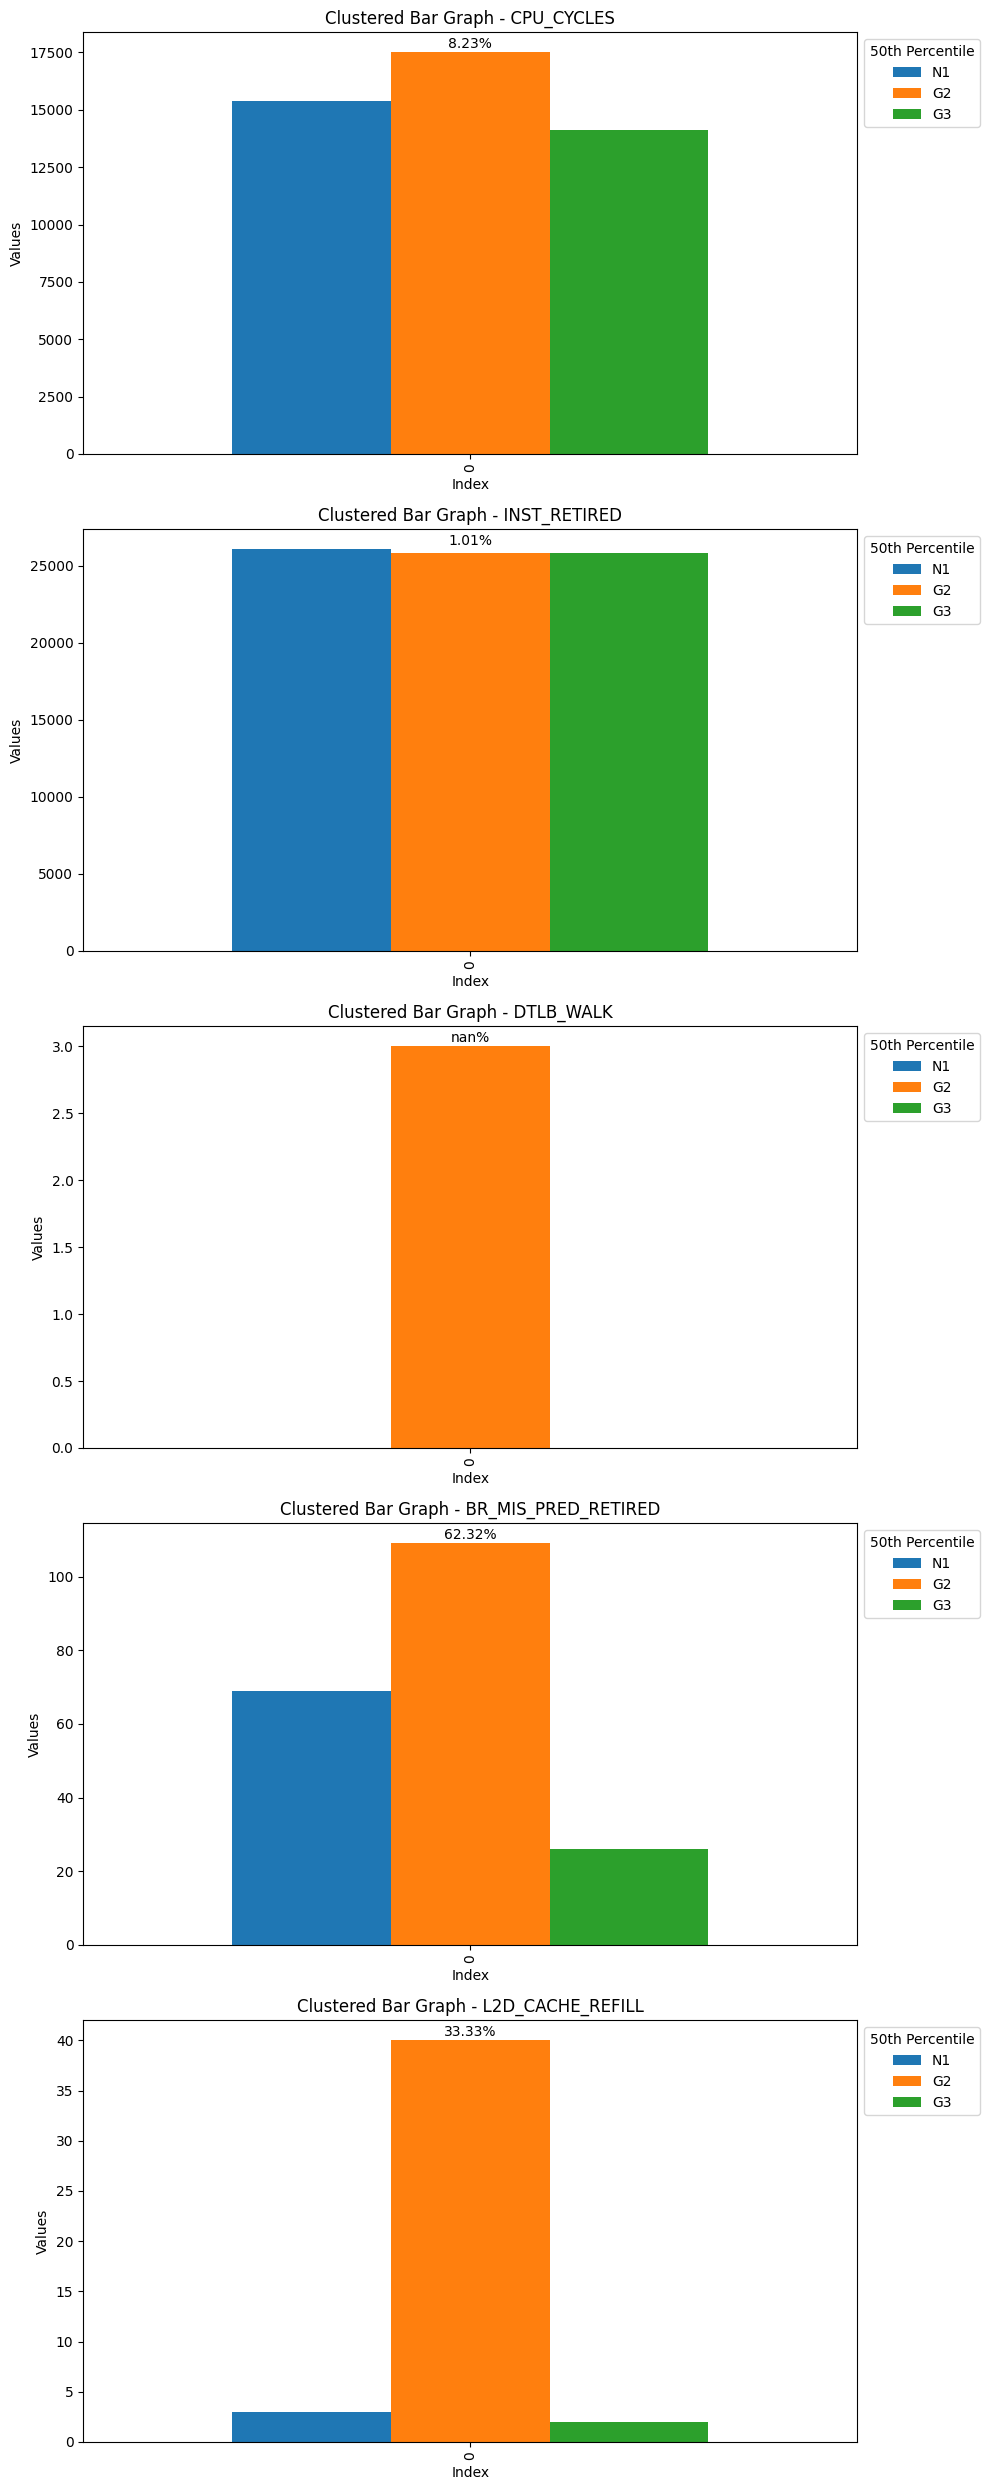

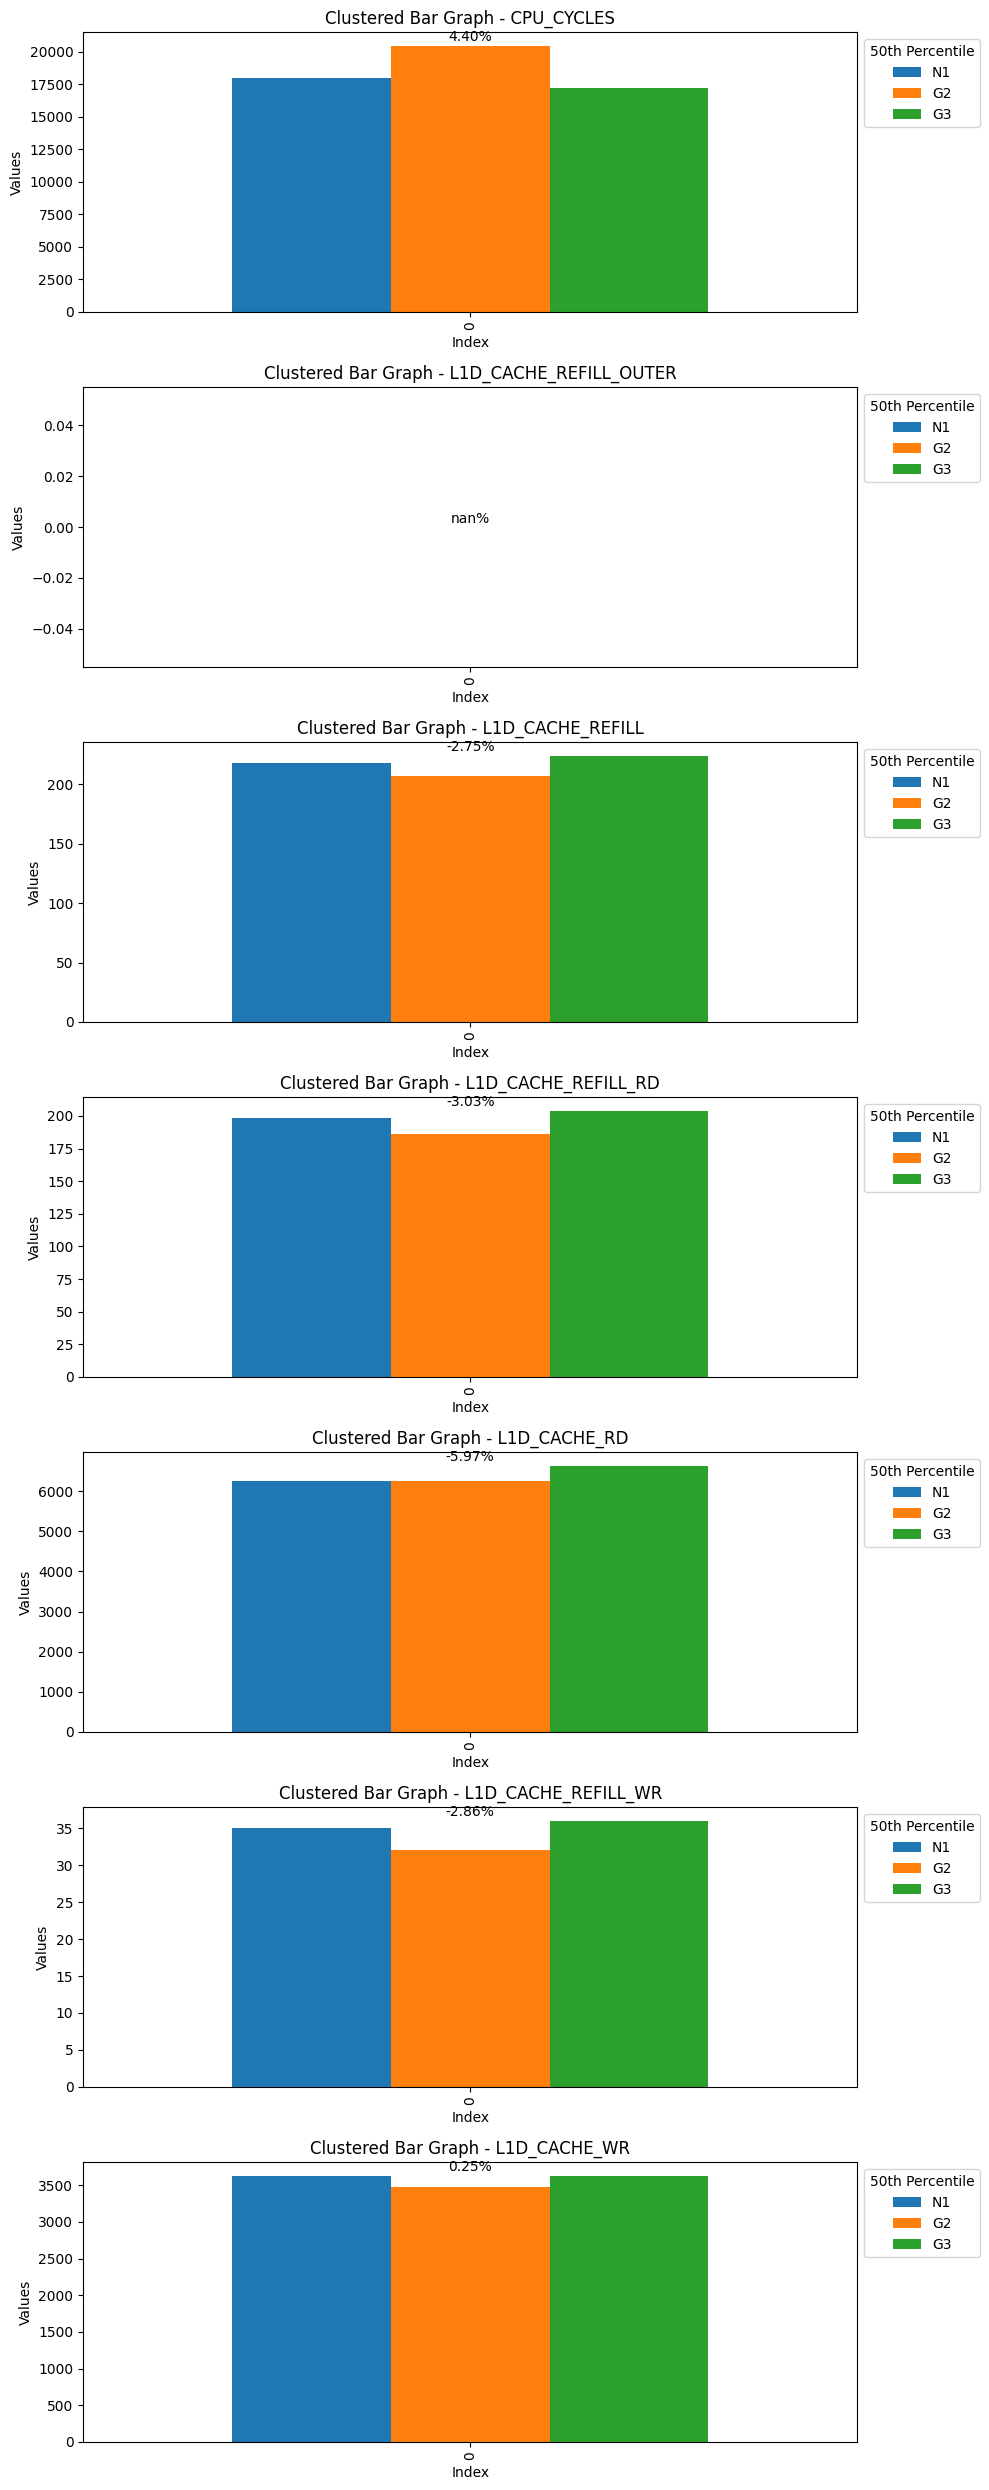

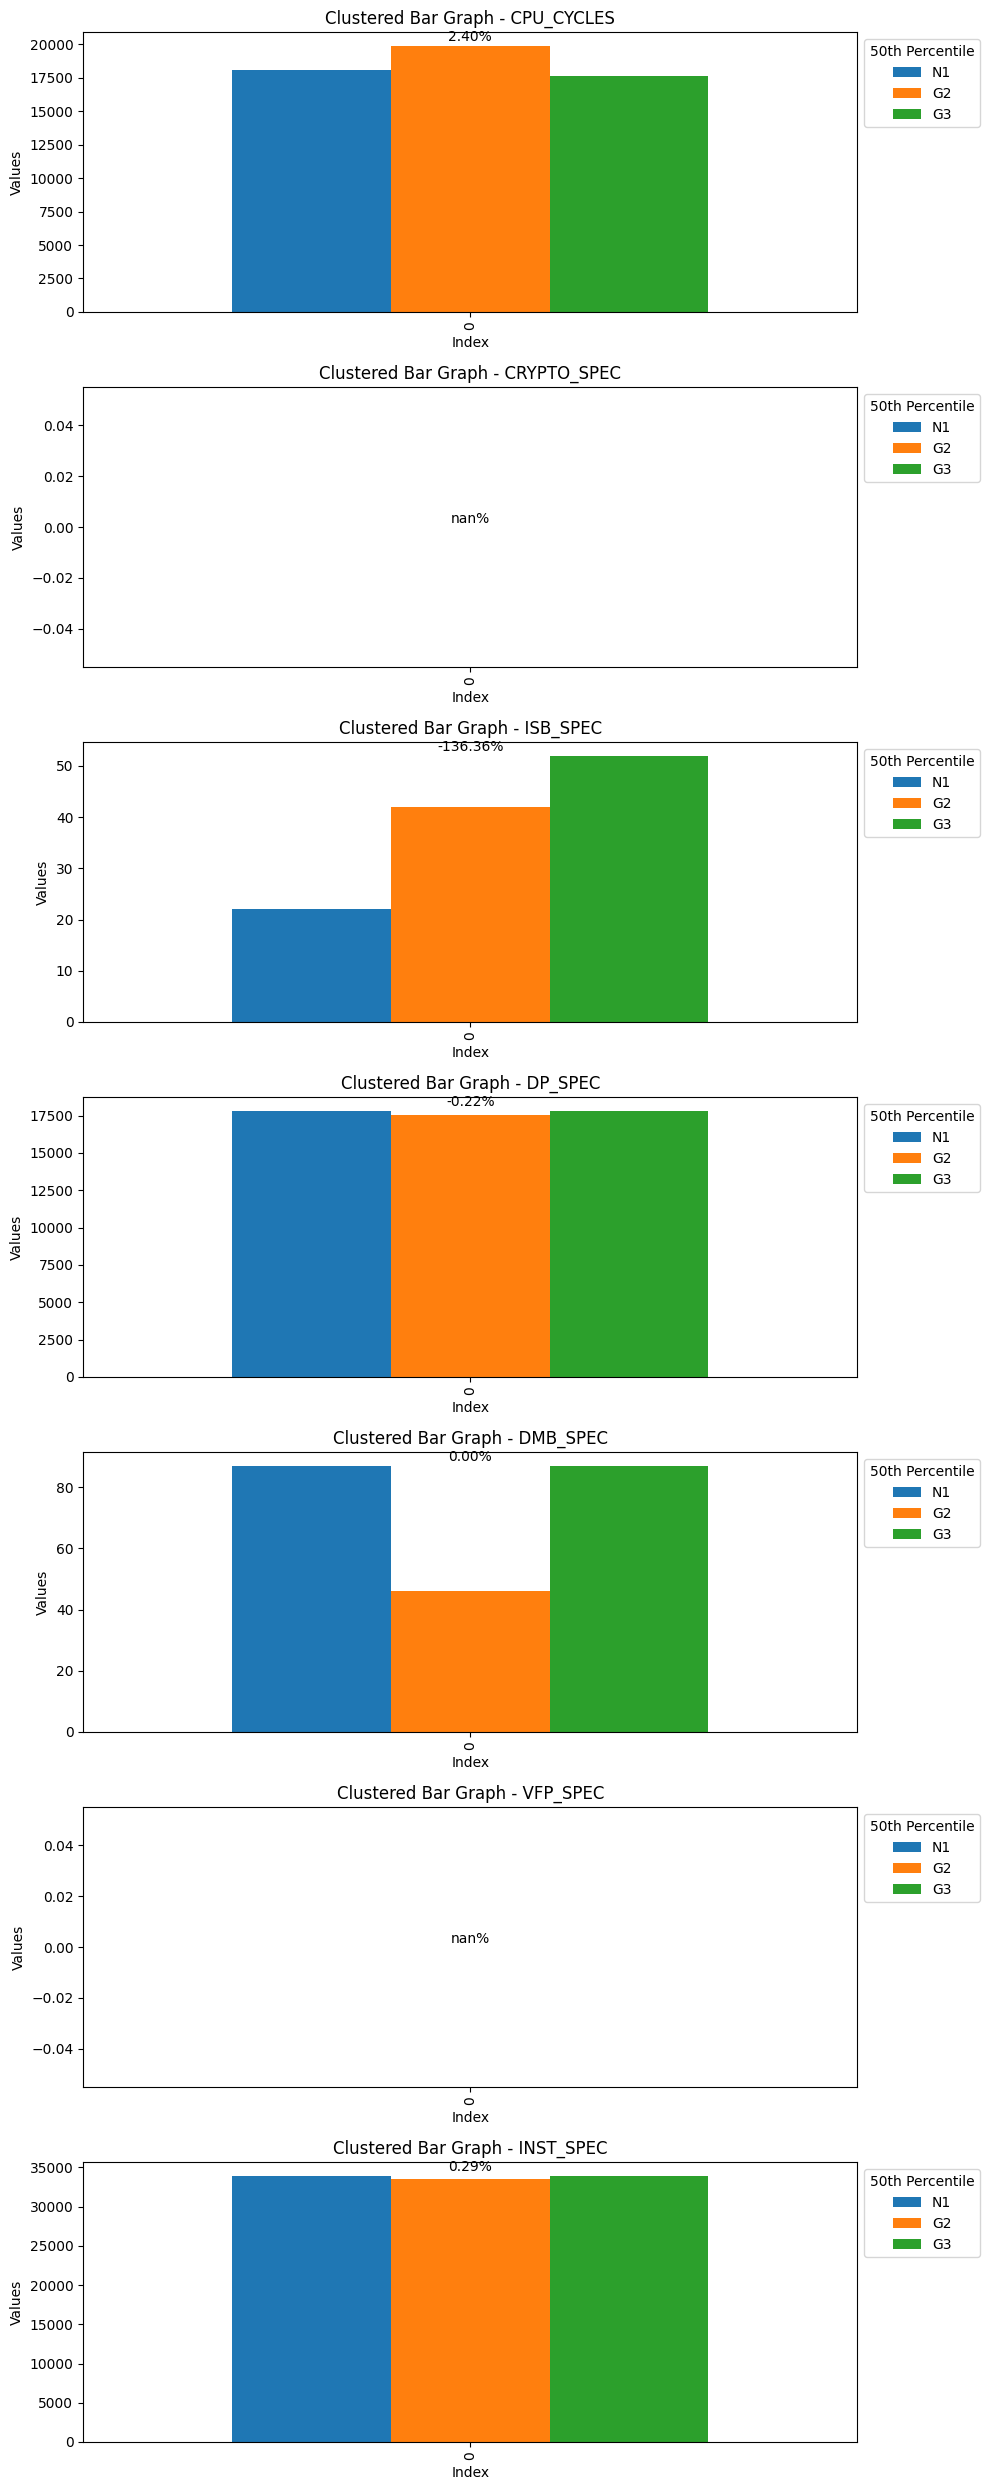

In [8]:
##DU_HIGH Plots for 3 PROCESSORS

import pandas as pd
import matplotlib.pyplot as plt

def plot_clustered_bar(df, column, title, ax):
    """Plot a clustered bar graph for the specified column."""
    bar_plot = df[column].plot(kind='bar', ax=ax, width=0.8)
    legend_labels = ['N1', 'G2', 'G3']
    ax.legend(legend_labels, title='50th Percentile', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel('Index')  # Update the xlabel since there's no BG, LS, and CB_LEN
    ax.set_ylabel('Values')
    ax.set_title(title)
    
    # Extract columns
    n1_column = df[column].iloc[:, 0]  # Update the column index as per your data
    g3_column = df[column].iloc[:, -1]  # Update the column index as per your data

    # Calculate percentage difference
    percent_difference = ((n1_column - g3_column) / n1_column) * 100
    pd_val = percent_difference.iloc[0]
    # Find the highest bar
    max_height = max(bar_plot.patches, key=lambda x: x.get_height()).get_height()
    ax.annotate(f'{pd_val:.2f}%', 
                xy=(0, max_height), 
                xytext=(0, 1),  # Offset of the annotation from the top of the bar
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10,
                color='black')

# Define the base directory paths for each bundle type
n1_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/'
#n2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/N2/'
g2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/'
g3_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/'

# Define the base file name patterns for each bundle type
base_filename = 'bundle{}.csv'

# Initialize empty lists to store DataFrames for each bundle
n1dfs = []
#n2dfs = []
g2dfs = []
g3dfs = []
merged_dfs = []
bundles_cols = []


for bundle_num in range(15):
    # Construct the file paths for the current bundle in each directory
    n1_filename = n1_base_dir + base_filename.format(bundle_num)
    #n2_filename = n2_base_dir + base_filename.format(bundle_num)
    g2_filename = g2_base_dir + base_filename.format(bundle_num)
    g3_filename = g3_base_dir + base_filename.format(bundle_num)
    
    # Read the CSV files for the current bundle
    n1_df = pd.read_csv(n1_filename)
    #n2_df = pd.read_csv(n2_filename)
    g2_df = pd.read_csv(g2_filename)
    g3_df = pd.read_csv(g3_filename)
    
    # Append DataFrames to the appropriate list
    n1dfs.append(n1_df)
    #n2dfs.append(n2_df)
    g2dfs.append(g2_df)
    g3dfs.append(g3_df)
    
    n1_df.columns = n1_df.columns.str.strip()
    bundles_cols.append(n1_df.columns)
    # Concatenate DataFrames
    merged_df = pd.concat([n1_df, g2_df, g3_df], axis=1)
    
    # Append the merged DataFrame to the list
    merged_dfs.append(merged_df)

# Iterate over each bundle's DataFrame
for bundle_num, merged_df in enumerate(merged_dfs):
    # Get the list of columns for the current bundle
    bundle_cols = bundles_cols[bundle_num]
    fig, axs = plt.subplots(len(bundle_cols), 1, figsize=(10, 25))  # Adjust the figsize as needed
    # Iterate over each column for plotting
    for i, column in enumerate(bundle_cols):
        # Plot clustered bar graph for the current column
        plot_clustered_bar(merged_df[column], column, f'Clustered Bar Graph - {column}', axs[i])

    # Adjust layout
    plt.tight_layout()  
    plt.savefig(f'/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/bundle{bundle_num}.pdf')
    # Show the plot
    plt.show()

In [4]:
#Generate plotting csv for DUHIGH
import pandas as pd
import os

def extract_row_as_new_row_from_csv_files(csv_files, row_number):
    # Initialize an empty list to store dictionaries of column names and values
    column_data = []
    # Loop through each CSV file
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
        # Extract the specified row
        selected_row = df.iloc[row_number]
        
        # Split the row into column names and values
        columns = selected_row.index
        values = selected_row.values
        
        # Append column names and values to the list
        for column, value in zip(columns, values):
            column_data.append({'Column Name': column, 'Value': value})
    
    # Create DataFrame from the list of dictionaries
    column_names_values_df = pd.DataFrame(column_data)
    return column_names_values_df

'''
def extract_row_as_new_row_from_csv_files(csv_files, row_number):
    # Initialize empty DataFrames to store column names and values
    column_names_values_df = pd.DataFrame(columns=['Column Name', 'Value'])
    # Loop through each CSV file
    for csv_file in csv_files:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)
        
        # Extract the specified row
        selected_row = df.iloc[row_number]
        
        # Split the row into column names and values
        columns = selected_row.index
        values = selected_row.values
        
        # Append column names and values to the DataFrame
        for column, value in zip(columns, values):
            column_names_values_df = column_names_values_df.append({'Column Name': column, 'Value': value}, ignore_index=True)
    return column_names_values_df
'''
def calculate_metrics(df, metrics):
    # Initialize a list to store the metric information
    metric_info = []
    # Iterate over each metric
    for metric_name, metric_columns in metrics:
        # Extract column names for the current metric
        column1, column2 = metric_columns

        # Get the values corresponding to the two columns for each row
        values1 = df.loc[df['Column Name'] == column1, 'Value'].tolist()
        values2 = df.loc[df['Column Name'] == column2, 'Value'].tolist()
        graph_xlabel = f"{metric_name}={column1}/{column2}"

        # Calculate the metric for each pair of values
        for value1, value2 in zip(values1, values2):
            # Calculate the metric
            if value2 != 0:  # To avoid division by zero
                metric_value = value1 / value2
            else:
                metric_value = float('nan')  # Handling division by zero
            
            # Append metric information to the list
            metric_info.append({
                'Metrics': metric_name,
                'Name_1': column1,
                'Event_1': value1,
                'Name_2': column2,
                'Event_2': value2,
                'Event_1/Event_2': metric_value,
                'Graph_Xlabel': graph_xlabel
            })
    
    # Convert the list of metric information into a DataFrame
    metric_df = pd.DataFrame(metric_info)
    #print(metric_df)
    return metric_df

# Example usage:
row_number = 0  # Specify the row number to extract

# Get list of CSV files in the directory
n1_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/bundle14.csv'],
            ]

g2_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/bundle14.csv'],
            ]

g3_csv_files = [['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle11.csv','/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle12.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle0.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle1.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle7.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle10.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle5.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle6.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle13.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle4.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle8.csv'],
            ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle8.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle9.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/bundle14.csv'],
            ]

#MPKI, TLB Miss, Miss(Exclude TLB), Stalls, IPC
kpi_metrics = [[
    ('L1_I-cache_MPKI', ['L1I_CACHE_REFILL', 'INST_RETIRED']),#11
    ('I-side_page_table_MPKI', ['ITLB_WALK', 'INST_RETIRED']),#11
    ('L2_cache_MPKI', ['L2D_CACHE_REFILL', 'INST_RETIRED']),#12
    ('Branch_MPKI', ['BR_MIS_PRED_RETIRED', 'INST_RETIRED']),#12
    ('D-side_page_table_MPKI', ['DTLB_WALK', 'INST_RETIRED']),#12
    ('L1_D-cache_MPKI', ['L1D_CACHE_REFILL', 'INST_RETIRED']),#11
    ('LLC_cache_MPKI', ['LL_CACHE_MISS_RD', 'INST_RETIRED'])],#11
    [
    ('L1_data_TLB_read_miss_rate', ['L1D_TLB_REFILL_RD', 'L1D_TLB_RD']),#10
    ('L2_TLB_miss_rate', ['L2D_TLB_REFILL', 'L2D_TLB']),#0
    ('L2_TLB_write_miss_rate', ['L2D_TLB_REFILL_WR', 'L2D_TLB_WR']),#1
    ('L2_TLB_read_miss_rate', ['L2D_TLB_REFILL_RD', 'L2D_TLB_RD']),#1
    ('L1_data_TLB_miss_rate', ['L1D_TLB_REFILL', 'L1D_TLB']),#0
    ('L1_instruction_TLB_miss_rate', ['L1I_TLB_REFILL', 'L1I_TLB']),#7
    ('L1_data_TLB_write_miss_rate', ['L1D_TLB_REFILL_WR', 'L1D_TLB_WR'])],#10
    [
    ('L1_D-cache_read_miss_rate', ['L1D_CACHE_REFILL_RD', 'L1D_CACHE_RD']),#13
    ('L1_D-cache_write_miss_rate', ['L1D_CACHE_REFILL_WR', 'L1D_CACHE_WR']),#13
    ('L1_D-cache_miss_rate', ['L1D_CACHE_REFILL', 'L1D_CACHE']),#6
    ('L1_I-cache_miss_rate', ['L1I_CACHE_REFILL', 'L1I_CACHE']),#5
    ('L2_cache_miss_rate', ['L2D_CACHE_REFILL', 'L2D_CACHE']),#6
    ('L1_D-cache_rate_of_cache_misses_in_L1_and_L2', ['L1D_CACHE_REFILL_OUTER', 'L1D_CACHE_REFILL'])],#13
    [
    ('Front_end_stall_rate', ['STALL_FRONTEND', 'CPU_CYCLES']),#4
    ('Back_end_stall_rate', ['STALL_BACKEND', 'CPU_CYCLES'])],#4
    [
    ('Speculatively_executed_IPC', ['INST_SPEC', 'CPU_CYCLES']),#8
    ('Architecturally_executed_IPC', ['INST_RETIRED', 'CPU_CYCLES'])],#8
    [
    ('VFP_instruction_rate_per_instructions', ['VFP_SPEC', 'INST_SPEC']),#14
    ('DMB_rate_per_instructions', ['DMB_SPEC', 'INST_SPEC']),#14
    ('DP_instruction_rate_per_instructions', ['DP_SPEC', 'INST_SPEC']),#14
    ('ISB_rate_per_instructions', ['ISB_SPEC', 'INST_SPEC']),#14
    ('CRYPTO_instruction_rate_per_instructions', ['CRYPTO_SPEC', 'INST_SPEC']),#14
    ('PC_WRITE_instruction_rate_per_instructions', ['PC_WRITE_SPEC', 'INST_SPEC']),#8
    ('SIMD_instruction_rate_per_instructions', ['ASE_SPEC', 'INST_SPEC']),#8
    ('BR_IMMED_instruction_rate_per_instructions', ['BR_IMMED_SPEC', 'INST_SPEC']),#9
    ('ST_instruction_rate_per_instructions', ['ST_SPEC', 'INST_SPEC']),#8
    ('BR_RETURN_instruction_rate_per_instructions', ['BR_RETURN_SPEC', 'INST_SPEC']),#9
    ('DSB_rate_per_instructions', ['DSB_SPEC', 'INST_SPEC']),#9
    ('LD_instruction_rate_per_instructions', ['LD_SPEC', 'INST_SPEC']),#9
    ('BR_INDIRECT_instruction_rate_per_instructions', ['BR_INDIRECT_SPEC', 'INST_SPEC']),#9
    ('Exception_rate_per_instructions', ['EXC_TAKEN', 'INST_RETIRED'])]#8
]

n1_kpi_metrics_df = pd.DataFrame()
g2_kpi_metrics_df = pd.DataFrame()
g3_kpi_metrics_df = pd.DataFrame()

for i, (set_of_csvs, metrics) in enumerate(zip(n1_csv_files, kpi_metrics)):
    n1_result_df = extract_row_as_new_row_from_csv_files(n1_csv_files[i], row_number)
    n1_metrics_df = calculate_metrics(n1_result_df, kpi_metrics[i])
    n1_kpi_metrics_df = pd.concat([n1_kpi_metrics_df, n1_metrics_df], ignore_index=True)
    
    g2_result_df = extract_row_as_new_row_from_csv_files(g2_csv_files[i], row_number)
    g2_metrics_df = calculate_metrics(g2_result_df, kpi_metrics[i])
    g2_kpi_metrics_df = pd.concat([g2_kpi_metrics_df, g2_metrics_df], ignore_index=True)
    
    g3_result_df = extract_row_as_new_row_from_csv_files(g3_csv_files[i], row_number)
    g3_metrics_df = calculate_metrics(g3_result_df, kpi_metrics[i])
    g3_kpi_metrics_df = pd.concat([g3_kpi_metrics_df, g3_metrics_df], ignore_index=True)

# Save to CSV
n1_kpi_metrics_df.to_csv('n1_du_metrics.csv', index=False, na_rep='NaN')
g2_kpi_metrics_df.to_csv('g2_du_metrics.csv', index=False, na_rep='NaN')
g3_kpi_metrics_df.to_csv('g3_du_metrics.csv', index=False, na_rep='NaN')

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/3655805674.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

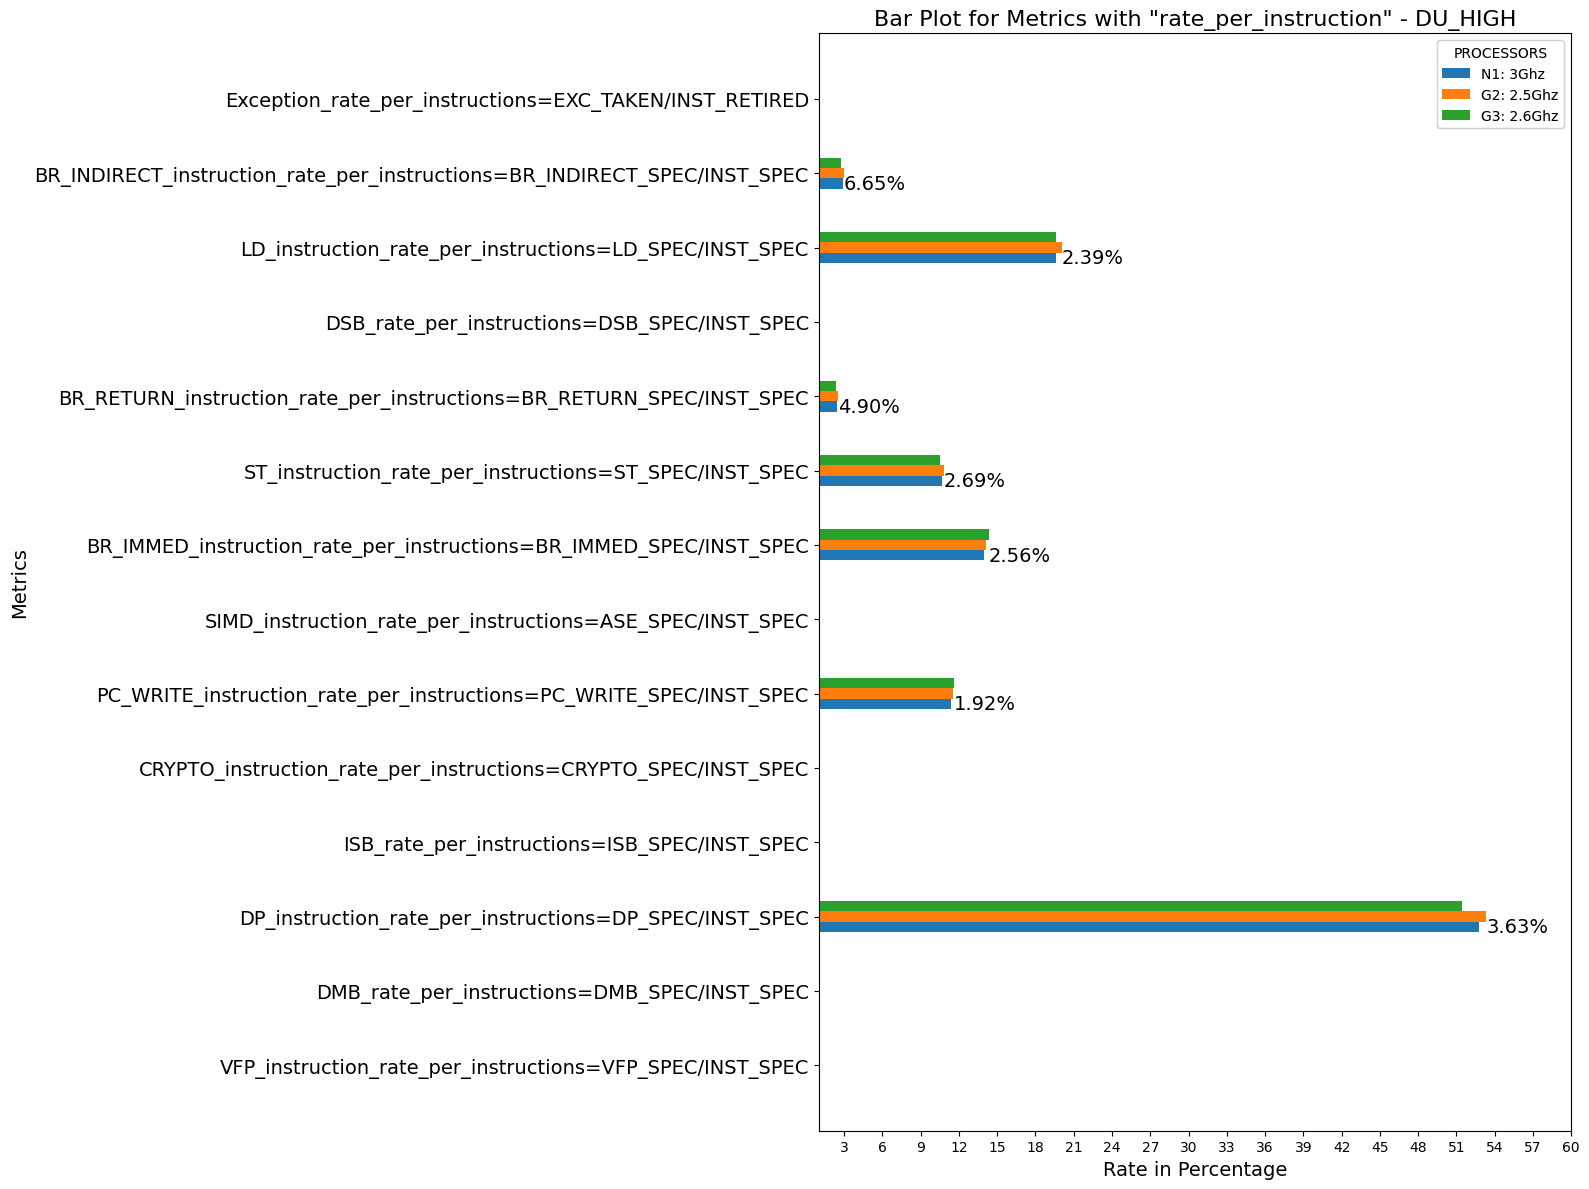

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/3655805674.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 1000


<Figure size 640x480 with 0 Axes>

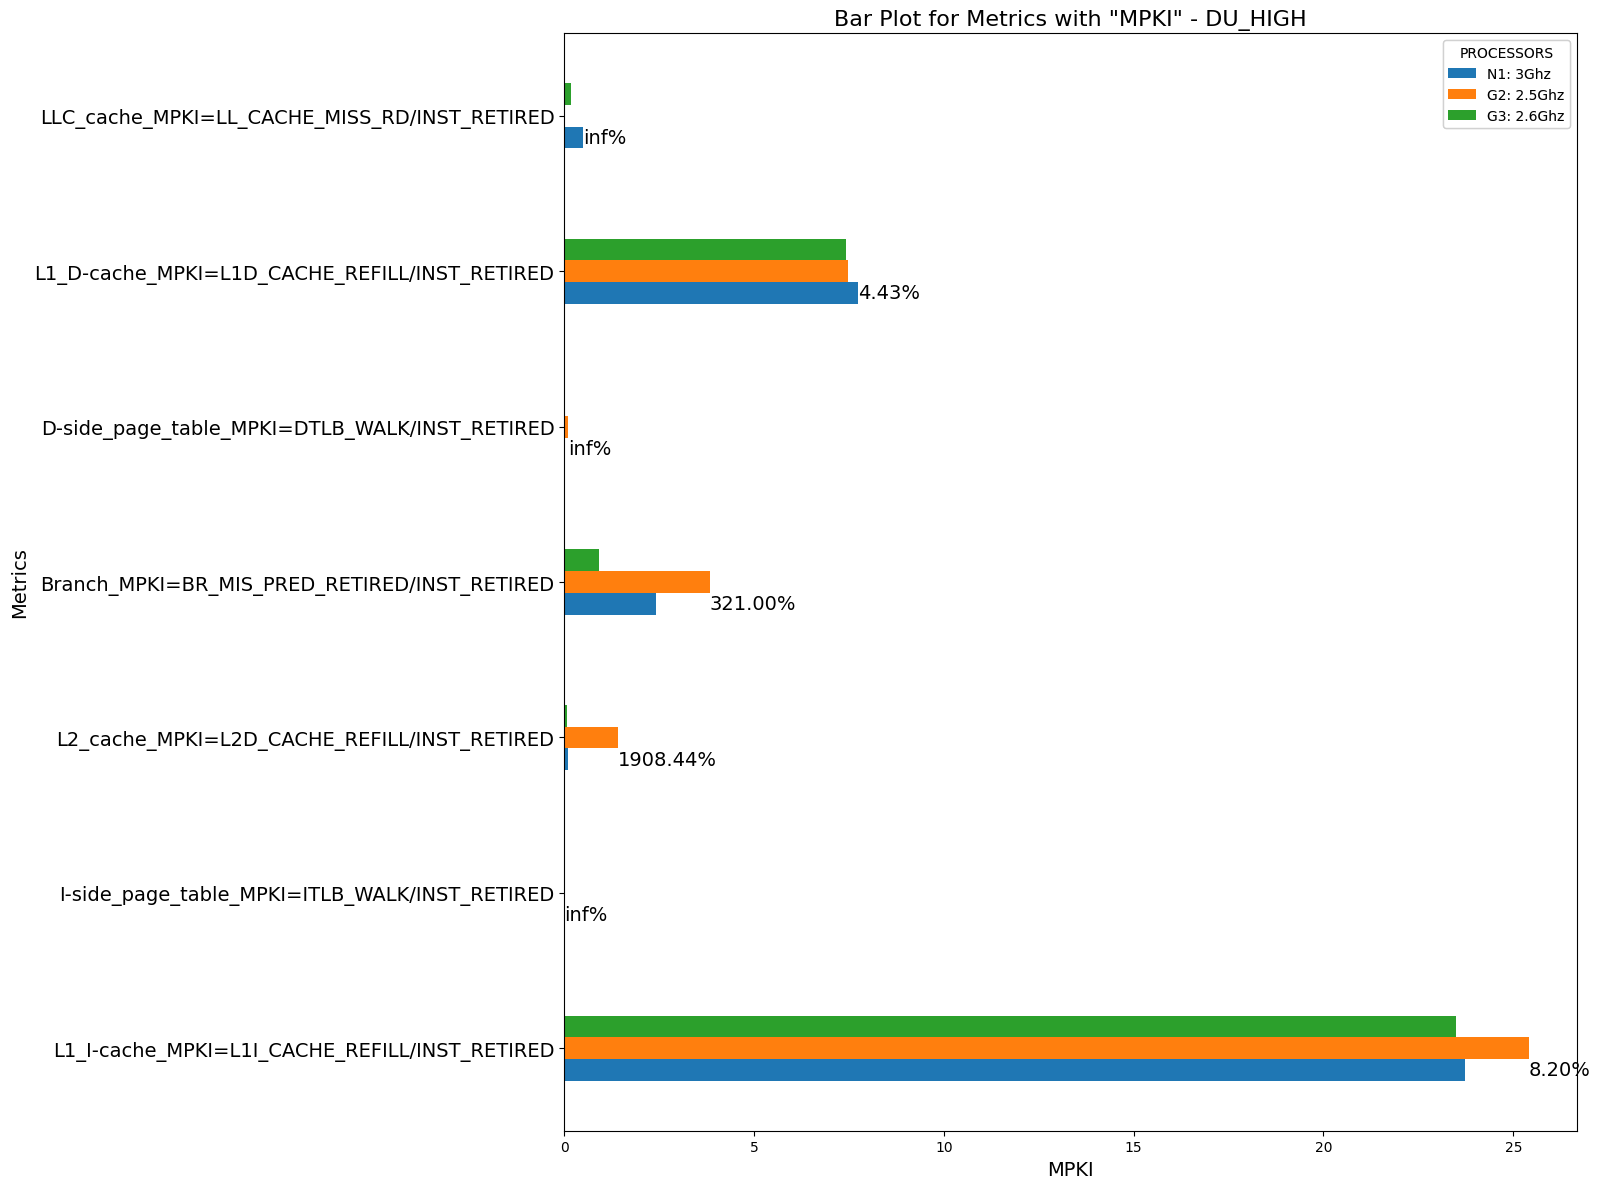

<Figure size 640x480 with 0 Axes>

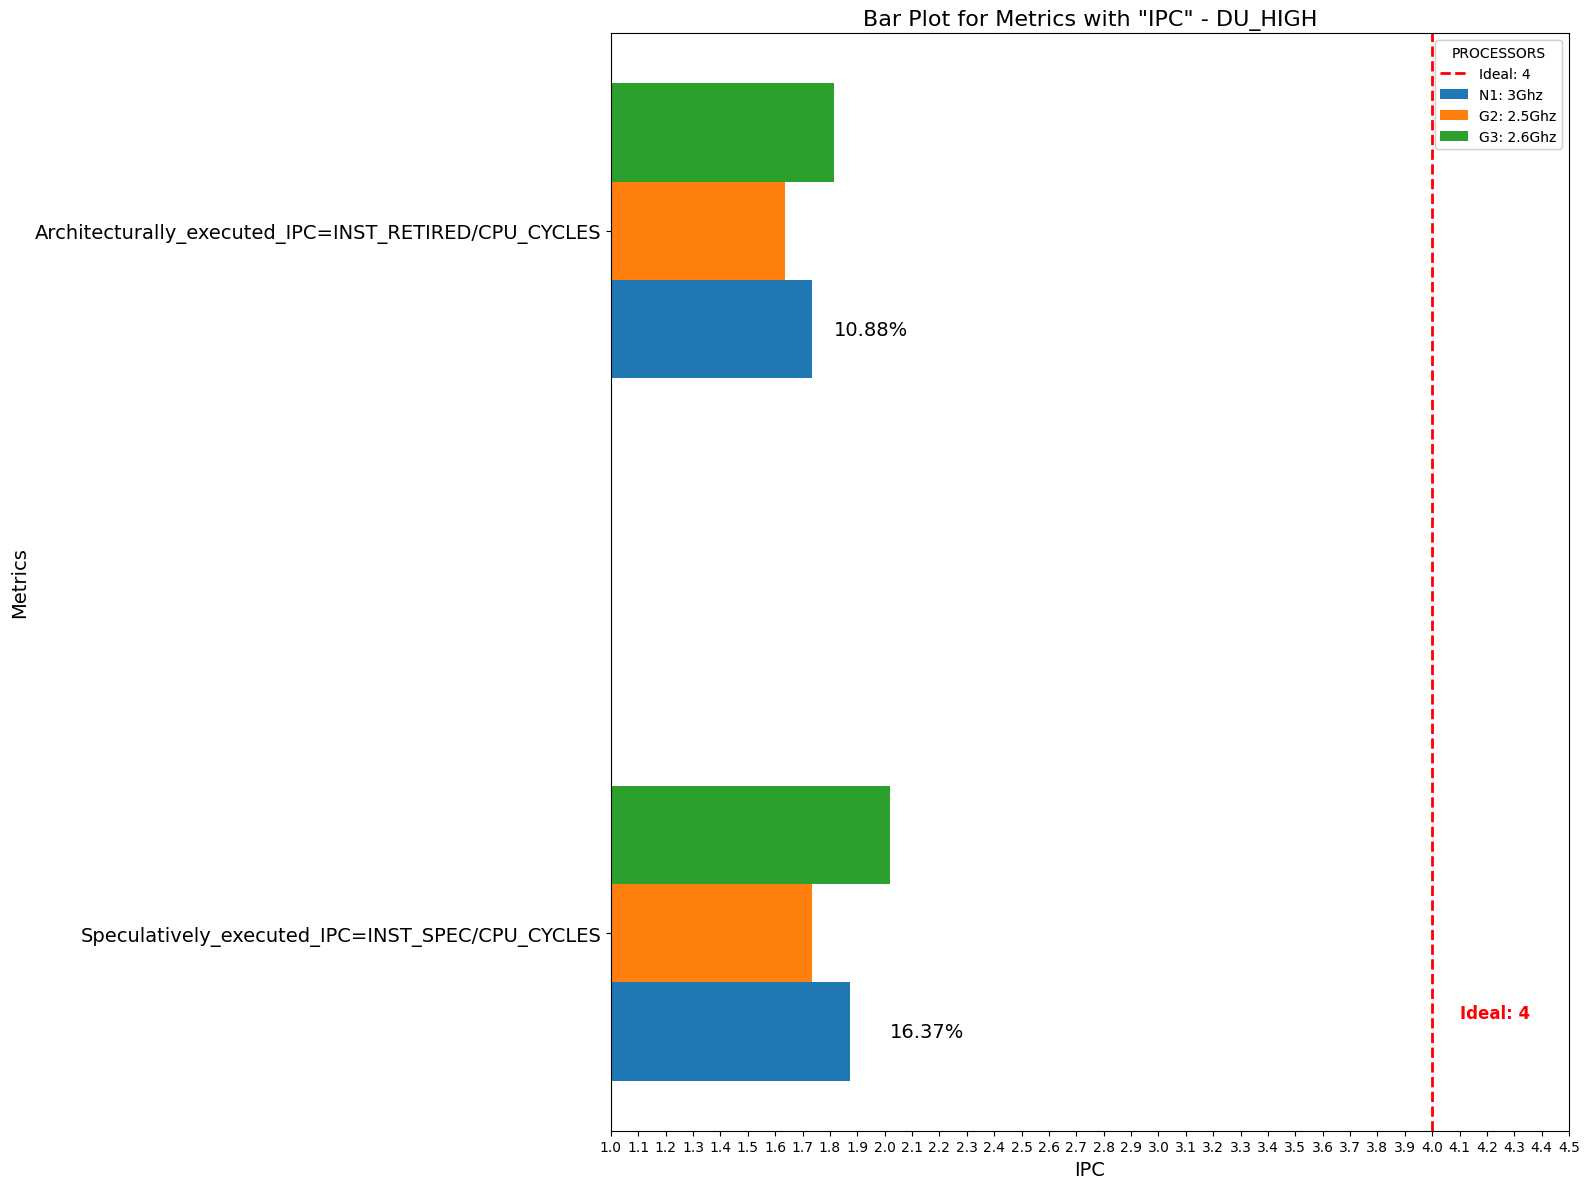

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/3655805674.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

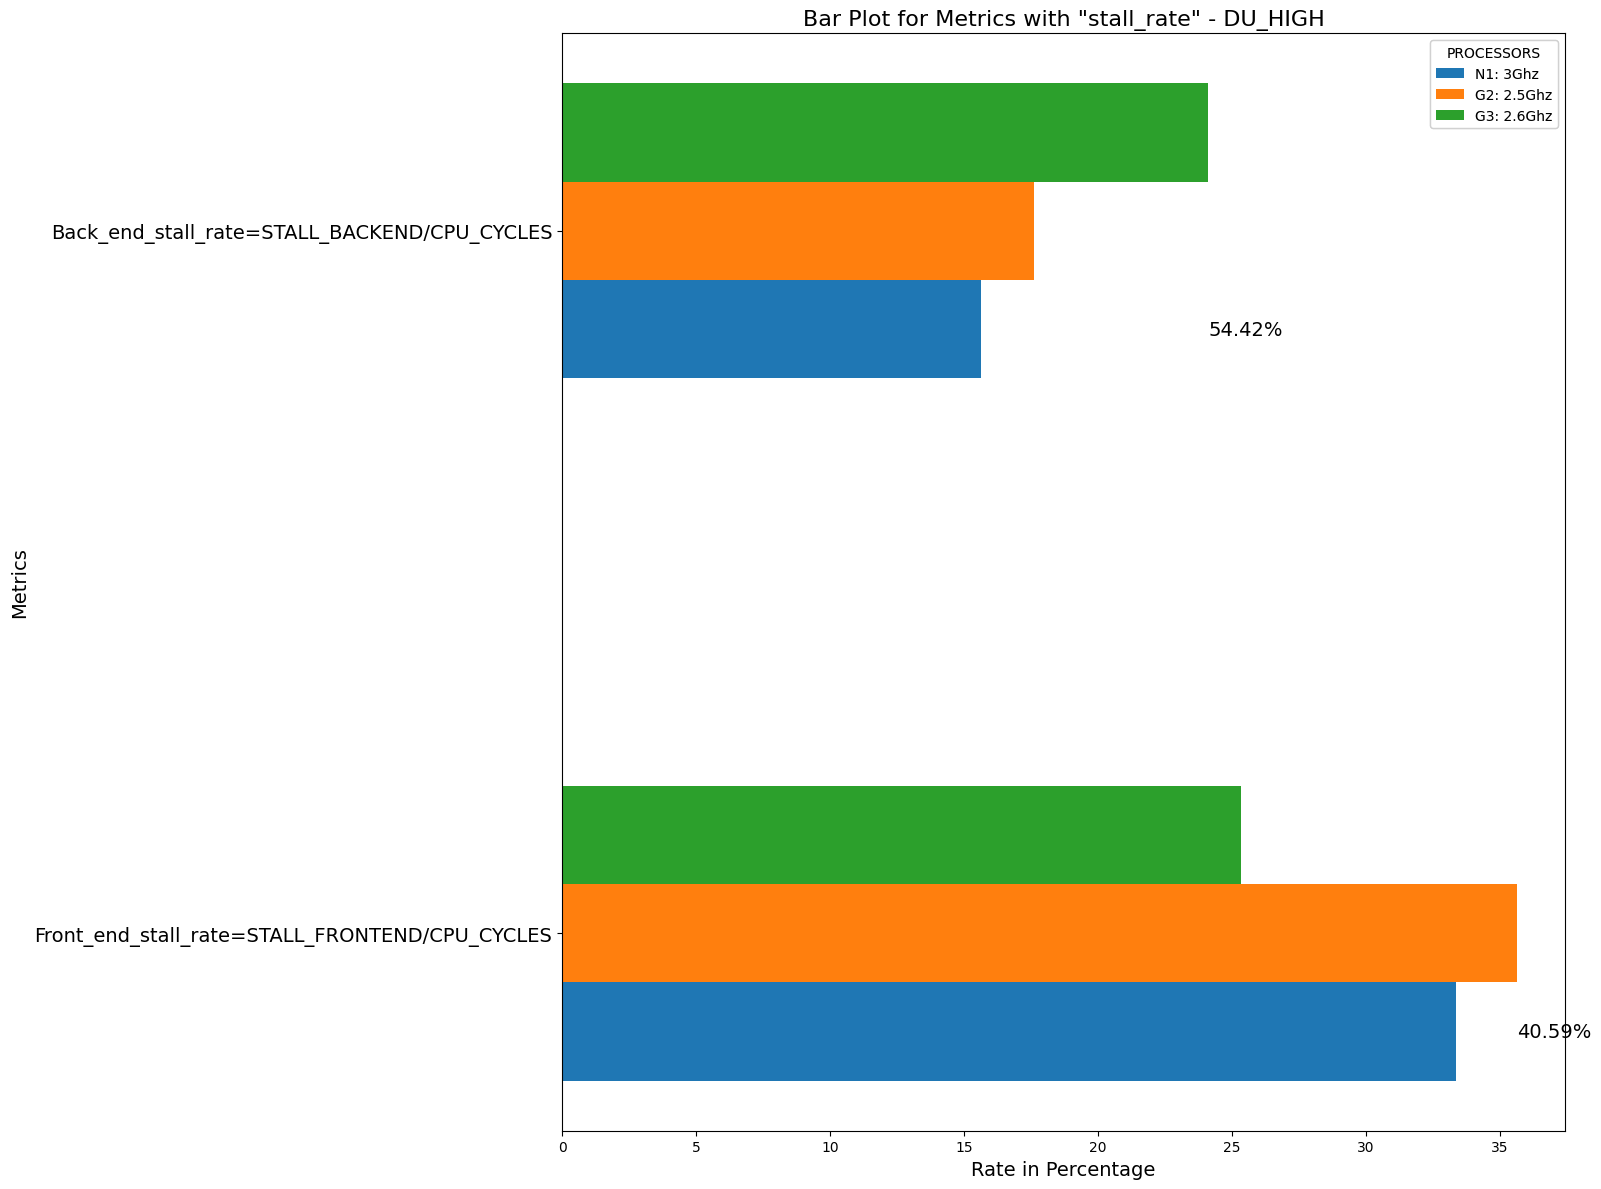

/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/3655805674.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
/var/folders/g6/8g1_8h6n1bz83x5mcd36qzmh0000gn/T/ipykernel_20580/3655805674.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100


<Figure size 640x480 with 0 Axes>

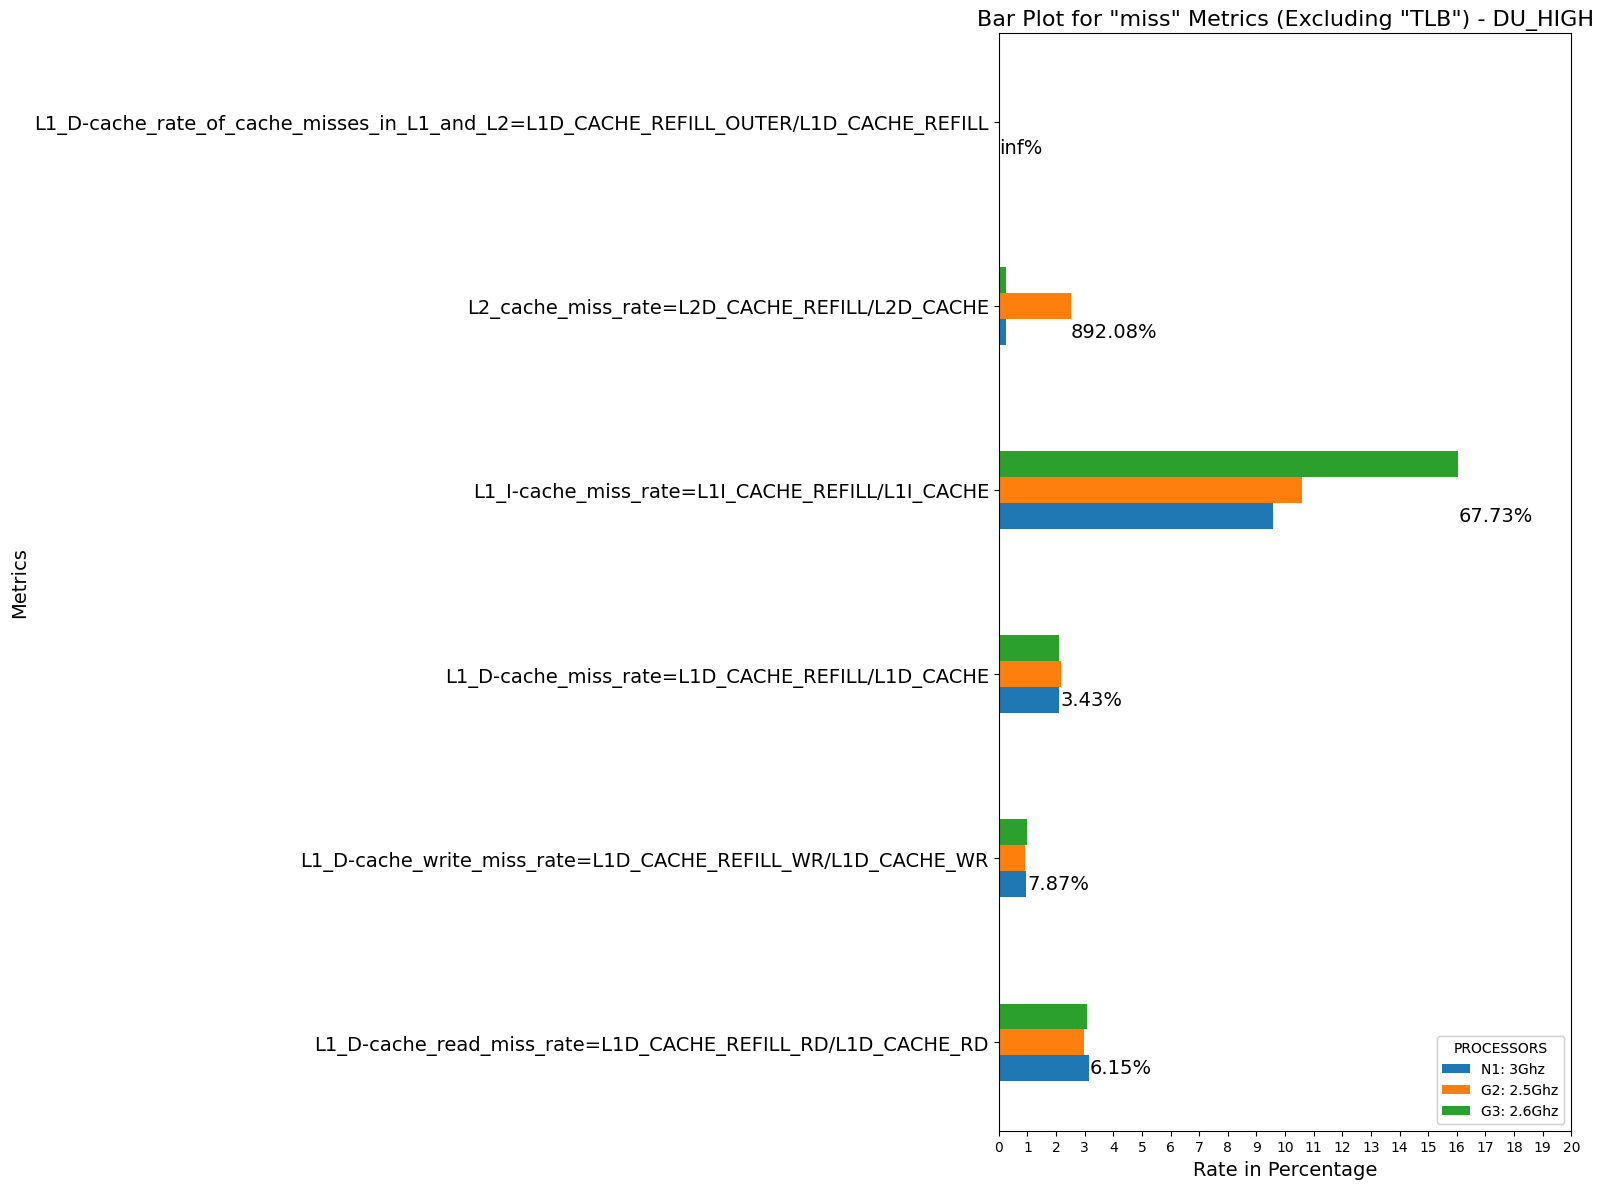

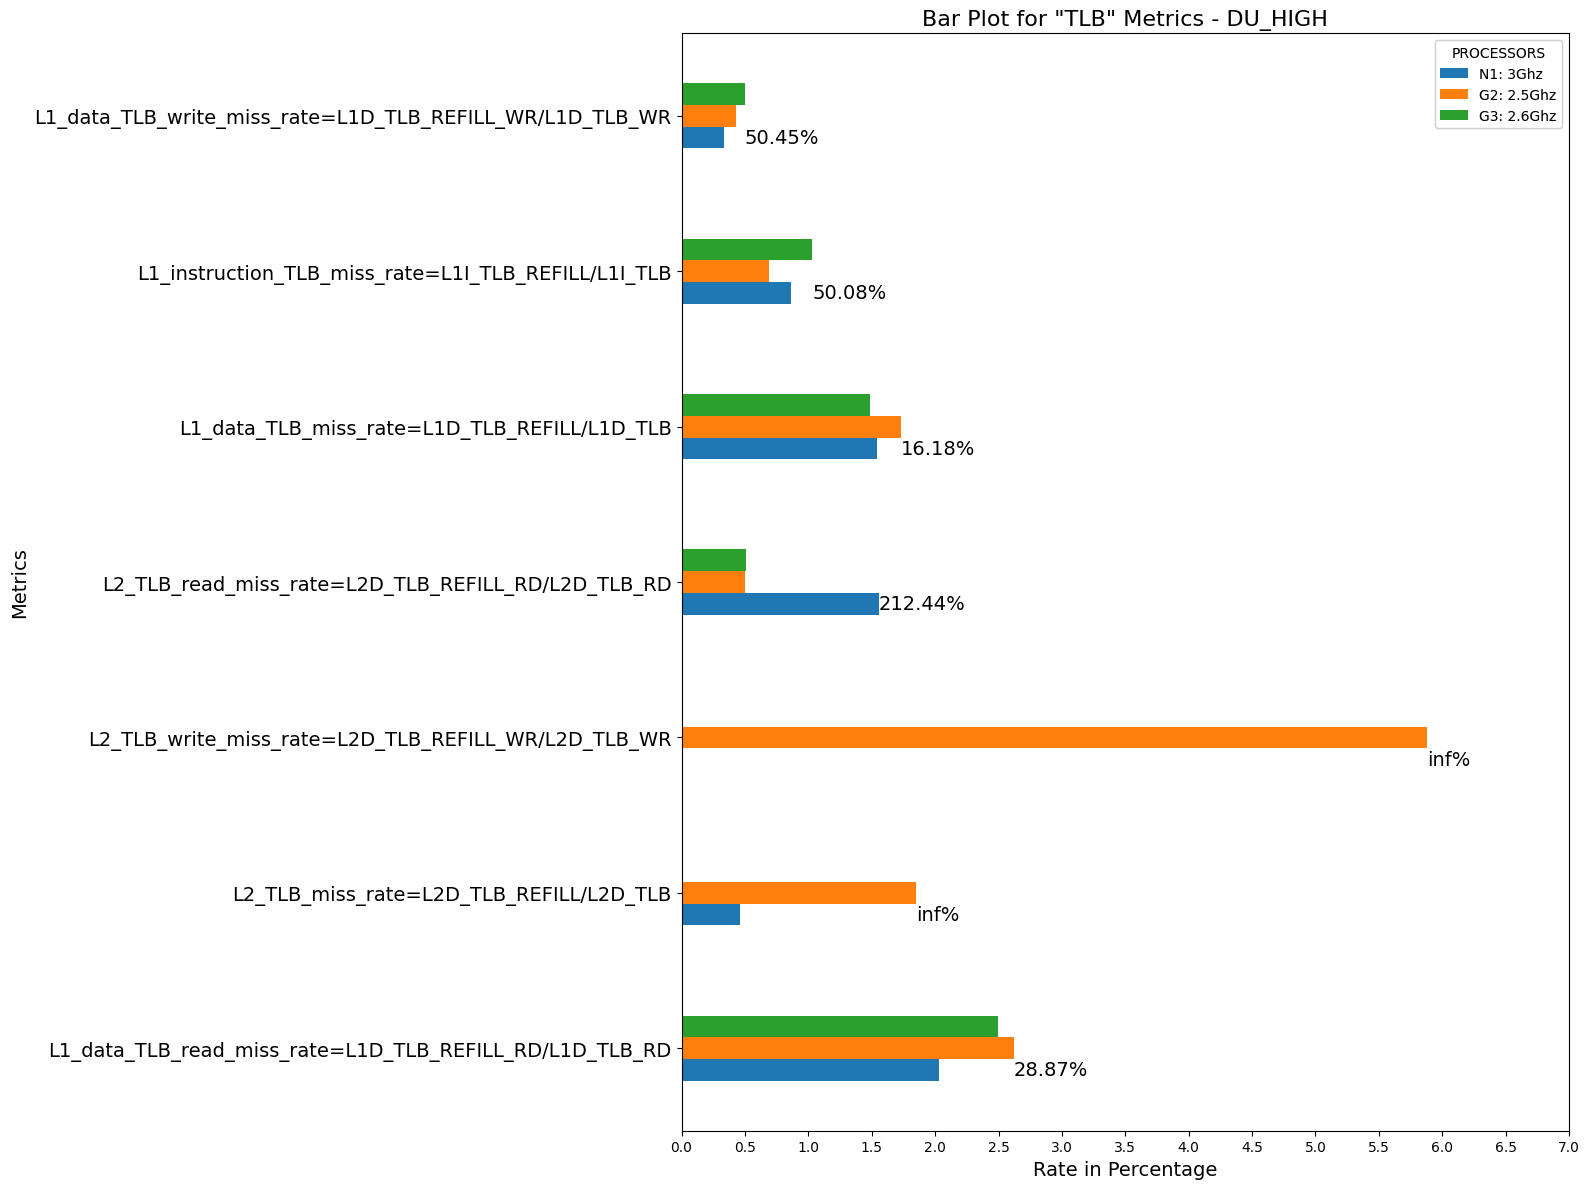

In [5]:
## Plotting KPI for DU_HIGH
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Hardcoded here, will be given as inputs in cmdline later
csv_files = ['/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/n1_du_metrics.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/g2_du_metrics.csv', '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/g3_du_metrics.csv']
data = []
for file in csv_files:
    df = pd.read_csv(file)
    data.append(df)
    
#Calculate percentage difference between max and min bars in a cluster. 
def calculate_percentage_difference(max_vals, min_vals):
    percentage_differences = []
    for max_val, min_val in zip(max_vals, min_vals):
        if min_val == 0:
            percentage_difference = float('inf')  # Handle division by zero
        else:
            percentage_difference = ((max_val - min_val) / min_val) * 100
        percentage_differences.append(percentage_difference)
    return percentage_differences

#Include only metrics containing "miss" but not "TLB" in it as a keyword/keystring
def filter_and_plot_miss(plot_num):
    filtered_data = [df[df['Metrics'].str.contains('miss') & ~df['Metrics'].str.contains('TLB')] for df in data]

    for df in filtered_data:
        df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100

    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))

    bar_width = 0.14  # Adjust spacing

    # Array of indices for the y-coordinates of bars
    indices = np.arange(len(filtered_data[0]))
    
    #Hardcoded jor jupyter
    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']
    
    # Use ax.barh for horizontal bars & use height instead of width
    for i, df in enumerate(filtered_data):
        ax.barh(  
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
    # Lists to store max and min values of the bar cluster of every metric 
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []
    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value

        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for "miss" Metrics (Excluding "TLB") - DU_HIGH'
    ax.set_ylabel('Metrics', fontsize=14)
    ax.set_xlabel('Rate in Percentage', fontsize=14)
    ax.set_title(formatted_title,fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    # y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  

    ax.set_xlim(0, 20)  # Adjust xlim for horizontal chart
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))

    # Calculate and annotate the percentage difference based on max and min values on the plot
    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        # Annotate or display to the right side of the max value
        annotate_x = max(max_values[i], min_values[i]) + 0
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)

    ax.legend()
    custom_legend = ax.legend(loc='lower right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.savefig("/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/du_high_miss_no_tlb.pdf")
    plt.tight_layout()
    
# Include only metrics containing "TLB" but not "context_swap"
def filter_and_plot_tlb(plot_num):
    
    filtered_data = [df[df['Metrics'].str.contains('TLB') & ~df['Metrics'].str.contains('context_swap')] for df in data]
    for df in filtered_data:
        #df['Event_1/Event_2'] *= 100
        df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))
    
    # Adjust spacing
    bar_width = 0.14 

    # Array of indices for the y-coordinates of bars
    indices = np.arange(len(filtered_data[0]))

    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']

    for i, df in enumerate(filtered_data):
        ax.barh(  
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
        
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []

    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value
        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for "TLB" Metrics - DU_HIGH'
    ax.set_ylabel('Metrics', fontsize=14)
    ax.set_xlabel('Rate in Percentage', fontsize=14)
    ax.set_title(formatted_title, fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    #y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  
    ax.set_xlim(0, 7)  # Adjust xlim for horizontal chart
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    
    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        annotate_x = max(max_values[i], min_values[i]) + 0
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)
    ax.legend()
    custom_legend = ax.legend(loc='upper right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.savefig("/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/du_high_tlb.pdf")
    plt.tight_layout()
    
# Include only metrics containing "rate_per_instruction"
def filter_and_plot(key_string, plot_num):
   
    filtered_data = [df[df['Metrics'].str.contains(key_string)] for df in data]

    if key_string == 'rate_per_instruction' or key_string == 'miss' or key_string == 'read_rate|write_rate' or key_string == 'walk_rate' or key_string == 'eviction_rate' or key_string == 'stall_rate' or key_string == 'rate_over_time' or key_string == 'exclusive_store':
        for df in filtered_data:
            df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 100
    elif key_string == 'MPKI':
        for df in filtered_data:
            df['Event_1/Event_2'] = pd.to_numeric(df['Event_1/Event_2'], errors='coerce') * 1000

    plt.figure(plot_num)
    fig, ax = plt.subplots(figsize=(16, 12))

    bar_width = 0.14  
    indices = np.arange(len(filtered_data[0]))
    ue_values = ['N1: 3Ghz', 'G2: 2.5Ghz', 'G3: 2.6Ghz']

    for i, df in enumerate(filtered_data):
        ax.barh( 
            indices + i * bar_width,
            df['Event_1/Event_2'],
            height=bar_width,  
            label=f'{ue_values[i]}',
        )
    max_values = [0] * len(filtered_data[0])
    min_values = [float('inf')] * len(filtered_data[0])
    metric_names = []
    for i, df in enumerate(filtered_data):
        metric_name = df['Metrics'].iloc[0]
        values = df['Event_1/Event_2']

        for j, value in enumerate(values):
            if value > max_values[j]:
                max_values[j] = value
            if value < min_values[j]:
                min_values[j] = value

        metric_names.append(metric_name)

    formatted_title = f'Bar Plot for Metrics with "{key_string}" - DU_HIGH'
    ax.set_ylabel('Metrics', fontsize=14)
    if key_string == 'MPKI':
        ax.set_xlabel('MPKI', fontsize=14)
    elif key_string == 'misses_per_context_swap' or key_string == 'miss':
        ax.set_xlabel('Number of Misses')
    elif key_string == 'IPC':
        ax.set_xlabel('IPC', fontsize=14)
    else:
        ax.set_xlabel('Rate in Percentage',fontsize=14)
    ax.set_title(formatted_title,fontsize=16)
    ax.set_yticks(indices + (bar_width + 0.0) * (len(filtered_data) - 1) / 2)
    #y-axis labels
    ax.set_yticklabels(filtered_data[0]['Graph_Xlabel'], rotation=0, ha='right', fontsize=14)  
    if key_string == 'IPC':
        ax.set_xlim(1, 4.5)  # xlim for horizontal chart

        ideal_value = 4
        ax.axvline(ideal_value, color='red', linestyle='--', label=f'Ideal: {ideal_value}', linewidth=2)
        ax.annotate(
            f'Ideal: {ideal_value}',
            xy=(ideal_value + 0.1, 0.02),  #text pos can be adjusted
            color='red',
            fontsize=12,
            fontweight='bold',
        )
        ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))

    if key_string == 'rate_per_instruction':
        ax.set_xlim(1, 60)  # xlim for horizontal chart
        ax.xaxis.set_major_locator(plt.MultipleLocator(3))

    if key_string == 'read_rate|write_rate':
        ax.set_xlim(1, 75)  # xlim for horizontal chart
        ax.xaxis.set_major_locator(plt.MultipleLocator(5.0))

    percentage_differences = calculate_percentage_difference(max_values, min_values)
    for i, diff in enumerate(percentage_differences):
        annotate_x = max(max_values[i], min_values[i]) + 0

        # Find the position to print/annotate at the center of the cluster
        ax.annotate(f'{diff:.2f}%', (annotate_x, indices[i]), va='center', fontsize=14)

    ax.legend()
    custom_legend = ax.legend(loc='upper right', title="PROCESSORS")
    ax.add_artist(custom_legend)
    plt.savefig(f'/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/du_high_{key_string}.pdf', bbox_inches='tight')
    plt.tight_layout()
    plt.show()

def main():
    filter_and_plot('rate_per_instruction', 1)
    filter_and_plot('MPKI', 2)
    filter_and_plot('IPC', 3)
    filter_and_plot('stall_rate', 4)

    filter_and_plot_miss(1)
    filter_and_plot_tlb(2)


if __name__ == '__main__':
    main()

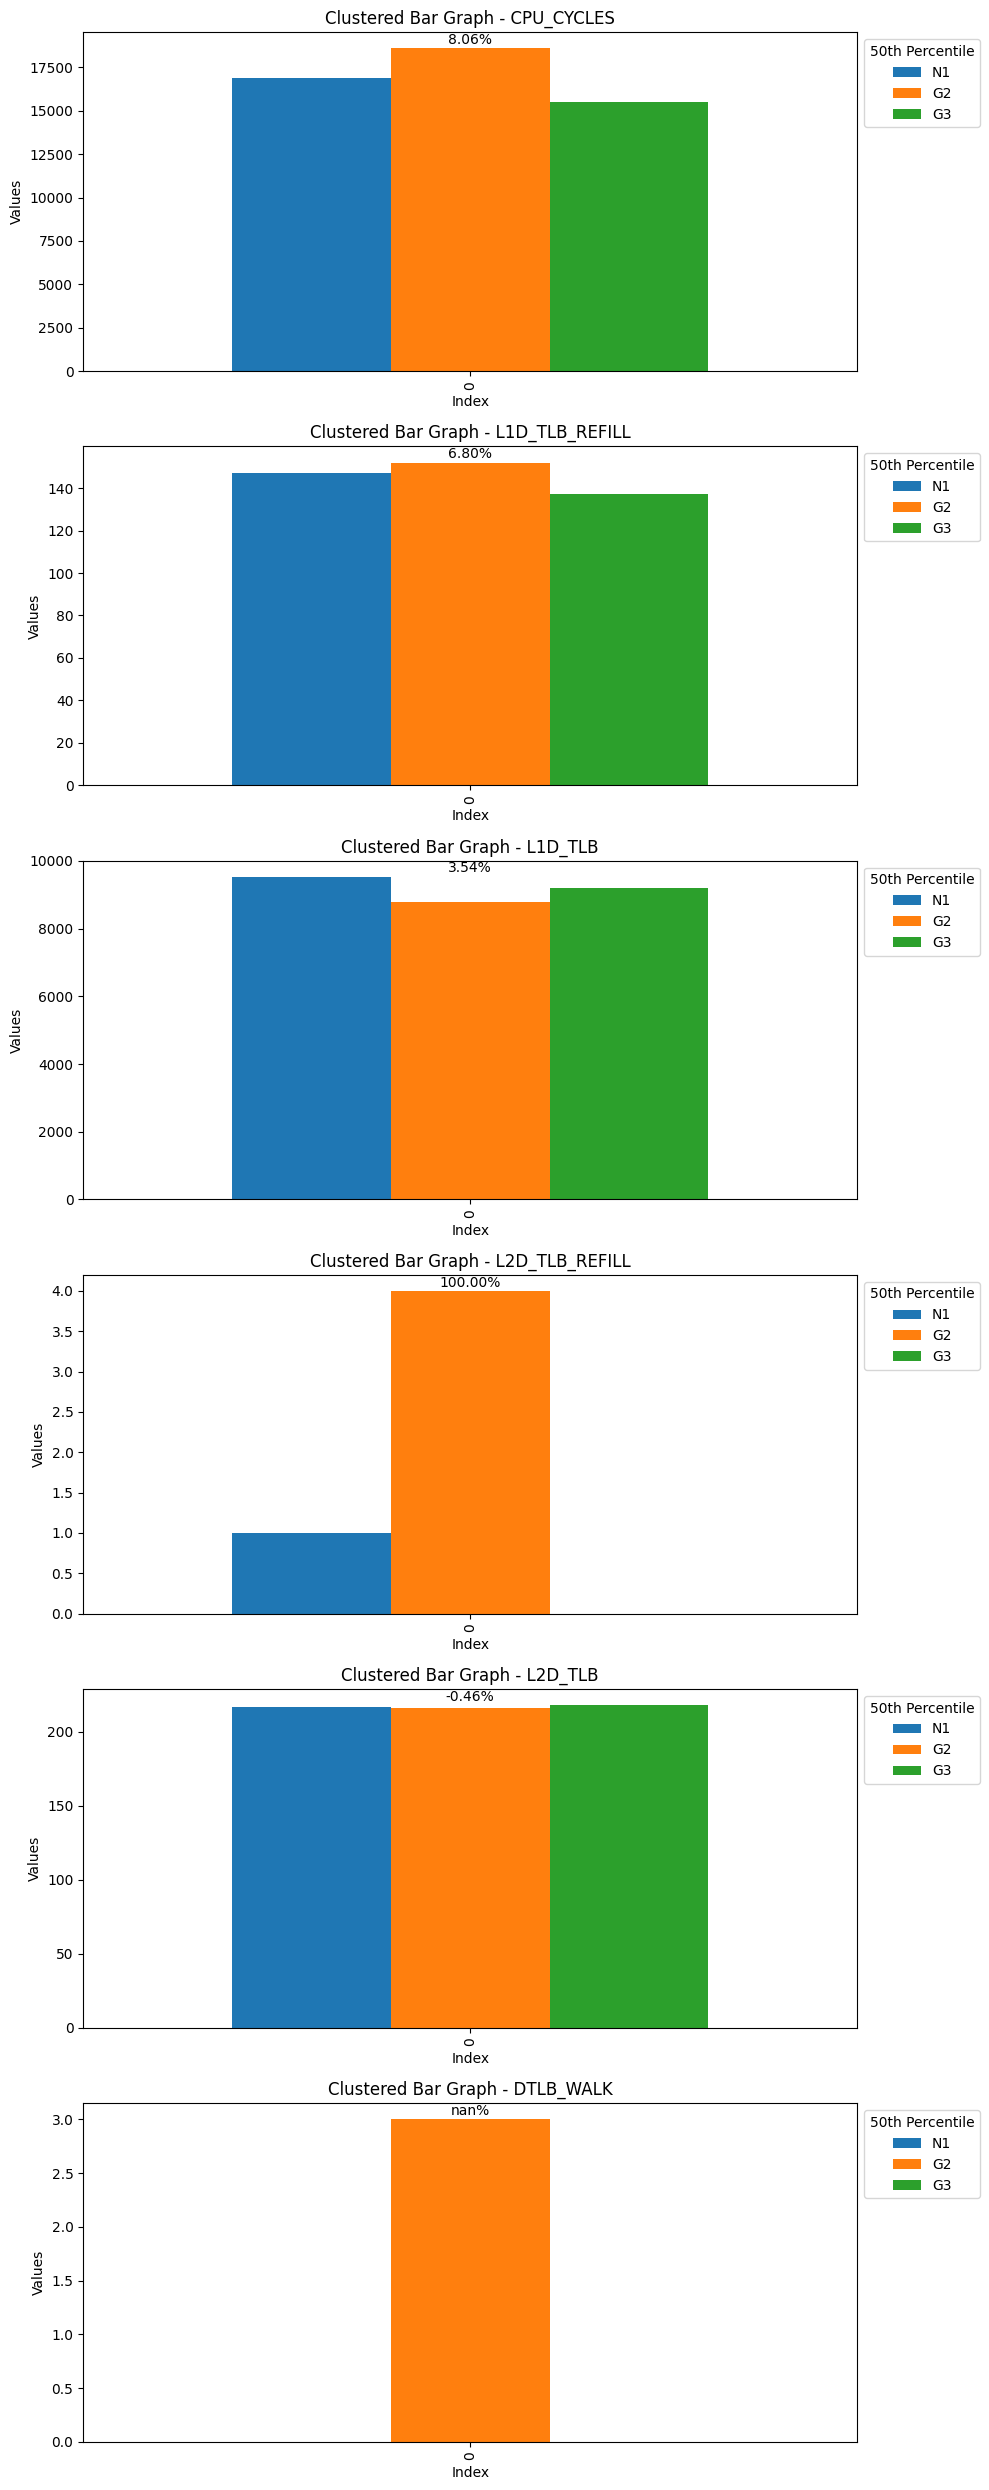

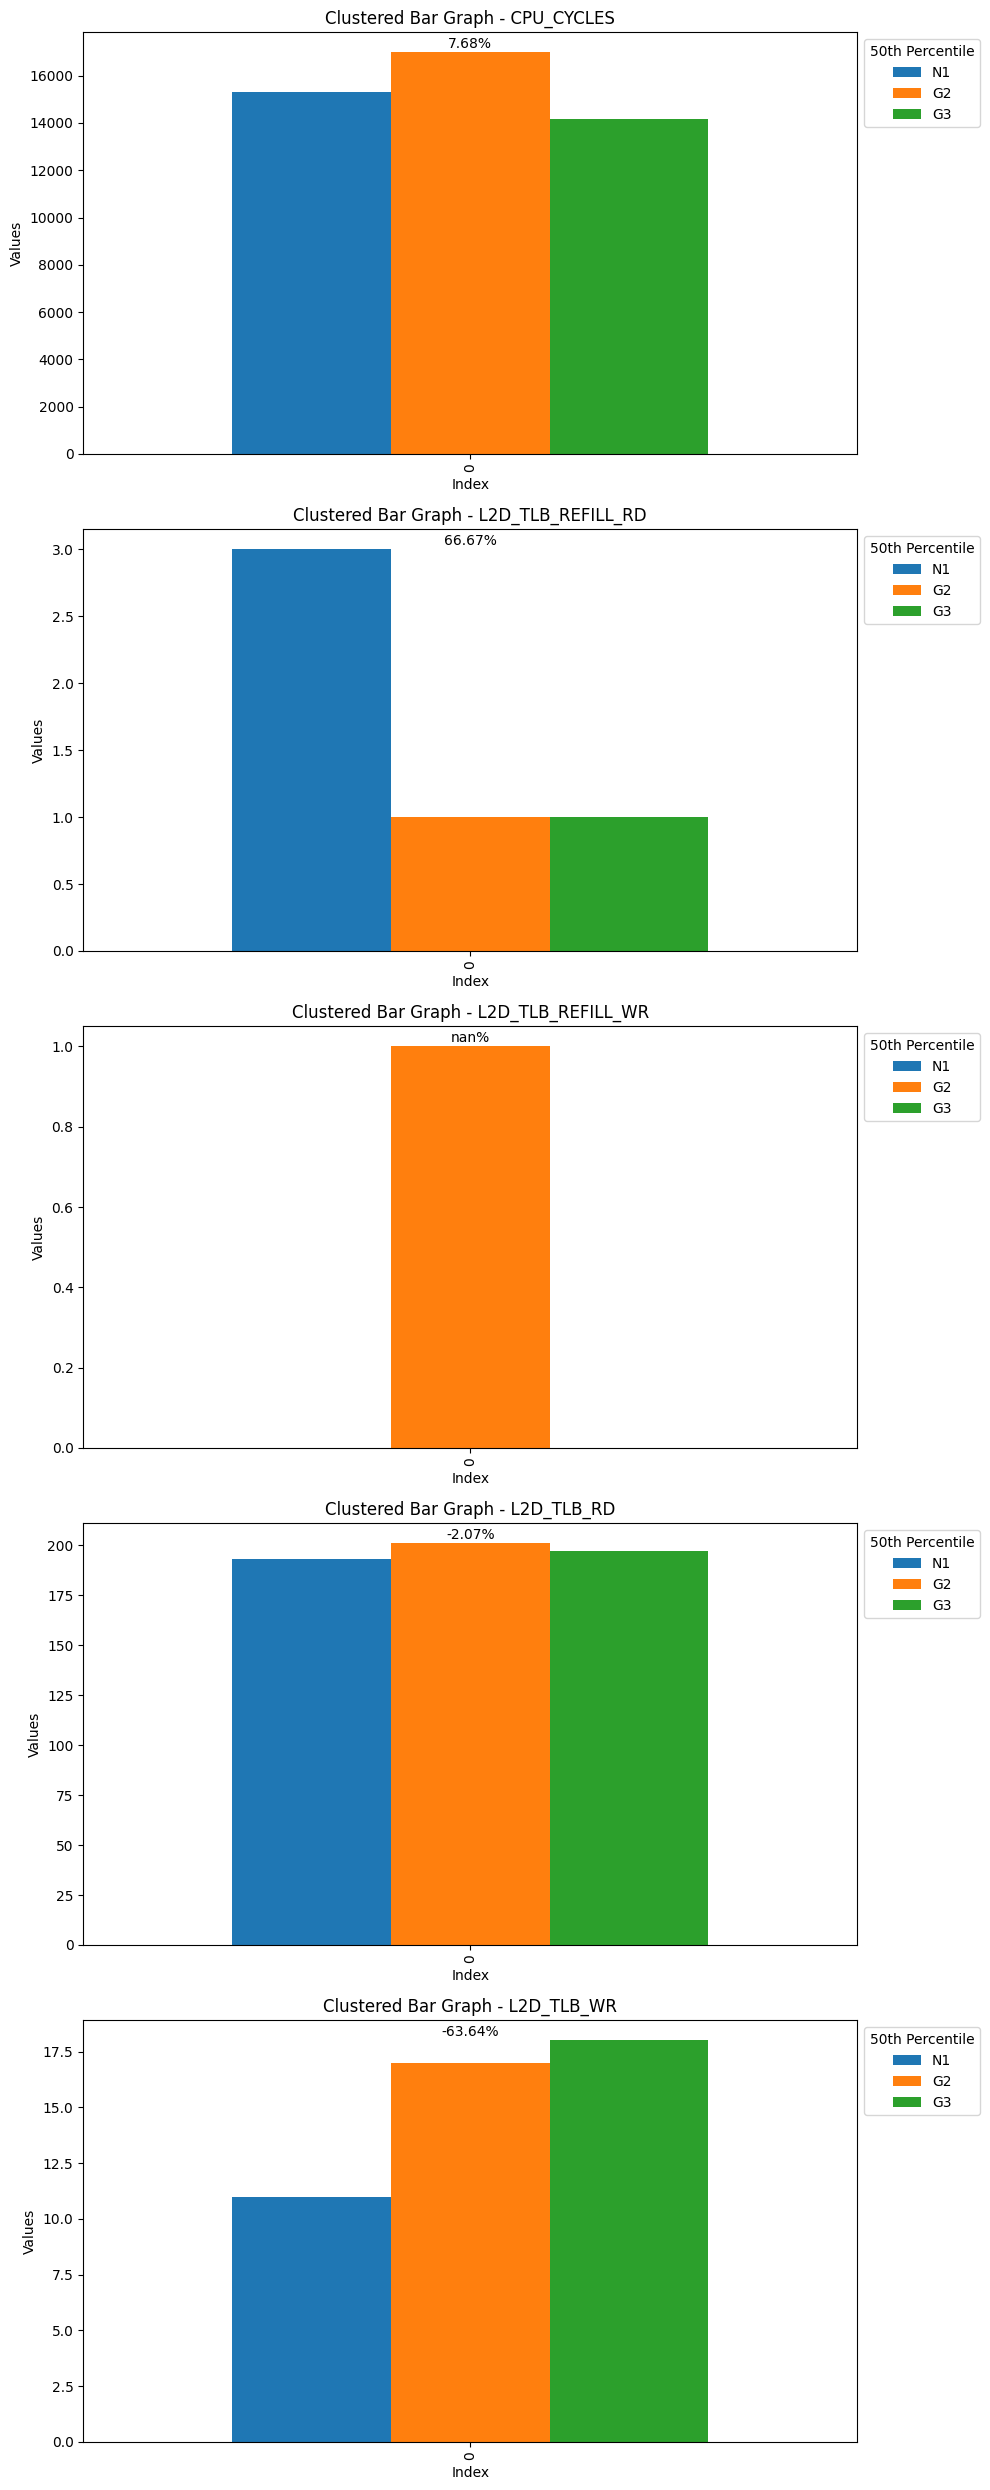

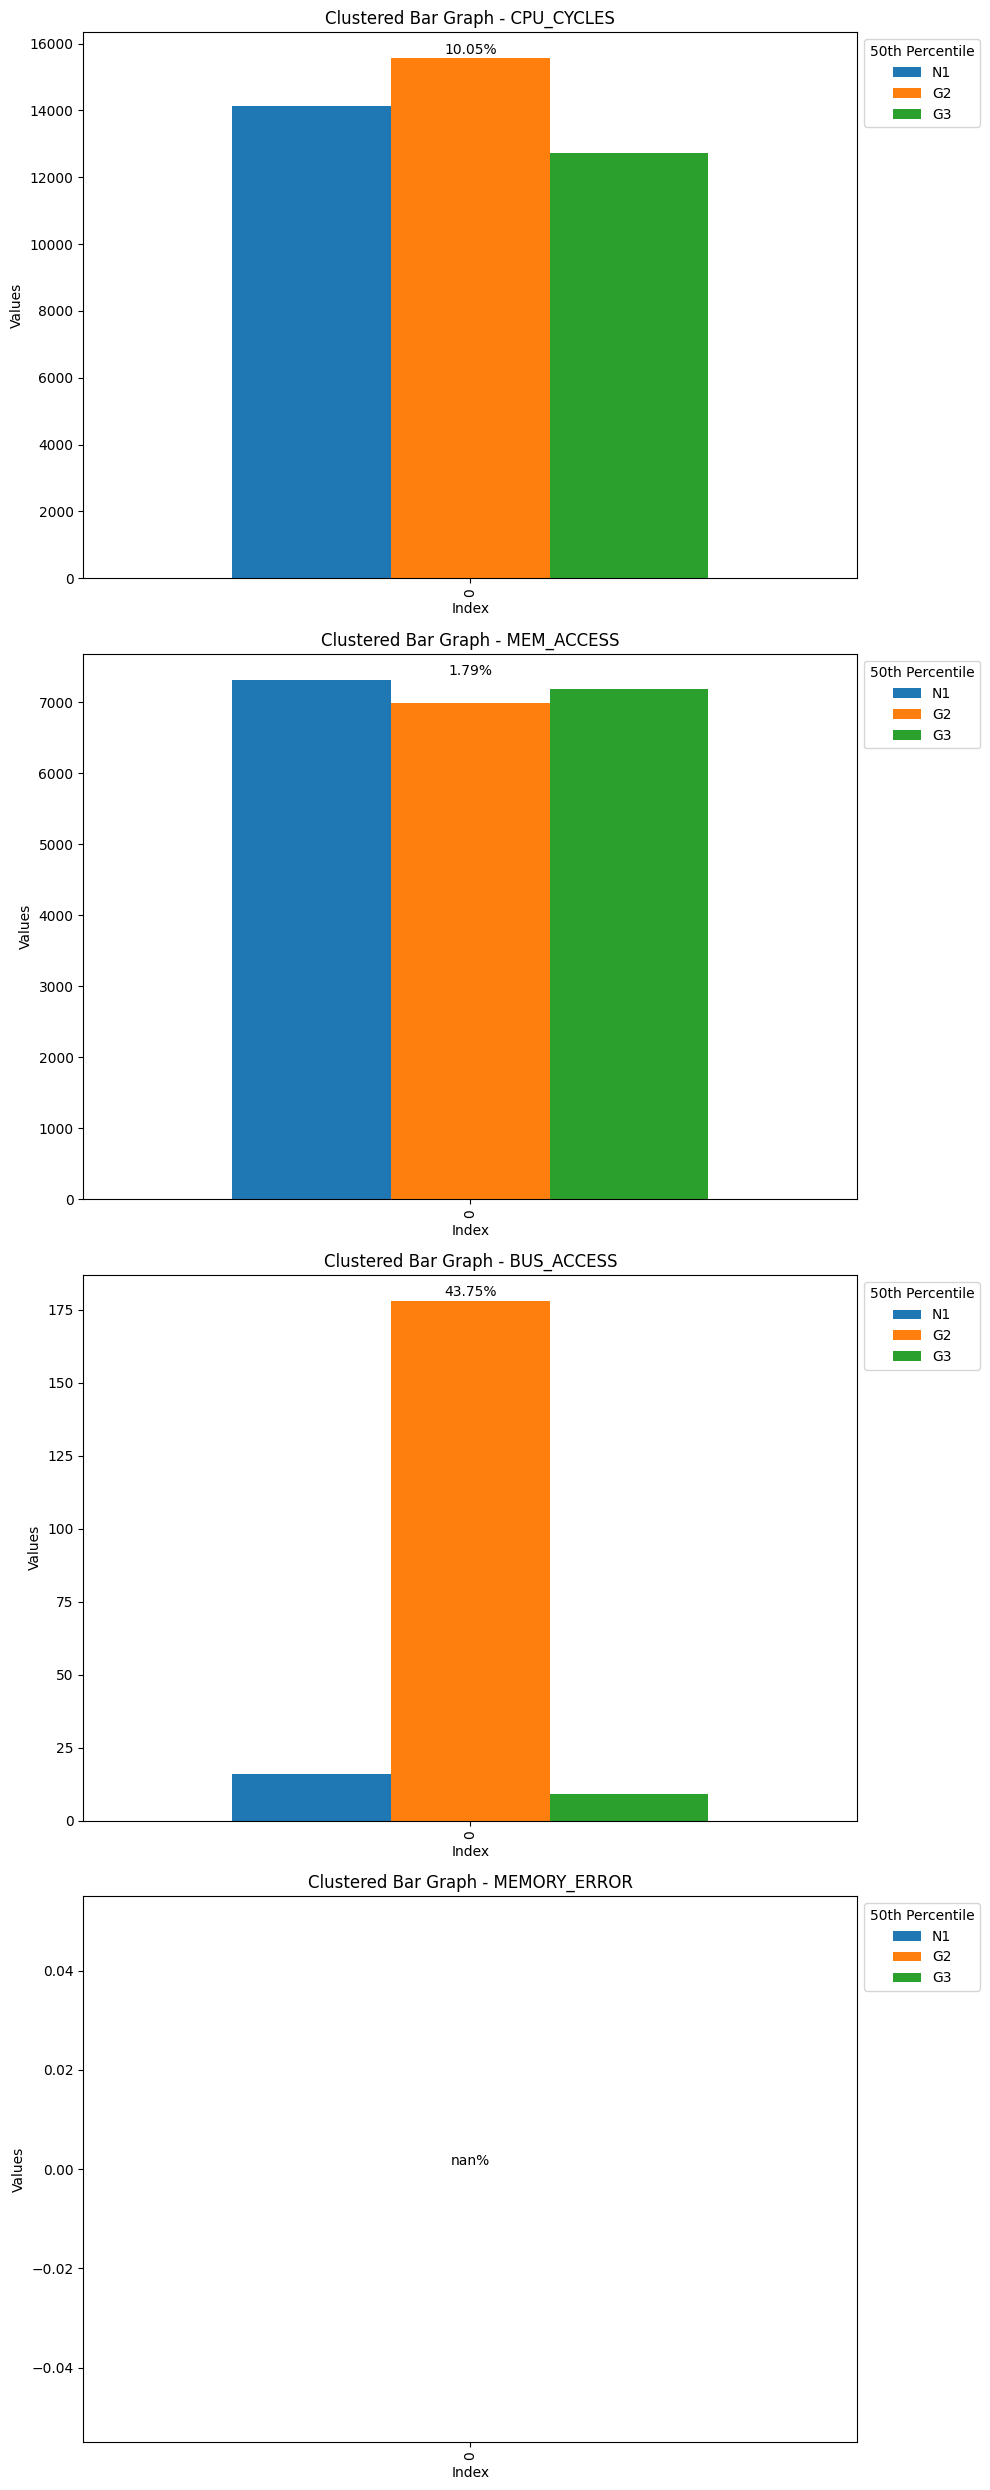

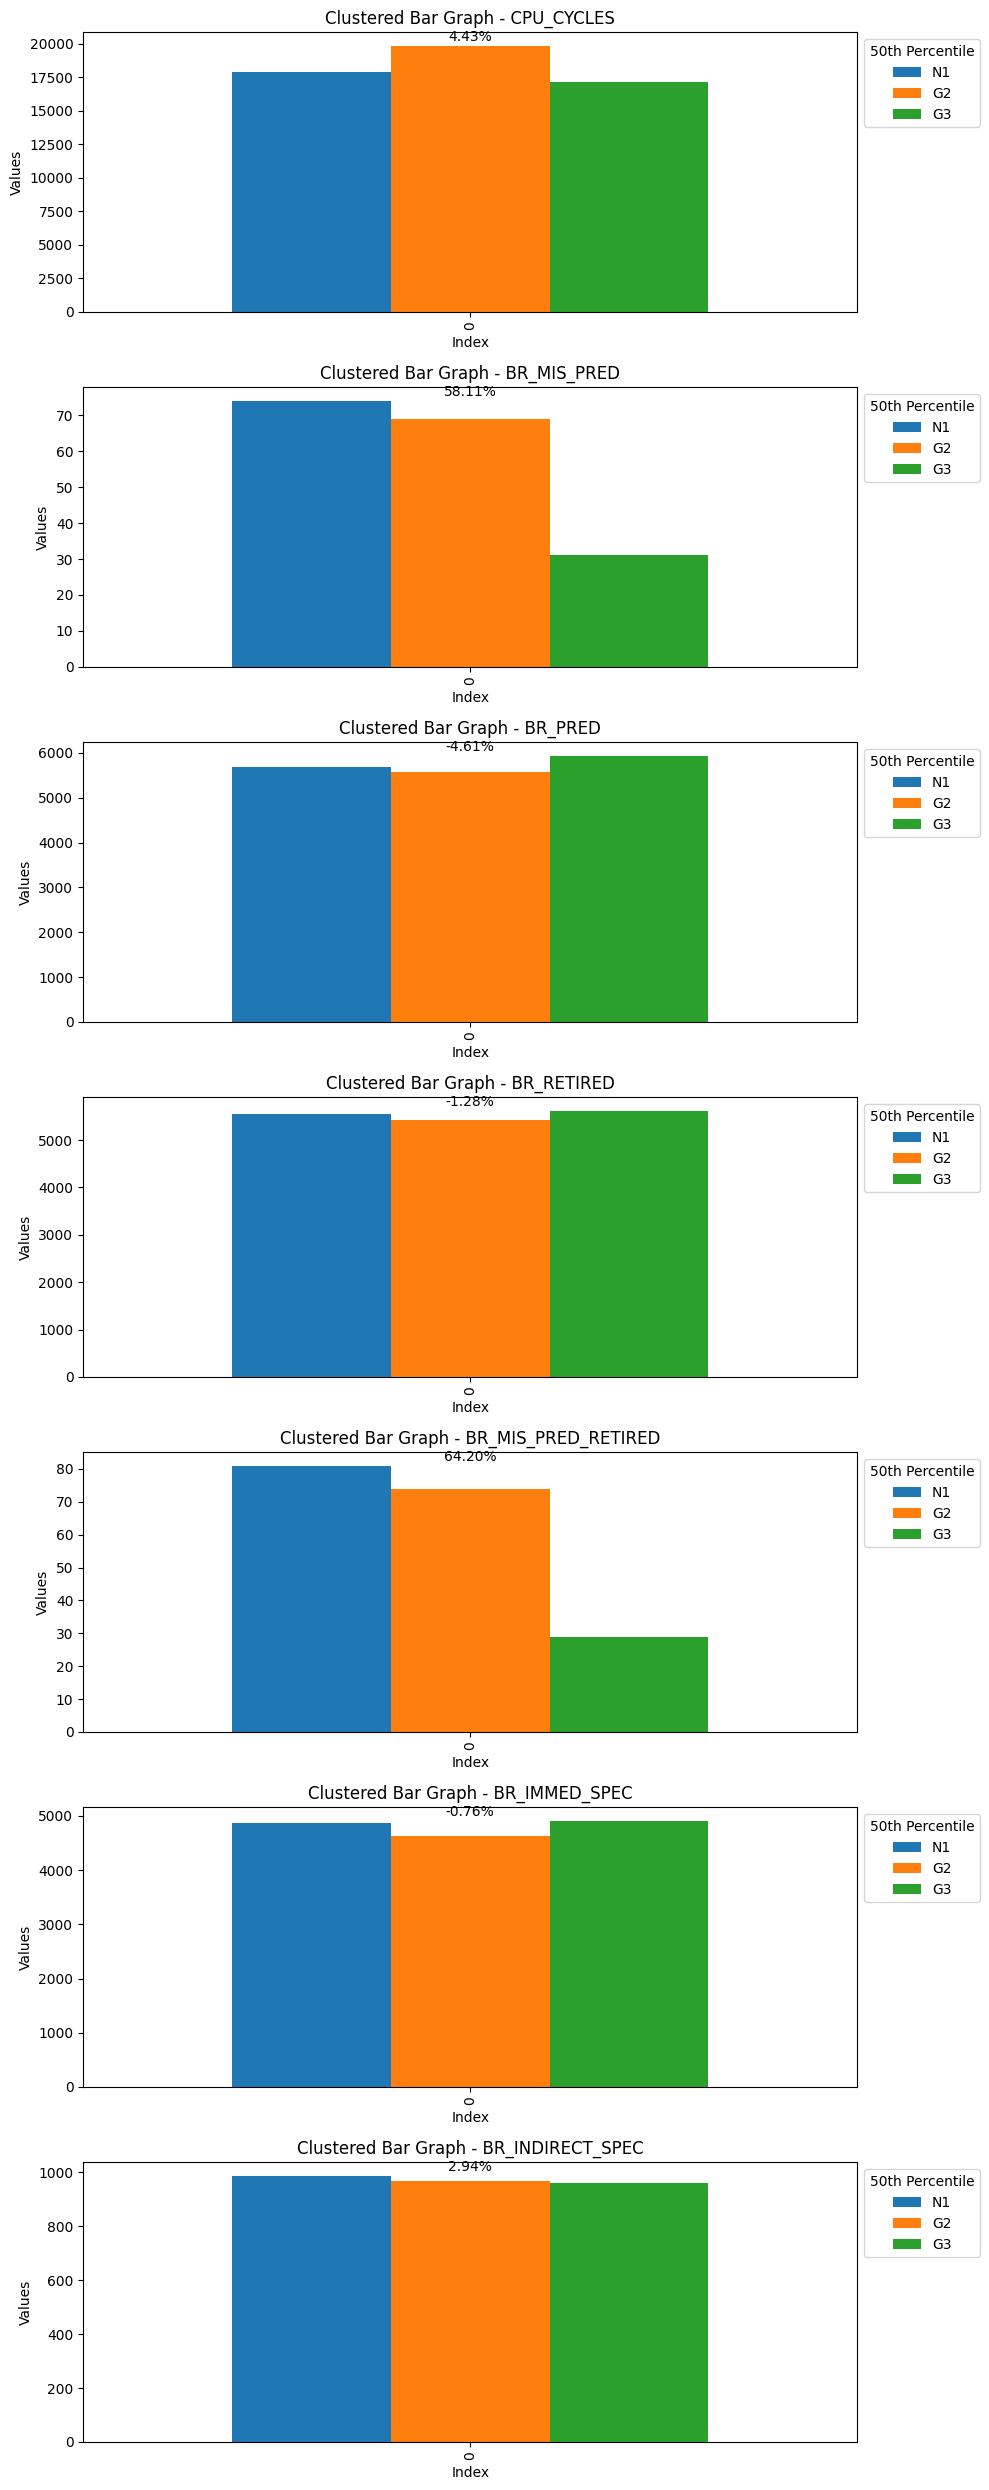

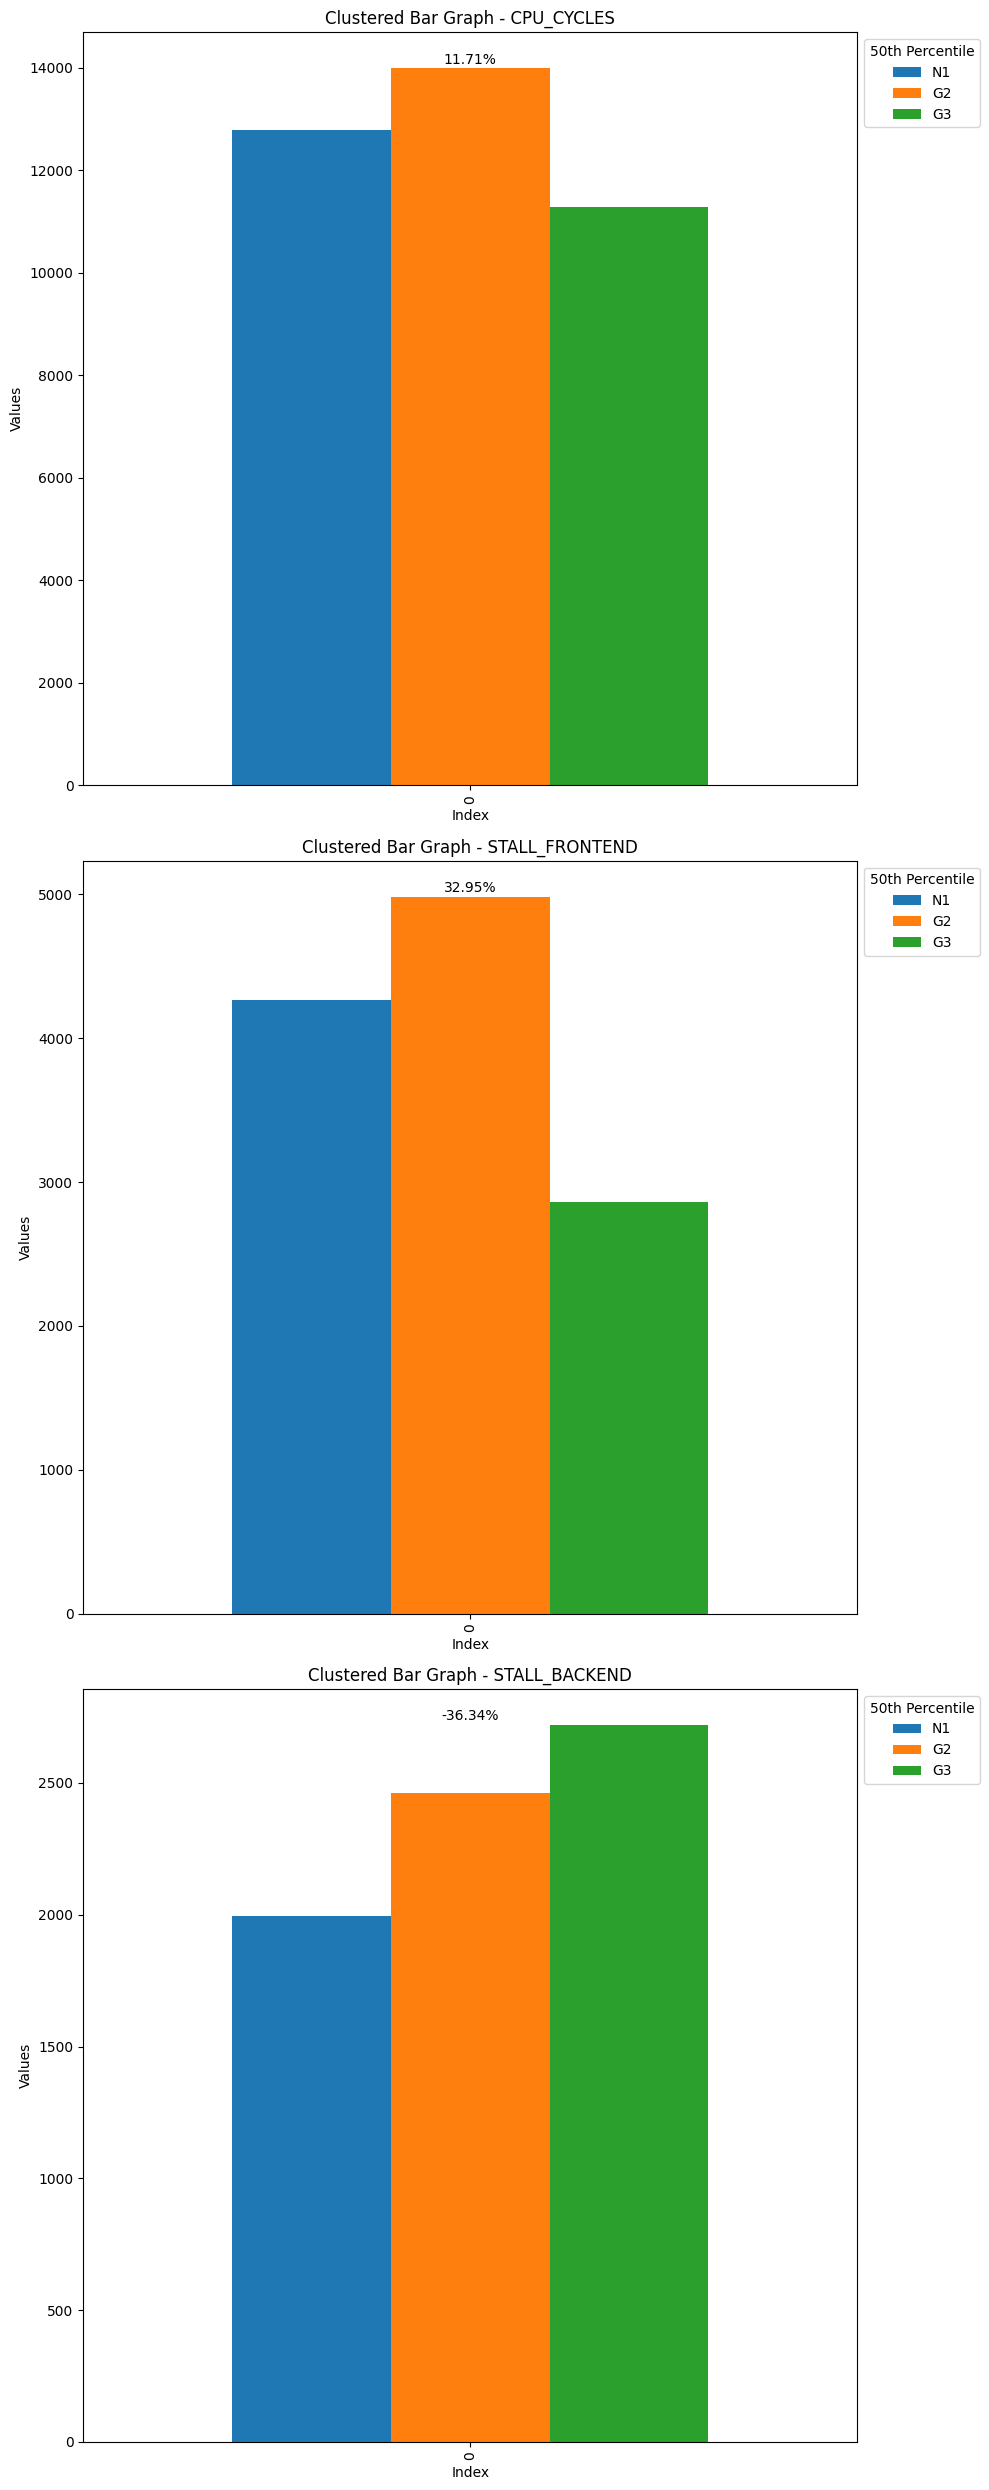

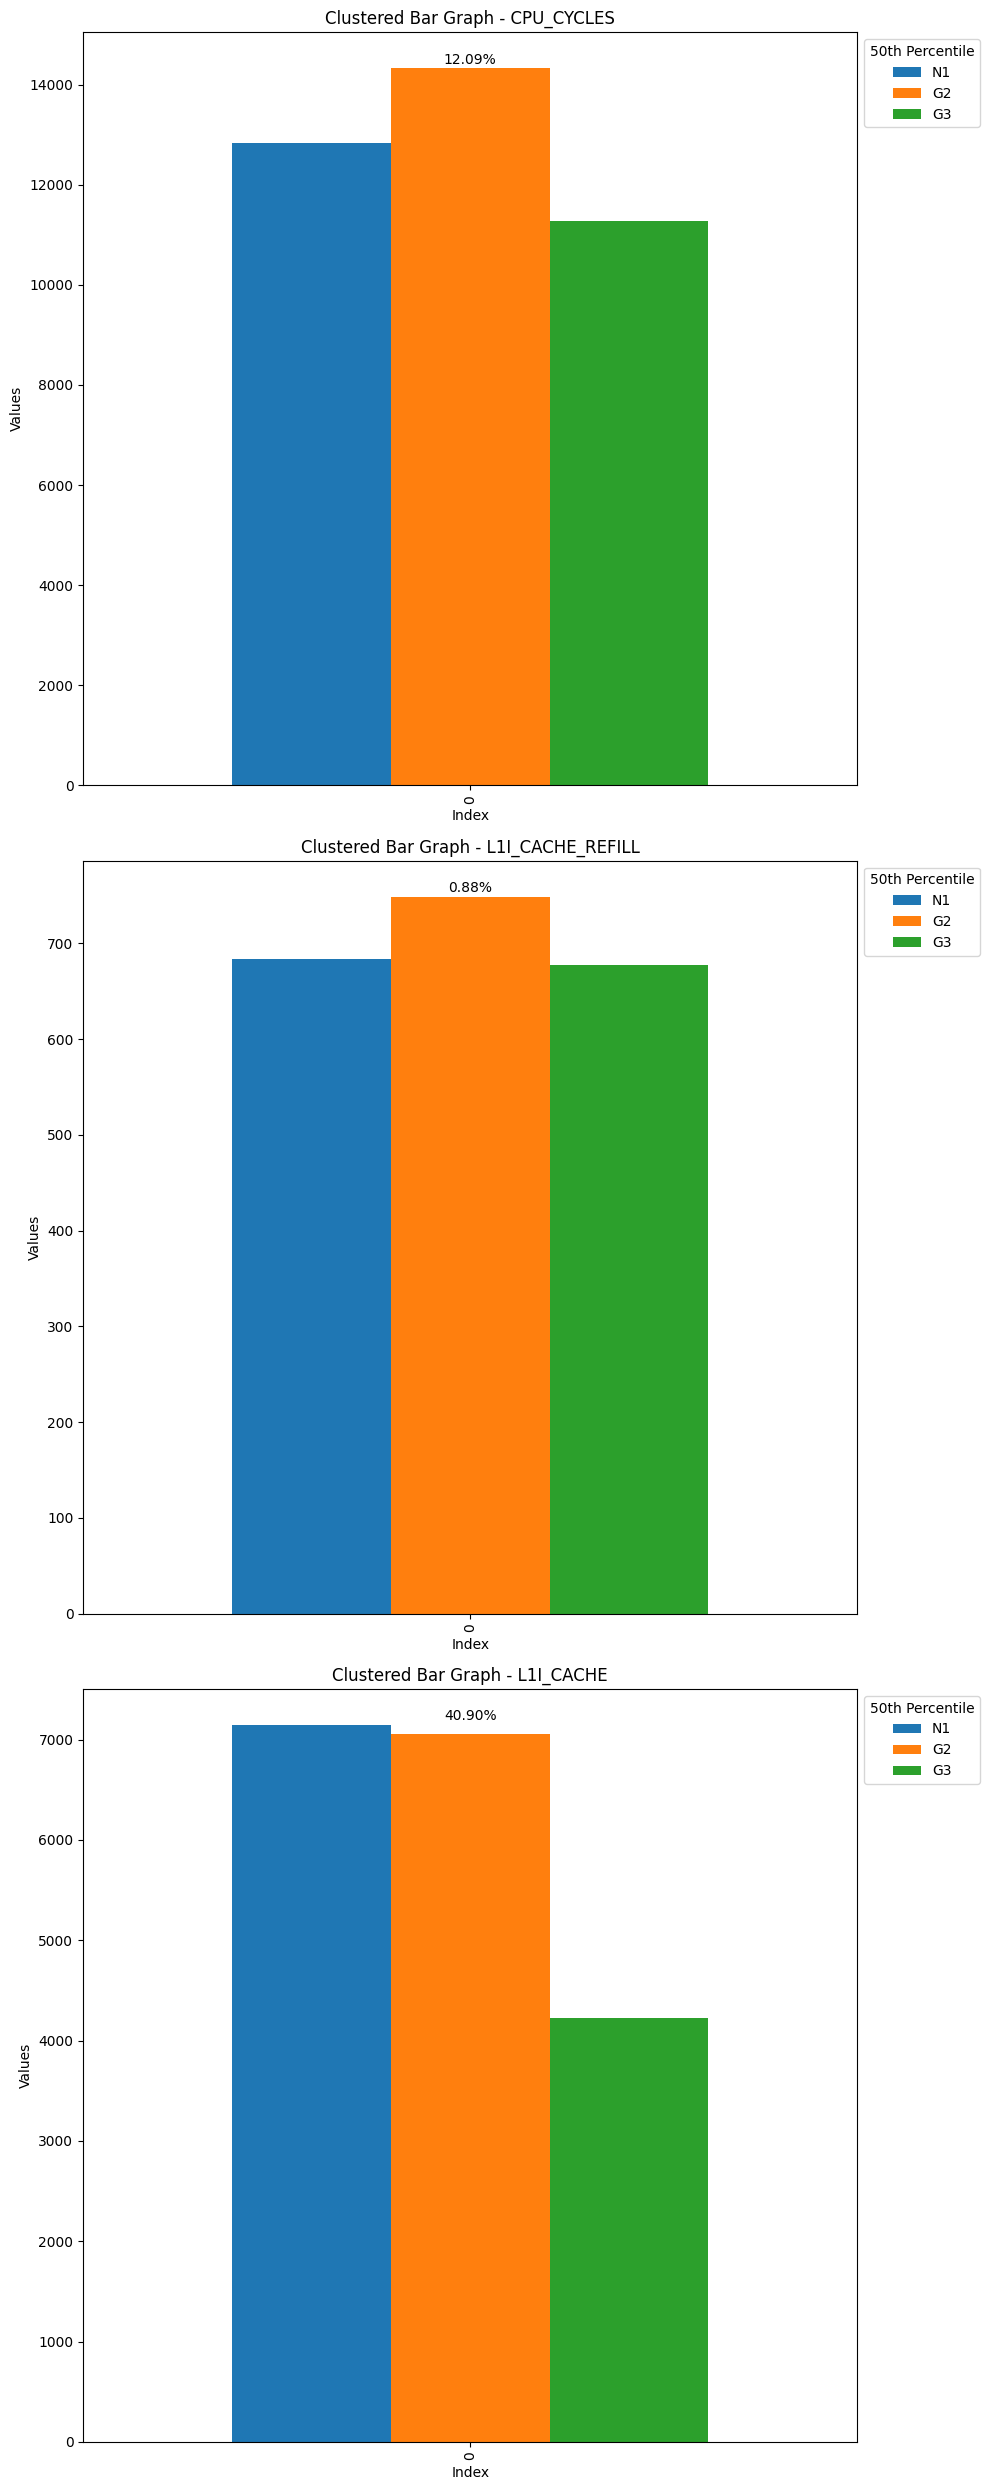

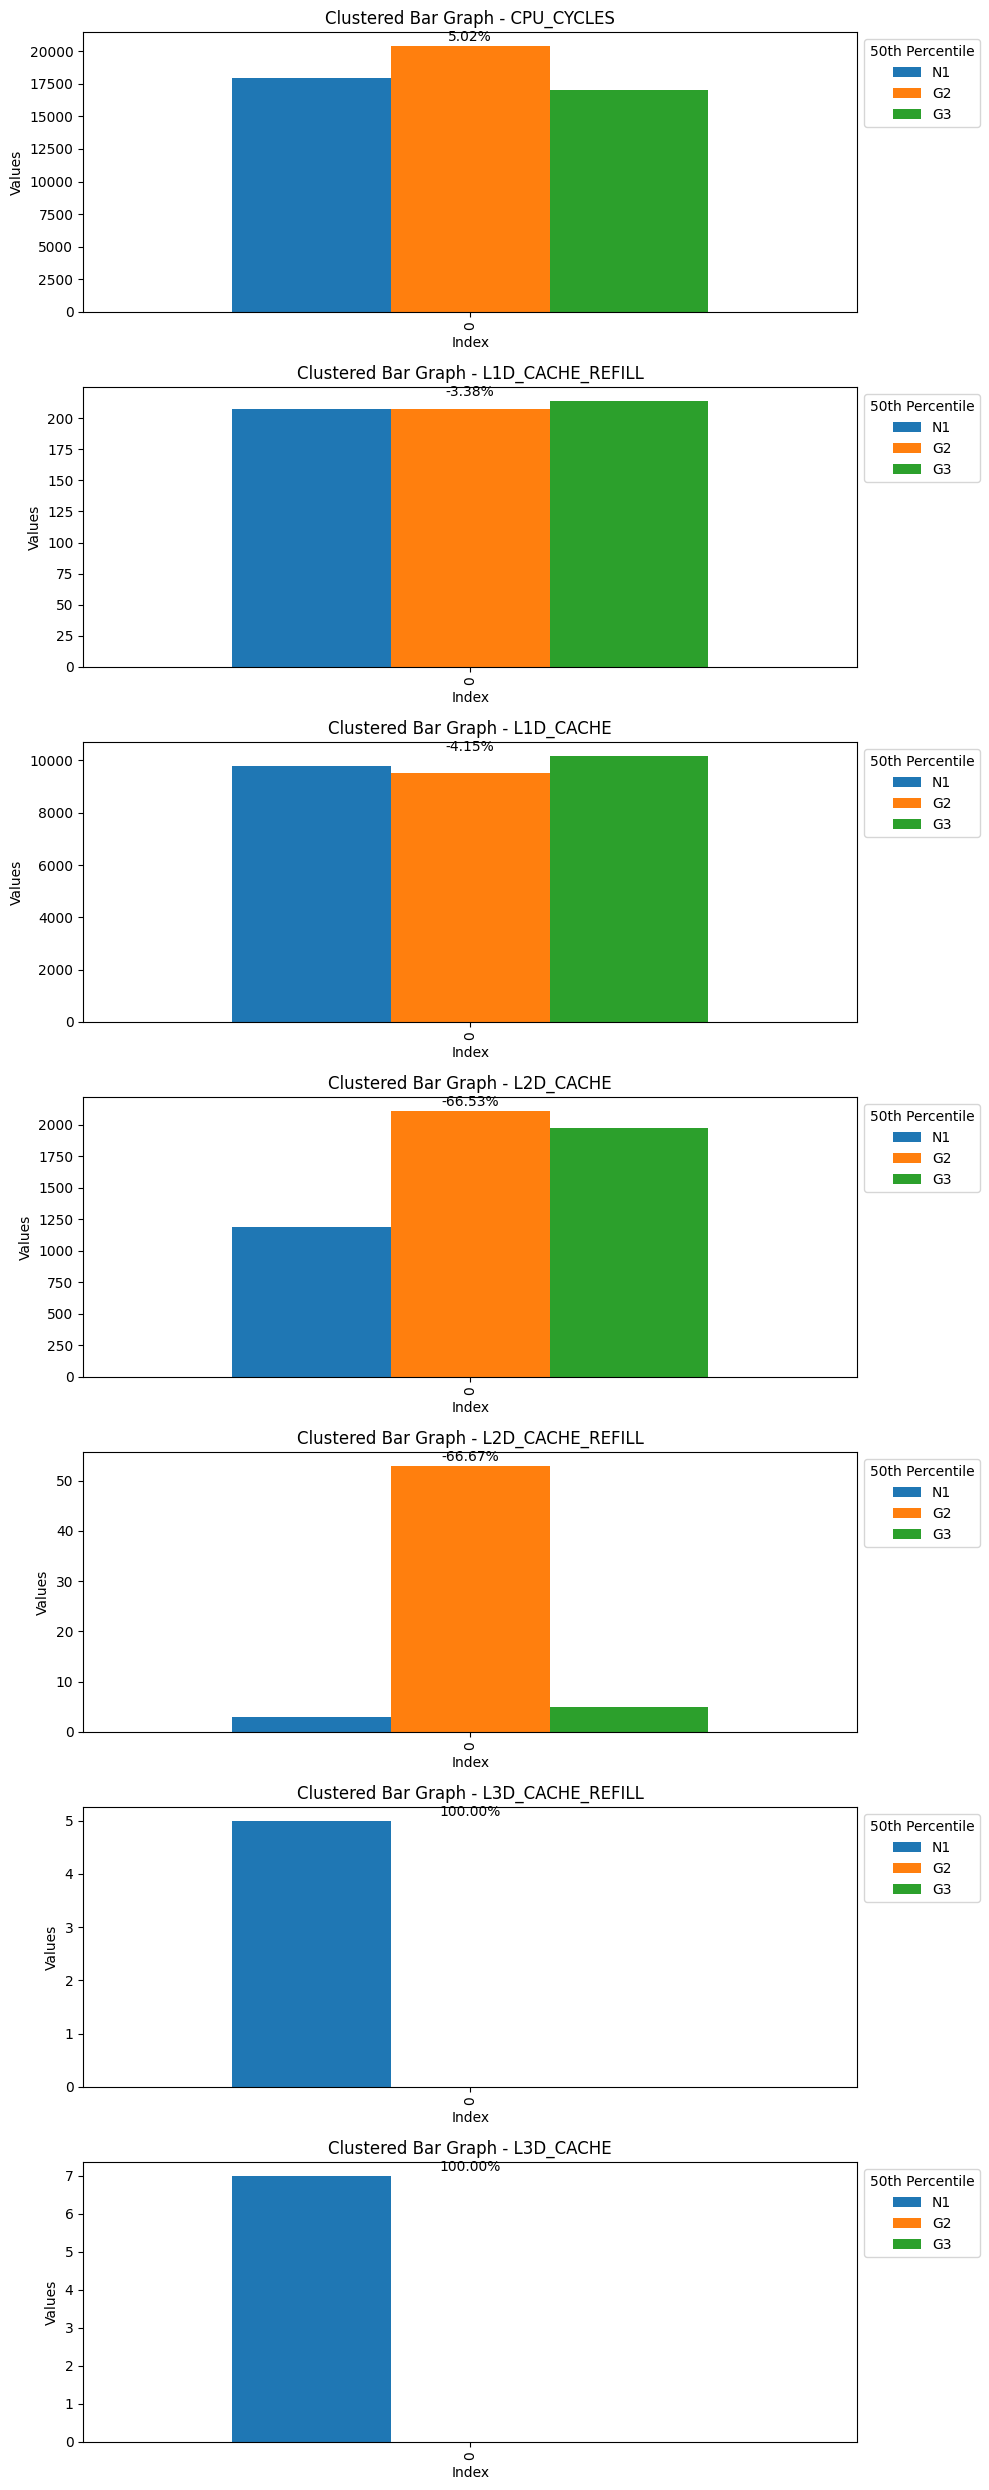

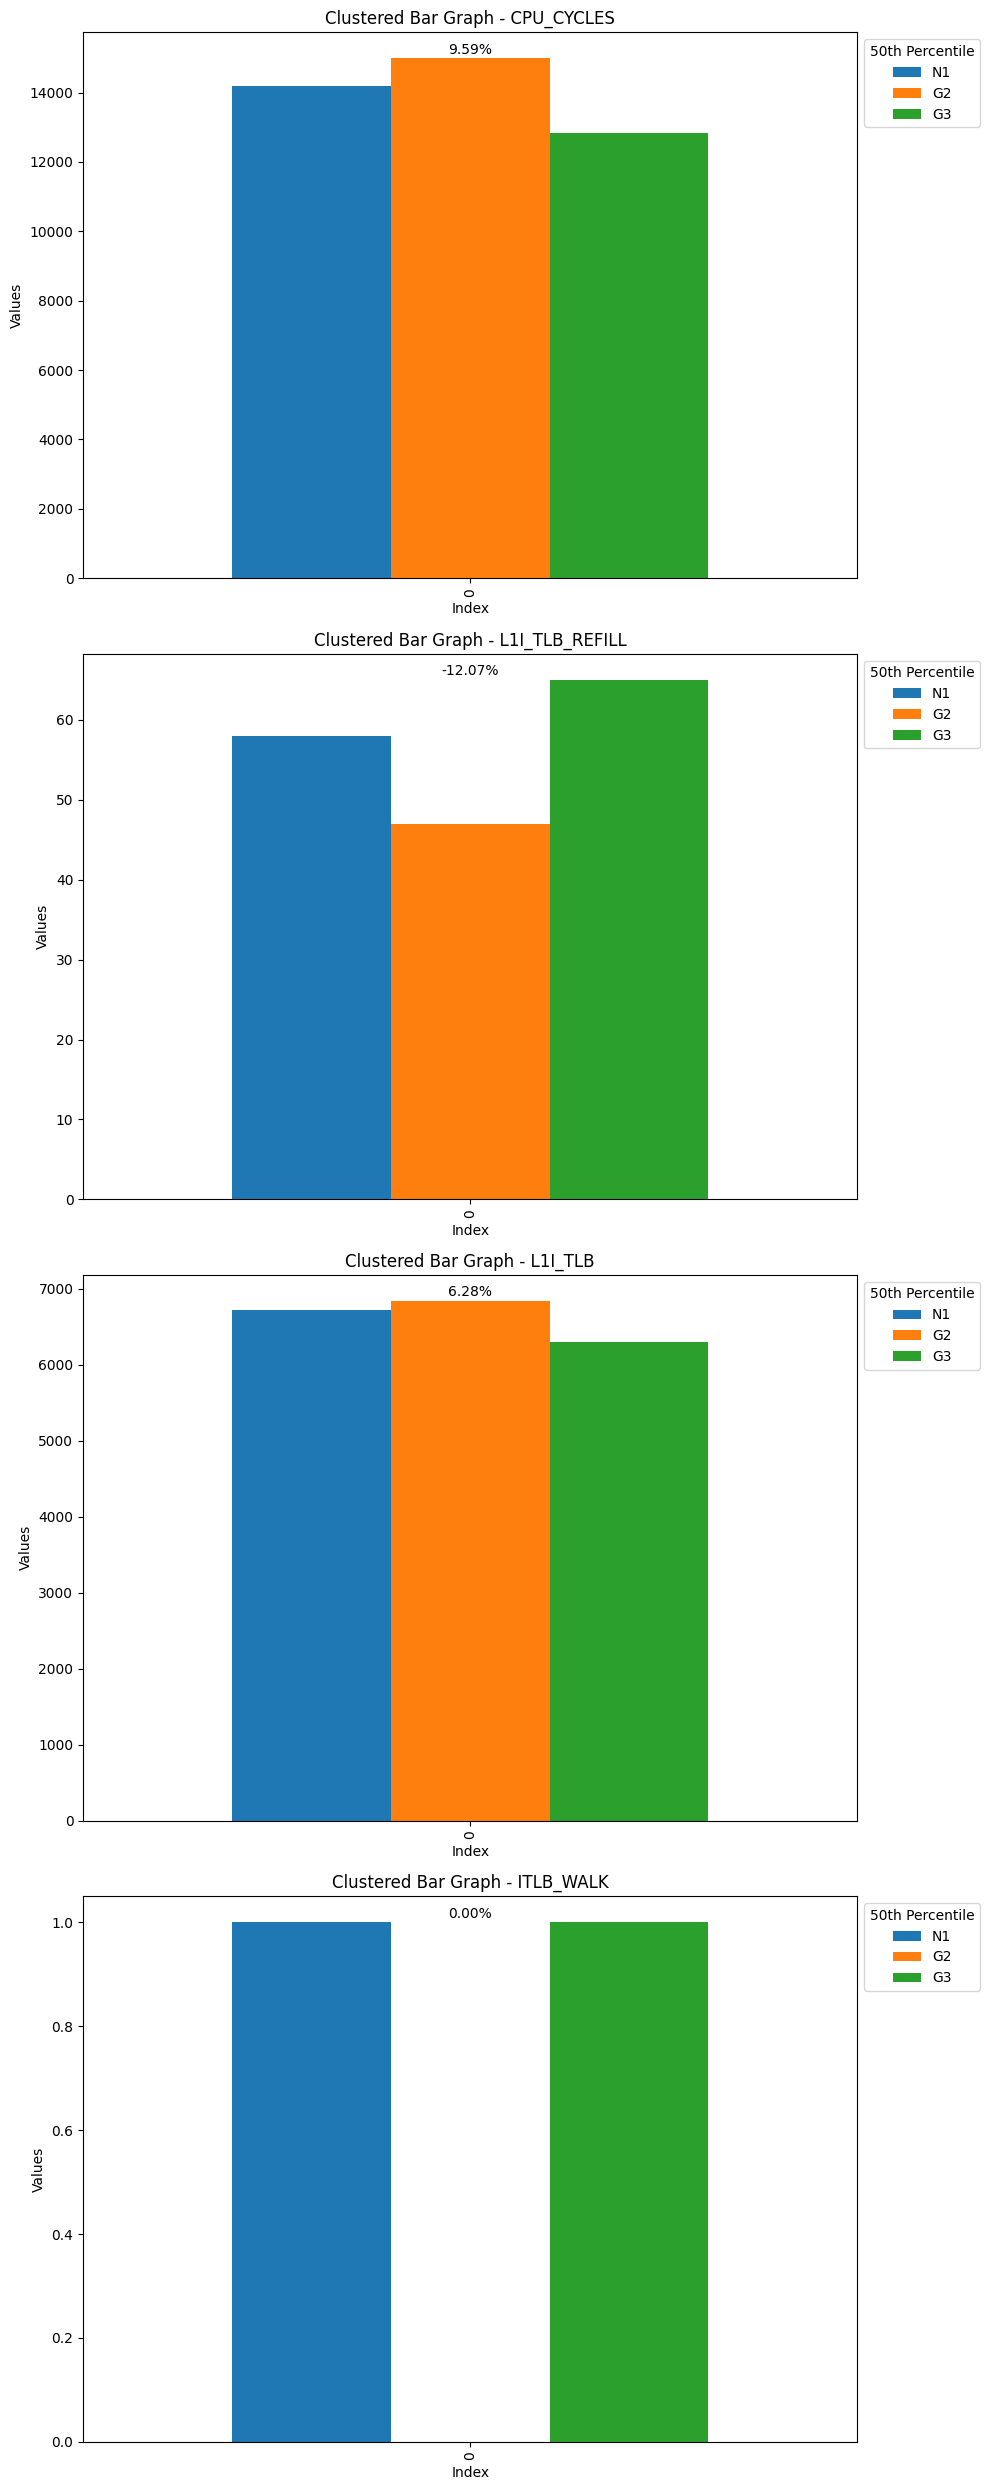

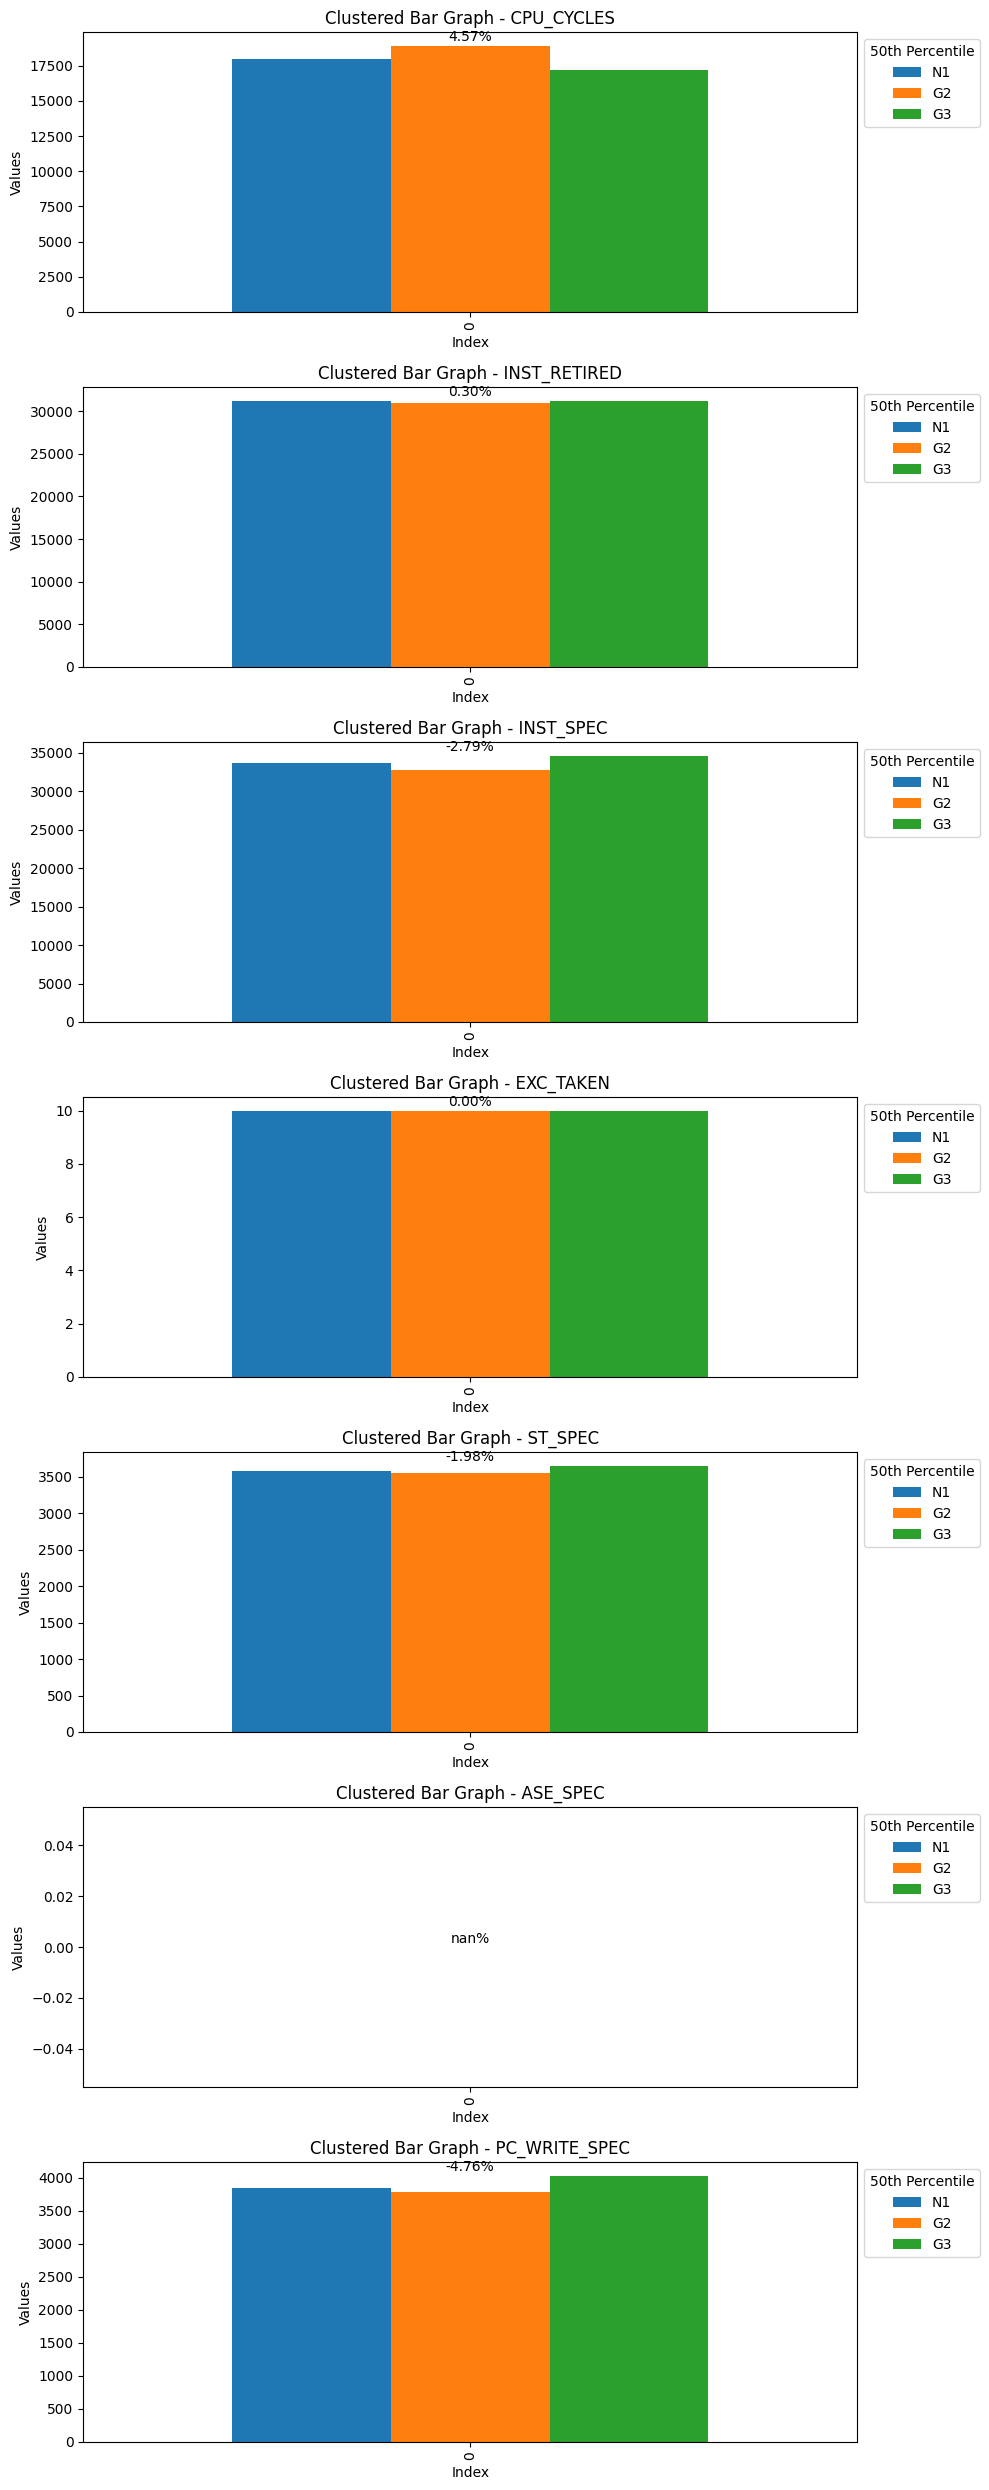

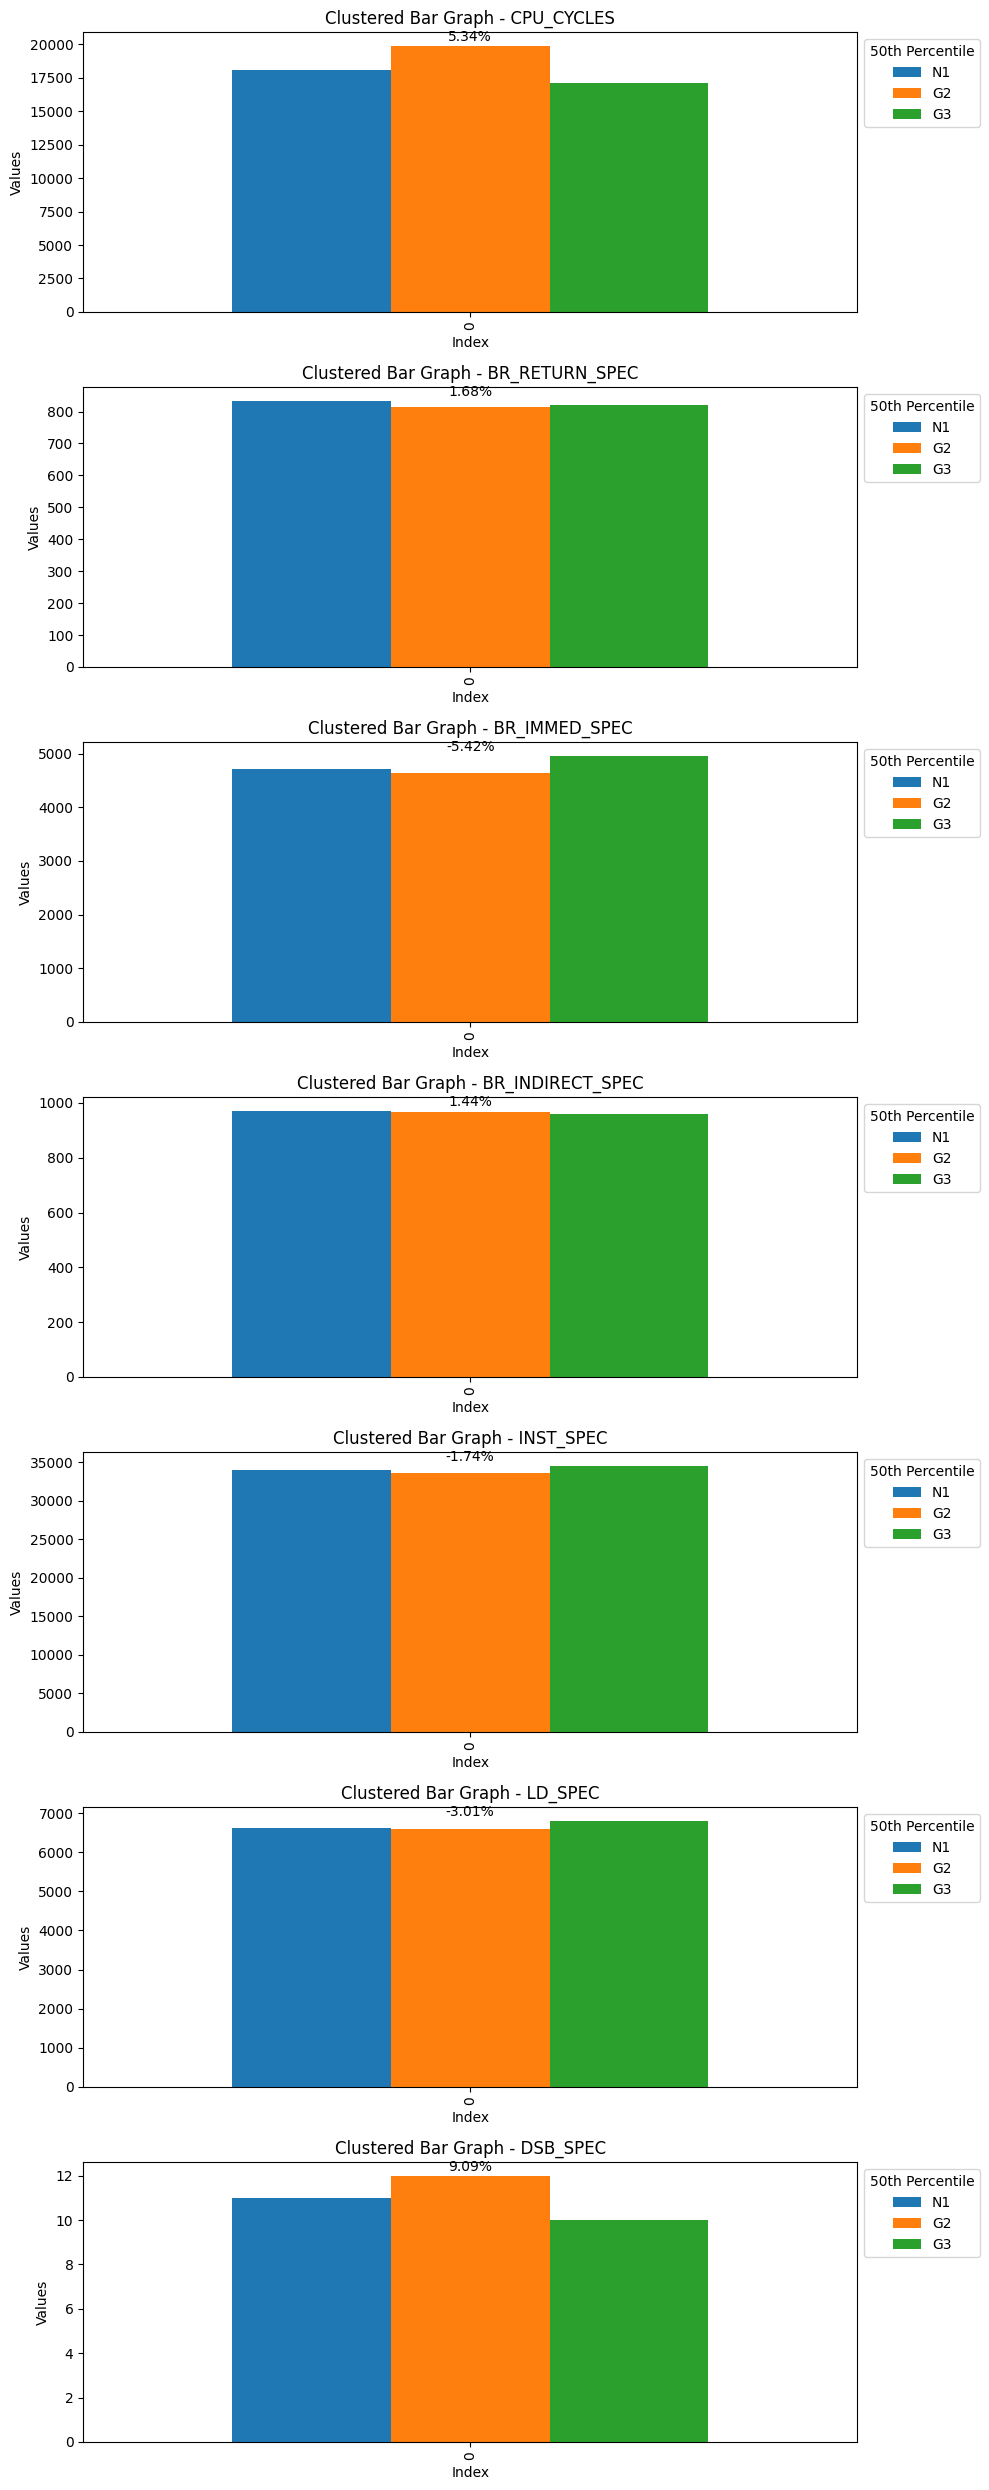

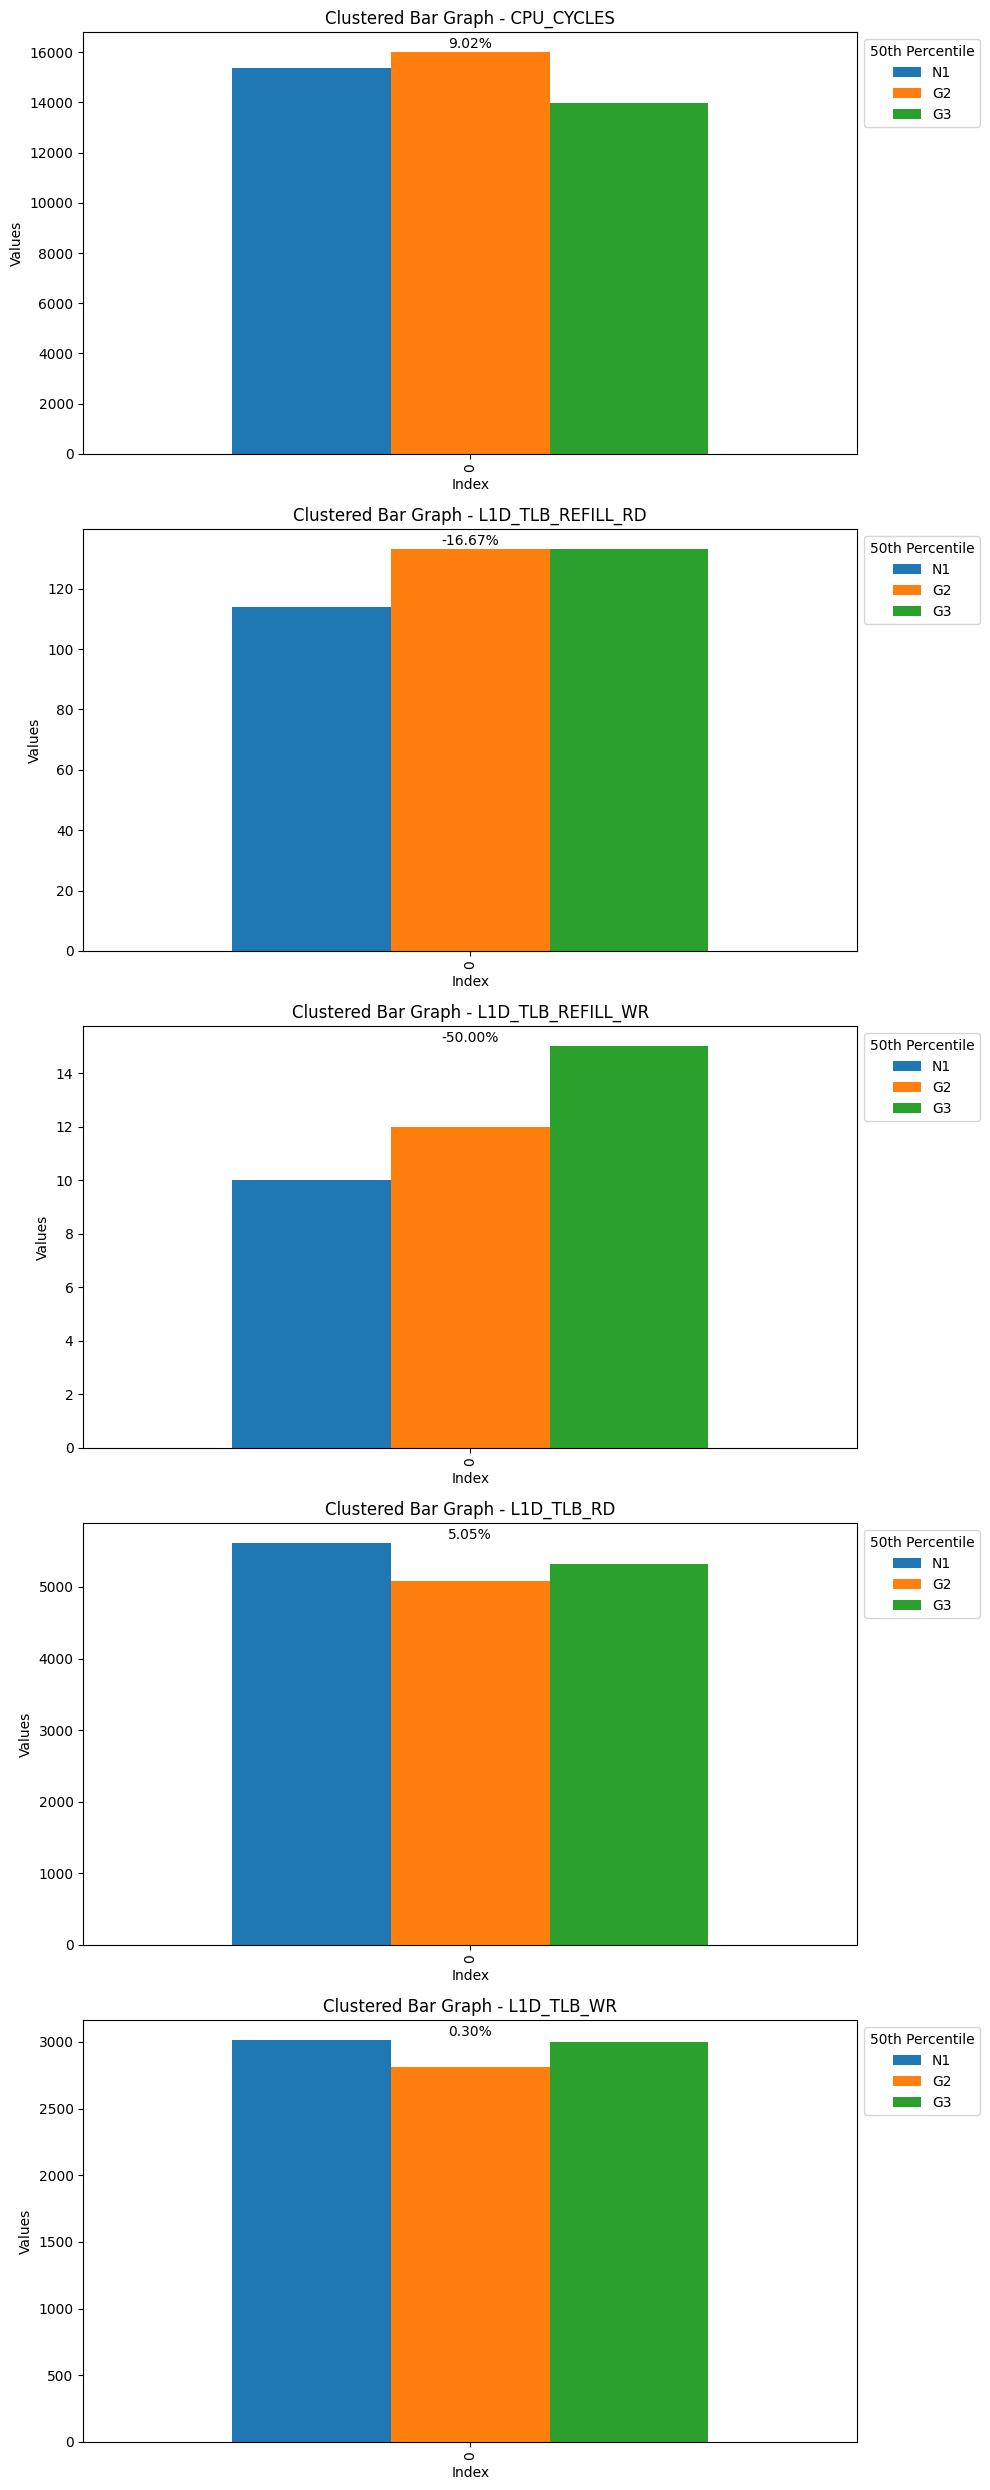

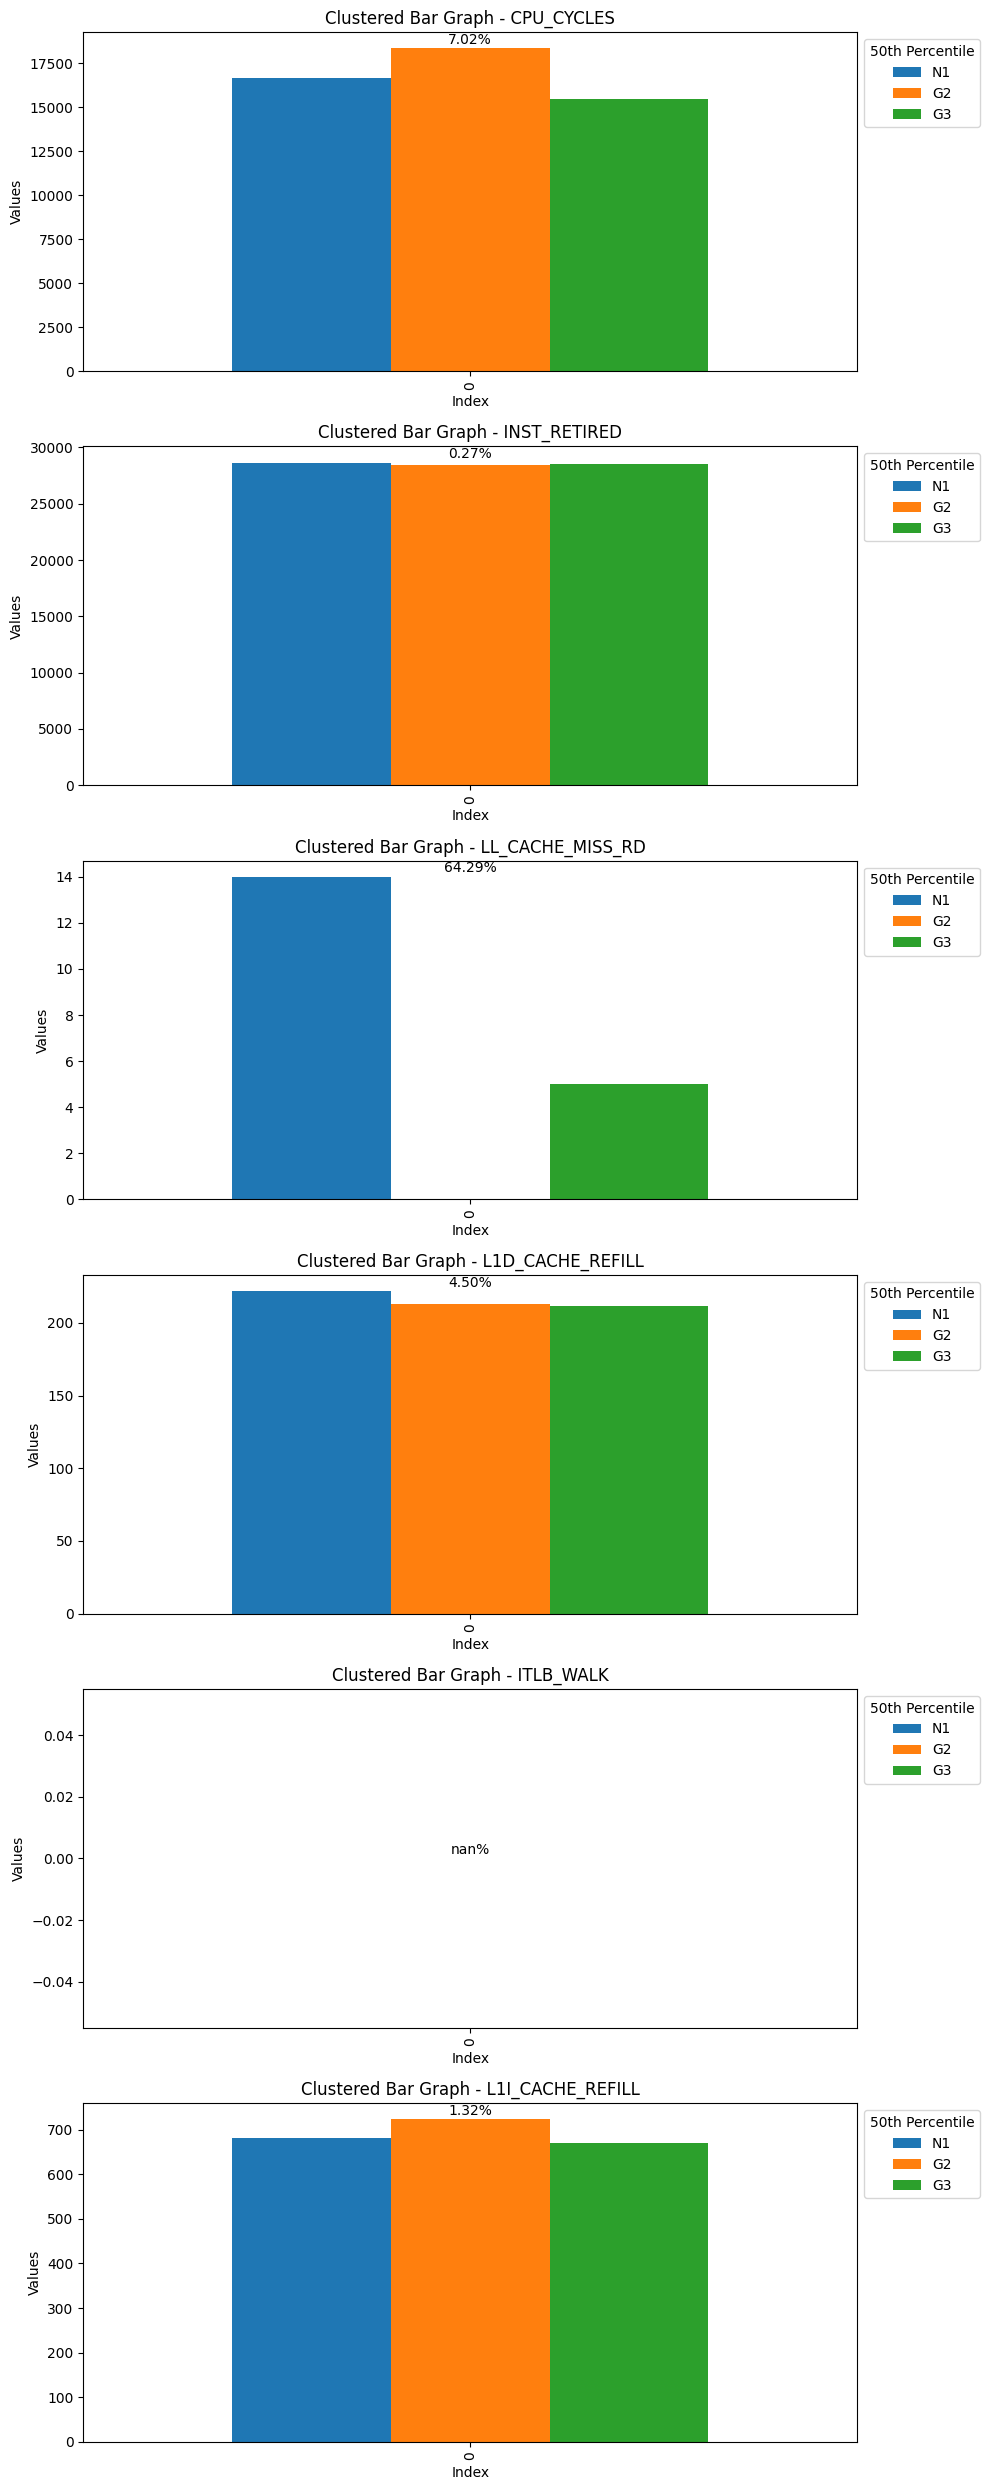

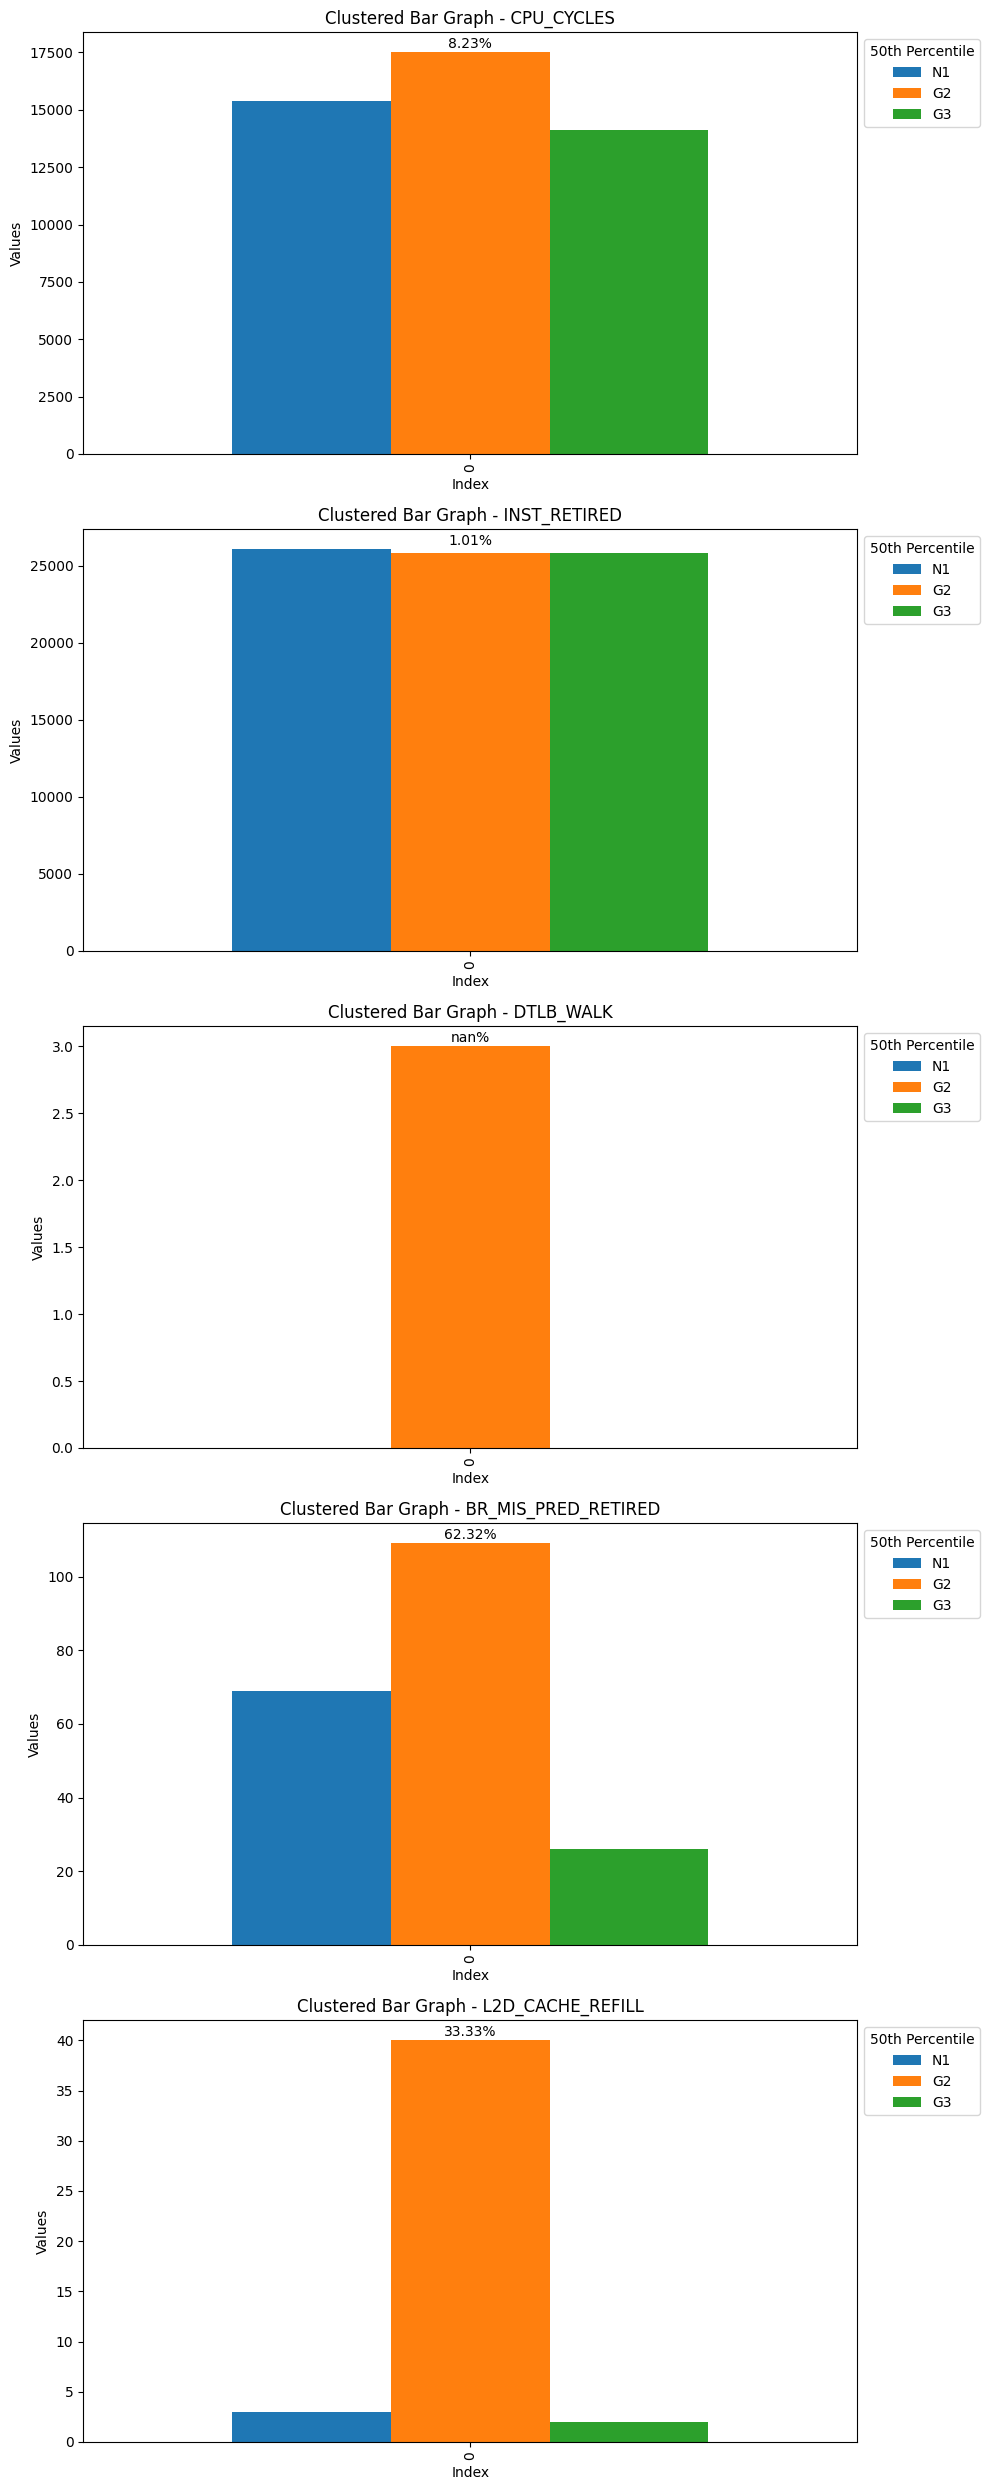

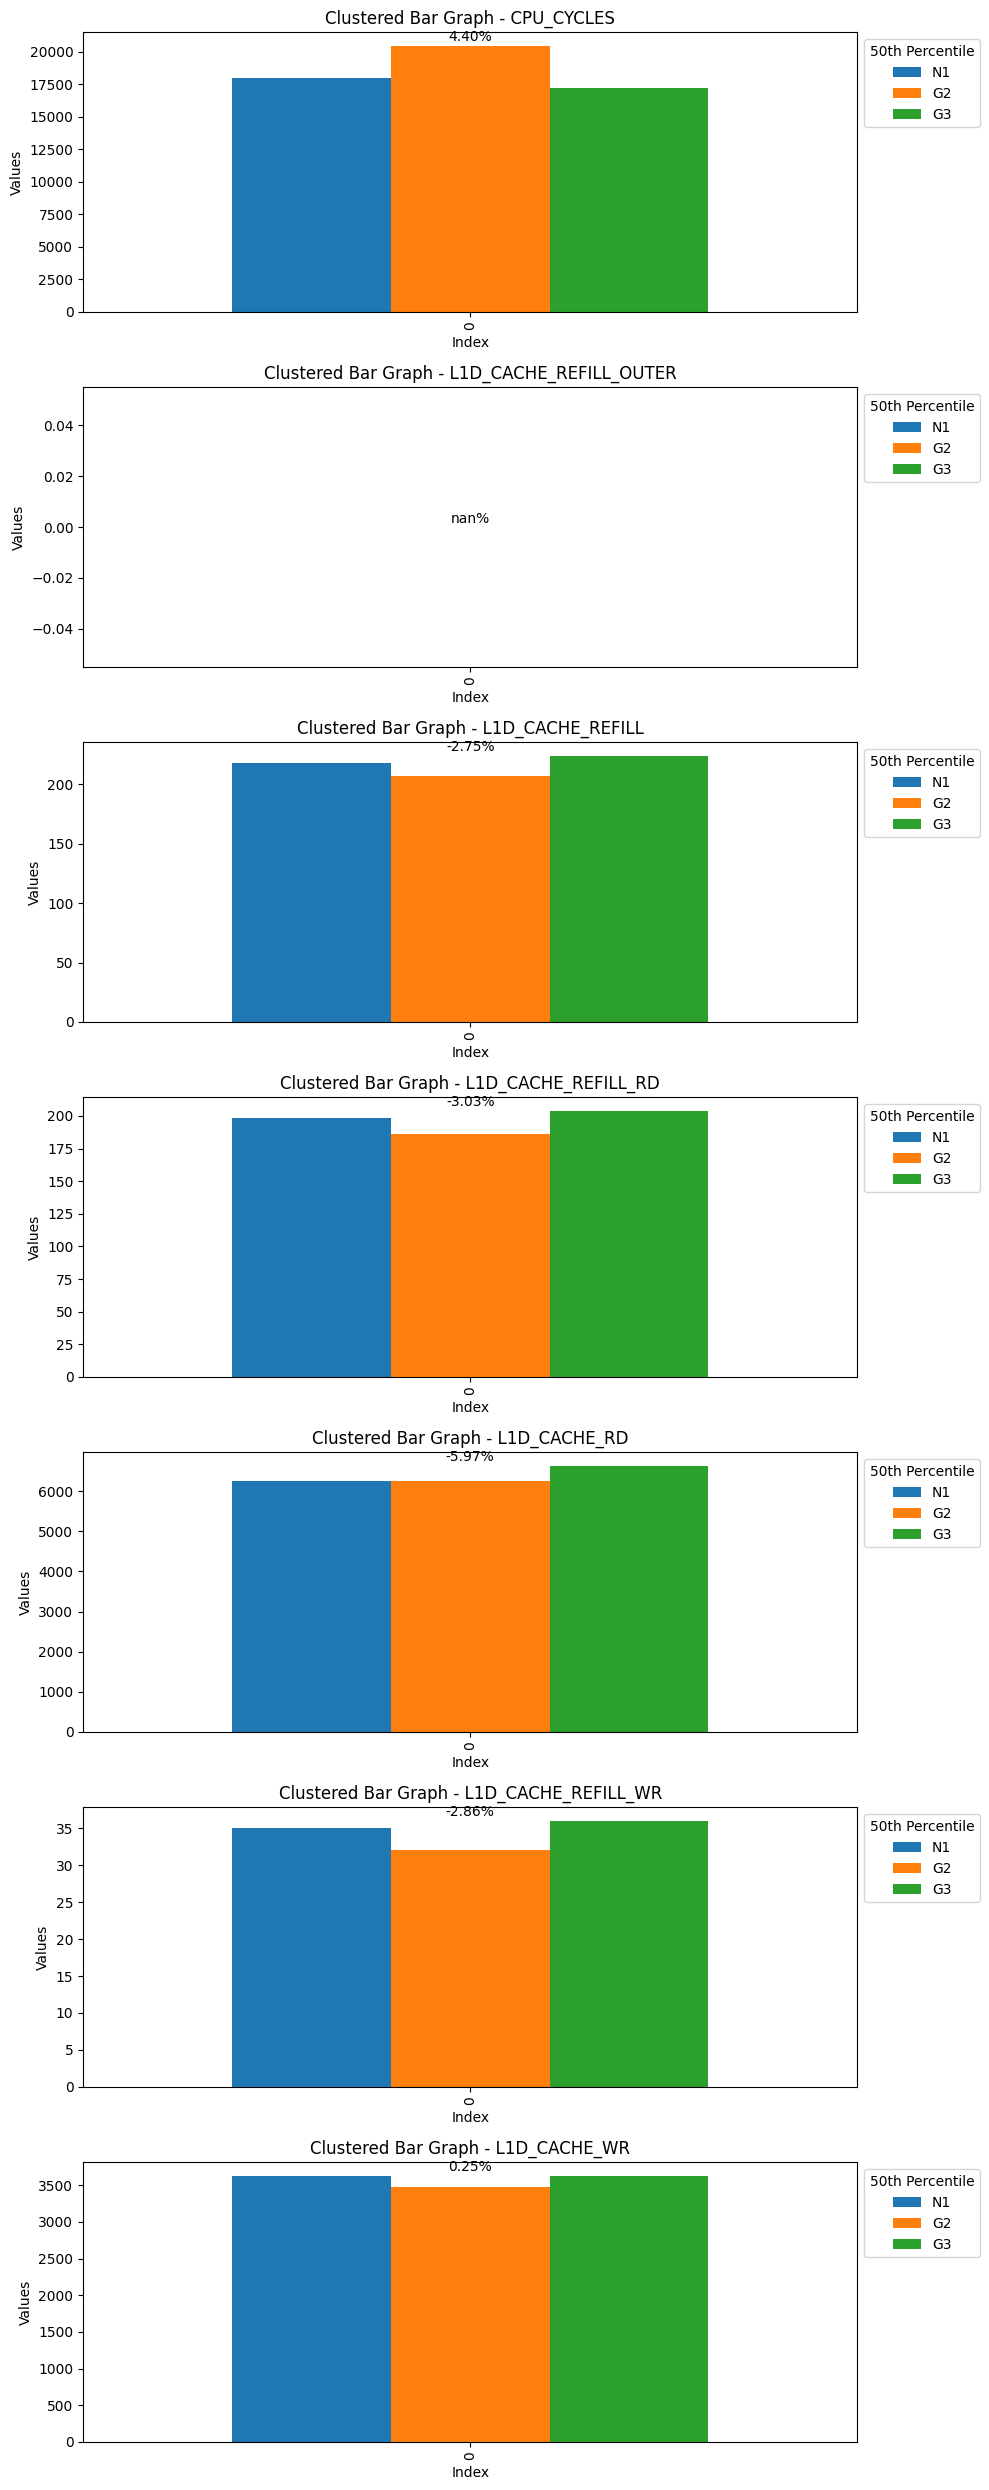

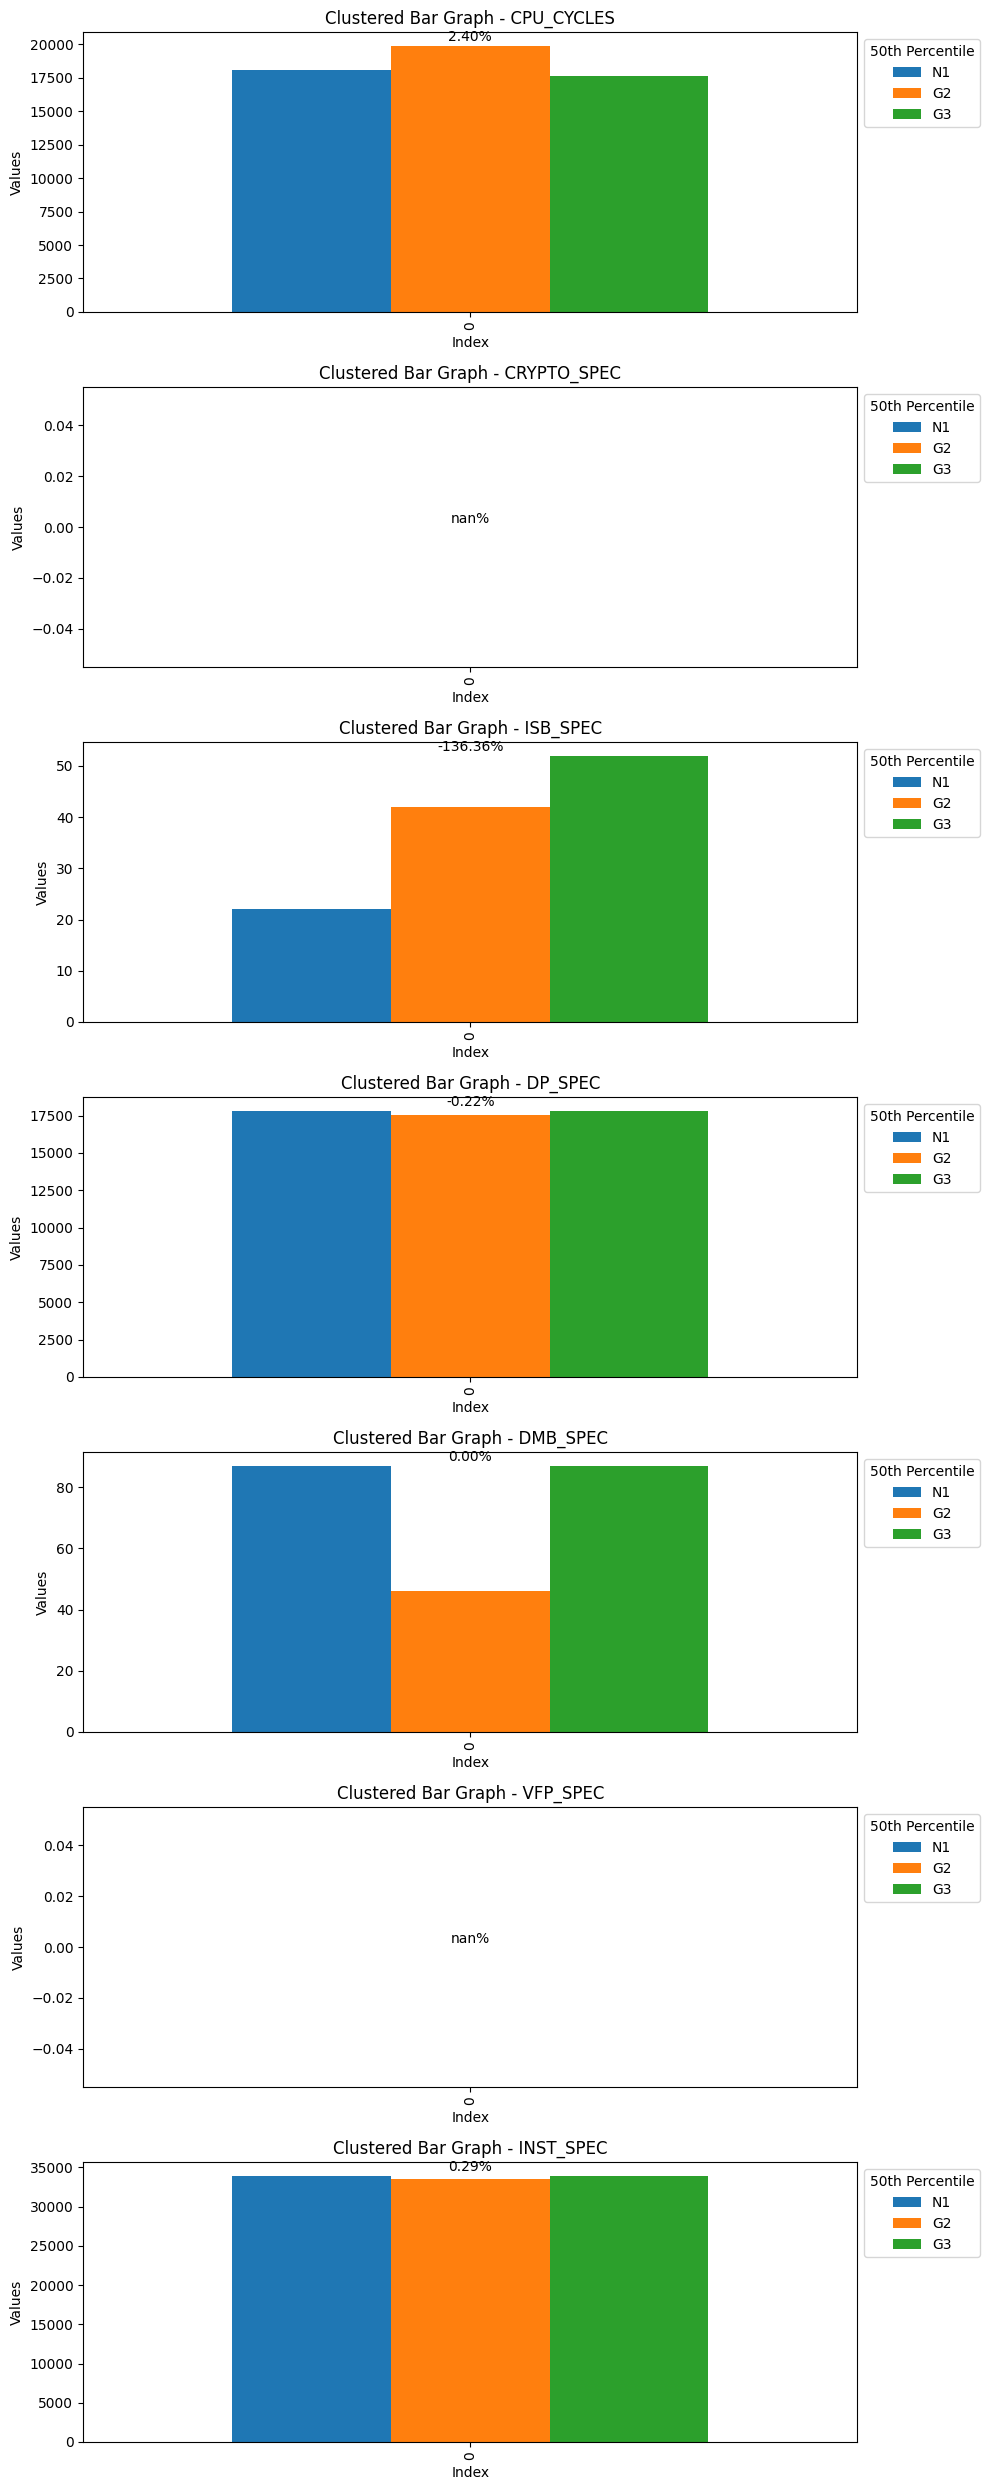

In [6]:
##DU_HIGH Plots for 3 PROCESSORS per cycles

import pandas as pd
import matplotlib.pyplot as plt

def plot_clustered_bar(df, column, title, ax):
    """Plot a clustered bar graph for the specified column."""
    bar_plot = df[column].plot(kind='bar', ax=ax, width=0.8)
    legend_labels = ['N1', 'G2', 'G3']
    ax.legend(legend_labels, title='50th Percentile', loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_xlabel('Index')  # Update the xlabel since there's no BG, LS, and CB_LEN
    ax.set_ylabel('Values')
    ax.set_title(title)
    
    # Extract columns
    n1_column = df[column].iloc[:, 0]  # Update the column index as per your data
    g3_column = df[column].iloc[:, -1]  # Update the column index as per your data

    # Calculate percentage difference
    percent_difference = ((n1_column - g3_column) / n1_column) * 100
    pd_val = percent_difference.iloc[0]
    # Find the highest bar
    max_height = max(bar_plot.patches, key=lambda x: x.get_height()).get_height()
    ax.annotate(f'{pd_val:.2f}%', 
                xy=(0, max_height), 
                xytext=(0, 1),  # Offset of the annotation from the top of the bar
                textcoords="offset points",
                ha='center', va='bottom', 
                fontsize=10,
                color='black')

# Define the base directory paths for each bundle type
n1_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/N1/'
#n2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/N2/'
g2_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G2/'
g3_base_dir = '/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/G3/'

# Define the base file name patterns for each bundle type
base_filename = 'bundle{}.csv'

# Initialize empty lists to store DataFrames for each bundle
n1dfs = []
#n2dfs = []
g2dfs = []
g3dfs = []
merged_dfs = []
bundles_cols = []


for bundle_num in range(15):
    # Construct the file paths for the current bundle in each directory
    n1_filename = n1_base_dir + base_filename.format(bundle_num)
    #n2_filename = n2_base_dir + base_filename.format(bundle_num)
    g2_filename = g2_base_dir + base_filename.format(bundle_num)
    g3_filename = g3_base_dir + base_filename.format(bundle_num)
    
    # Read the CSV files for the current bundle
    n1_df = pd.read_csv(n1_filename)
    #n2_df = pd.read_csv(n2_filename)
    g2_df = pd.read_csv(g2_filename)
    g3_df = pd.read_csv(g3_filename)
    
    # Append DataFrames to the appropriate list
    n1dfs.append(n1_df)
    #n2dfs.append(n2_df)
    g2dfs.append(g2_df)
    g3dfs.append(g3_df)
    
    n1_df.columns = n1_df.columns.str.strip()
    bundles_cols.append(n1_df.columns)
    # Concatenate DataFrames
    merged_df = pd.concat([n1_df, g2_df, g3_df], axis=1)
    
    # Append the merged DataFrame to the list
    merged_dfs.append(merged_df)

# Iterate over each bundle's DataFrame
for bundle_num, merged_df in enumerate(merged_dfs):
    # Get the list of columns for the current bundle
    bundle_cols = bundles_cols[bundle_num]
    fig, axs = plt.subplots(len(bundle_cols), 1, figsize=(10, 25))  # Adjust the figsize as needed
    # Iterate over each column for plotting
    for i, column in enumerate(bundle_cols):
        # Plot clustered bar graph for the current column
        plot_clustered_bar(merged_df[column], column, f'Clustered Bar Graph - {column}', axs[i])

    # Adjust layout
    plt.tight_layout()  
    plt.savefig(f'/Users/gayyeg01/Downloads/DU-HIGH-LDPC-KPIS/DUHIGH_BUNDLES/bundle{bundle_num}.pdf')
    # Show the plot
    plt.show()